# BANK LOAN CASE STUDY

## Importing the Libraries

In [ ]:
#Import the required Libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math


## 1. Reading the Input Data from File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/bank loan/application_data.csv"
app = pd.read_csv(path)

In [ ]:

app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Understanding structure of the Data

In [ ]:
# Getting the Dataframe dimensions
app.shape

(307511, 122)

In [ ]:
# Getting basic statistical details of the data frame
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## 3. Data Quality Check And Missing Values

### 3.1 Percentage of missing values for columns and rows

In [ ]:
# checking column-wise null percentages
cols = pd.DataFrame(app.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                             precentage_missing_value
SK_ID_CURR                                       0.00
HOUR_APPR_PROCESS_START                          0.00
REG_REGION_NOT_WORK_REGION                       0.00
LIVE_REGION_NOT_WORK_REGION                      0.00
REG_CITY_NOT_LIVE_CITY                           0.00
...                                               ...
NONLIVINGAPARTMENTS_MEDI                        69.43
NONLIVINGAPARTMENTS_MODE                        69.43
COMMONAREA_MODE                                 69.87
COMMONAREA_AVG                                  69.87
COMMONAREA_MEDI                                 69.87

[122 rows x 1 columns]


### 3.2 Removing the columns with high percentage of missing values(>40%)

In [ ]:
app = app.drop(app.columns[ app.apply(lambda col: (col.isnull().sum()/len(app)*100) > 40)], axis=1)
print (app.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
# Checking dimensions of dataframe after dropping columns
app.shape

(307511, 73)

In [ ]:
#re-checking columns with missing values
round(100.0* app.isnull().sum()/len(app), 2).sort_values()

SK_ID_CURR                      0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_WORK_CITY          0.00
                               ...  
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
EXT_SOURCE_3                   19.83
OCCUPATION_TYPE                31.35
Length: 73, dtype: float64

In [ ]:
columns_fillna_mode = ['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_DAY']

# Fill missing values with mode in the specified columns
for column in columns_fillna_mode:
    app[column].fillna(app[column].mode()[0], inplace=True)

amt_req_credit_bureau_mon_mode = app['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]

# Fill missing values with the mode in 'AMT_REQ_CREDIT_BUREAU_MON' column
app['AMT_REQ_CREDIT_BUREAU_MON'].fillna(amt_req_credit_bureau_mon_mode, inplace=True)

app['CNT_FAM_MEMBERS'].fillna(2, inplace=True)

amt_goods_price_median = app['AMT_GOODS_PRICE'].median()
app['AMT_GOODS_PRICE'].fillna(amt_goods_price_median, inplace=True)

# Impute missing values in 'AMT_ANNUITY' column
amt_annuity_median = app['AMT_ANNUITY'].median()
app['AMT_ANNUITY'].fillna(amt_annuity_median, inplace=True)

mean_value = app[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].mean()

# Fill missing values with the mean in the specified columns
app[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']] = app[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].fillna(mean_value)

In [ ]:
# Fixing the column with negative data and deriving the number of years for DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE, & DAYS_ID_PUBLISH
app[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = app[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE' ]].div(365).round(2).abs()
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.5 Identifying Outliers for Numerical columns

In [ ]:
# verifying the clean data
app.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 73, dtype: object

#### For the outlier analysis of numerical columns, we will focus on
- AMT_GOODS_PRICE
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY


#### 3.5.1 Outlier analysis for AMT_GOODS_PRICE

<Axes: >

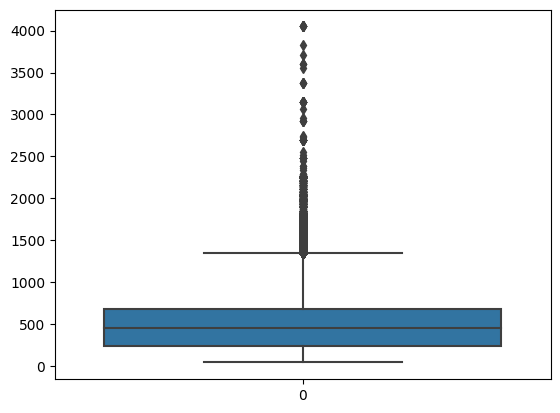

In [ ]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(app['AMT_GOODS_PRICE']/1000.0)

In [ ]:
# checking column statistics
(app['AMT_GOODS_PRICE']/1000).describe()

count    307511.000000
mean        538.316294
std         369.288982
min          40.500000
25%         238.500000
50%         450.000000
75%         679.500000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64

#### 3.5.2 Outlier analysis for AMT_INCOME_TOTAL

<Axes: >

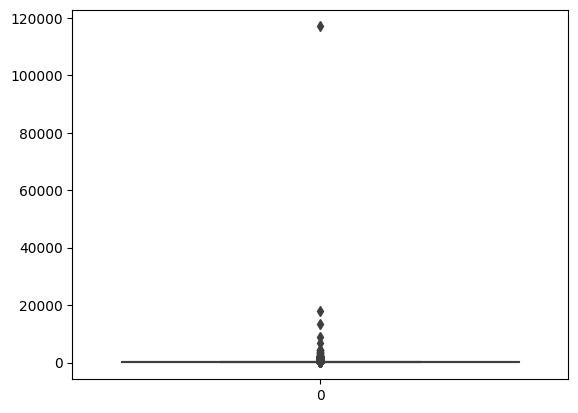

In [ ]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(app['AMT_INCOME_TOTAL']/1000)

#### 3.5.3 Outlier analysis for AMT_CREDIT

<Axes: >

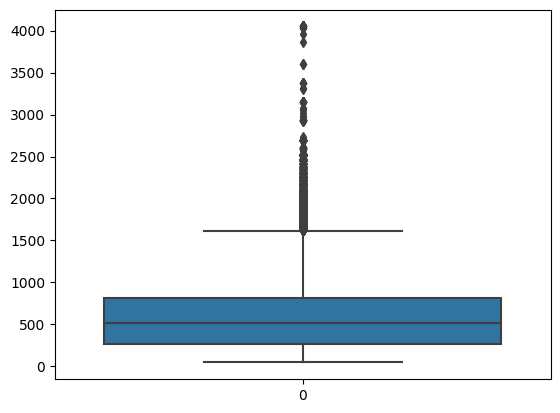

In [ ]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(app['AMT_CREDIT']/1000.0)

In [ ]:
# checking column statistics
(app['AMT_CREDIT']/1000).describe()

count    307511.000000
mean        599.026000
std         402.490777
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64

#### 3.5.4 Outlier analysis for AMT_ANNUITY

<Axes: >

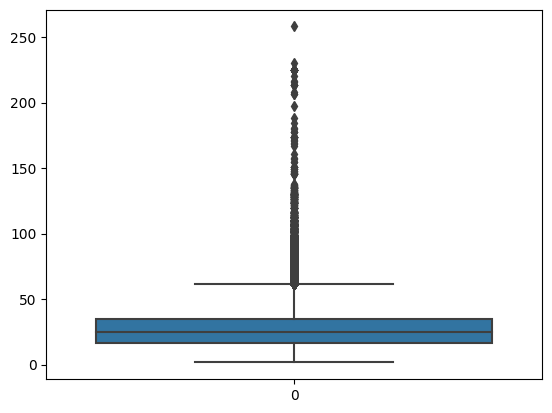

In [ ]:
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(app['AMT_ANNUITY']/1000.0)

In [ ]:
# checking column statistics
(app['AMT_ANNUITY']/1000).describe()

count    307511.000000
mean         27.108488
std          14.493461
min           1.615500
25%          16.524000
50%          24.903000
75%          34.596000
max         258.025500
Name: AMT_ANNUITY, dtype: float64

### 3.6 Binning of continuous Variable

In [ ]:
# 1. DAYS_BIRTH column can be binned 0-10,10-20,20-30,30-40, 40-50 and so on
app['AGE_GROUP'] = pd.cut(x=app.DAYS_BIRTH, bins=[0,19,29, 39, 49, 59,69,79,89], labels=['10s','20s', '30s', '40s' ,'50s', '60s','70s', '80s'])
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20s
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40s
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50s
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50s
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50s


In [ ]:
# 2. AMT_INCOME_TOTAL column can be binned 'Low','Average', 'Good', 'Best' ,'High', 'Very High'
app['AMT_CATEGORY'] = pd.cut(x=app.AMT_INCOME_TOTAL, bins=[0,100000, 200000, 300000, 400000, 500000, 600000], labels=['Low','Average', 'Good', 'Best' ,'High', 'Very High'])
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,AMT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20s,Good
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40s,Good
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50s,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50s,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50s,Average


## 4. Analysis

In [ ]:
app.shape

(307511, 75)

### For further analysis, we will remove irrelevant columns and continue analysis with a few selected columns

In [ ]:
# list of columns to be dropped
drop_columns = ['FLAG_CONT_MOBILE',
                'FLAG_MOBIL',
                'FLAG_EMP_PHONE',
                'FLAG_WORK_PHONE',
                'FLAG_PHONE',
                'FLAG_EMAIL',
                'HOUR_APPR_PROCESS_START',
                'WEEKDAY_APPR_PROCESS_START',
                'EXT_SOURCE_2',
                'EXT_SOURCE_3',
                'REG_REGION_NOT_LIVE_REGION',
                'REG_REGION_NOT_WORK_REGION',
                'LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY',
                'REG_CITY_NOT_WORK_CITY',
                'LIVE_CITY_NOT_WORK_CITY',
                'FLAG_DOCUMENT_2',
                'FLAG_DOCUMENT_3',
                'FLAG_DOCUMENT_4',
                'FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6',
                'FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_8',
                'FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_10',
                'FLAG_DOCUMENT_11',
                'FLAG_DOCUMENT_12',
                'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_15',
                'FLAG_DOCUMENT_16',
                'FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18',
                'FLAG_DOCUMENT_19',
                'FLAG_DOCUMENT_20',
                'FLAG_DOCUMENT_21'
               ]

In [ ]:
app = app.drop(columns=drop_columns, axis=1)
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,AMT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,3.11,0.0,0.0,0.0,0.0,0.0,1.0,20s,Good
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,2.27,0.0,0.0,0.0,0.0,0.0,0.0,40s,Good
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,2.23,0.0,0.0,0.0,0.0,0.0,0.0,50s,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,1.69,0.0,0.0,0.0,0.0,0.0,0.0,50s,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,50s,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,20s,Average
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,50s,Low
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,5.23,1.0,0.0,0.0,1.0,0.0,1.0,40s,Average
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.88,0.0,0.0,0.0,0.0,0.0,0.0,30s,Average


In [ ]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,AMT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,3.11,0.0,0.0,0.0,0.0,0.0,1.0,20s,Good
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,2.27,0.0,0.0,0.0,0.0,0.0,0.0,40s,Good
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,2.23,0.0,0.0,0.0,0.0,0.0,0.0,50s,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,1.69,0.0,0.0,0.0,0.0,0.0,0.0,50s,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,50s,Average


In [ ]:
# looking at the columns with missing value in remaining dataframe
round(100.0 * app.isnull().sum()/len(app), 2).sort_values()

SK_ID_CURR                      0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
ORGANIZATION_TYPE               0.00
OBS_30_CNT_SOCIAL_CIRCLE        0.00
DEF_30_CNT_SOCIAL_CIRCLE        0.00
OBS_60_CNT_SOCIAL_CIRCLE        0.00
DEF_60_CNT_SOCIAL_CIRCLE        0.00
DAYS_LAST_PHONE_CHANGE          0.00
AMT_REQ_CREDIT_BUREAU_HOUR      0.00
AMT_REQ_CREDIT_BUREAU_DAY       0.00
AMT_REQ_CREDIT_BUREAU_WEEK      0.00
AMT_REQ_CREDIT_BUREAU_MON       0.00
AMT_REQ_CREDIT_BUREAU_QRT       0.00
AMT_REQ_CREDIT_BUREAU_YEAR      0.00
DAYS_ID_PUBLISH                 0.00
AGE_GROUP                       0.00
DAYS_REGISTRATION               0.00
DAYS_BIRTH                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
A

### 4.1 Checking imbalance in data

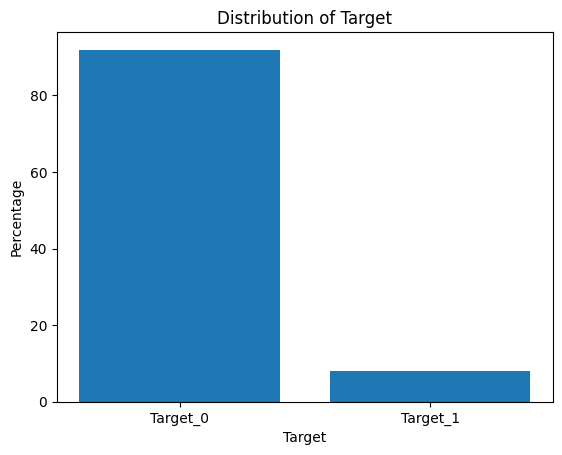

In [ ]:
target_counts = app['TARGET'].value_counts()
total_samples = len(app)

target_0_percentage = round((target_counts.get(0, 0) / total_samples) * 100, 2)
target_1_percentage = round((target_counts.get(1, 0) / total_samples) * 100, 2)

# Create a bar plot
plt.bar(['Target_0', 'Target_1'], [target_0_percentage, target_1_percentage])
plt.xlabel('Target')
plt.ylabel('Percentage')
plt.title('Distribution of Target')
plt.show()

#### As the percentage of Target =0 and Target =1 are different, there is an imbalance

### 4.2 Creation of two data sets - one for each Target = 1 and Target = 0

#### 4.2.1 Creating Target_0_df

In [ ]:
target_0_df = app[app['TARGET'] == 0]
print(target_0_df)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    N             0     

In [ ]:
target_0_df.shape

(282686, 39)

#### 4.2.2 Creating Target_1_df

In [ ]:
# Creating Dataframe of the defaulters
target_1_df = app[app['TARGET'] == 1]
print(target_1_df)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
26          100031       1         Cash loans           F            N   
40          100047       1         Cash loans           M            N   
42          100049       1         Cash loans           F            N   
81          100096       1         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307448      456186       1         Cash loans           M            N   
307475      456215       1         Cash loans           F            N   
307481      456225       1         Cash loans           M            N   
307489      456233       1         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [ ]:
target_1_df.shape

(24825, 39)

In [ ]:
# Cheking column types
app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64


#### Any column which is either of object type or have less than 40 values is considered categorical. Remaining columns of type float or int will be considered numerical

In [ ]:
#list of all categorical columns
categorical_columns = ['NAME_CONTRACT_TYPE',
                       'FLAG_OWN_CAR',
                       'FLAG_OWN_REALTY',
                       'CODE_GENDER',
                       'NAME_EDUCATION_TYPE',
                       'AMT_CATEGORY',
                       'AGE_GROUP',
                       'NAME_FAMILY_STATUS',
                       'NAME_HOUSING_TYPE',
                       'NAME_TYPE_SUITE',
                       'NAME_INCOME_TYPE',
                       'OCCUPATION_TYPE',
                       'ORGANIZATION_TYPE',
                       'REGION_RATING_CLIENT_W_CITY',
                       'REGION_RATING_CLIENT',
                       'AMT_REQ_CREDIT_BUREAU_HOUR',
                       'DEF_60_CNT_SOCIAL_CIRCLE',
                       'AMT_REQ_CREDIT_BUREAU_WEEK',
                       'AMT_REQ_CREDIT_BUREAU_DAY',
                       'DEF_30_CNT_SOCIAL_CIRCLE',
                       'AMT_REQ_CREDIT_BUREAU_QRT',
                       'CNT_CHILDREN',
                       'CNT_FAM_MEMBERS',
                       'AMT_REQ_CREDIT_BUREAU_MON',
                       'AMT_REQ_CREDIT_BUREAU_YEAR',
                       'OBS_30_CNT_SOCIAL_CIRCLE',
                       'OBS_60_CNT_SOCIAL_CIRCLE',
                      ]

In [ ]:
# list of all continuous numerical column
numerical_columns= ['AMT_GOODS_PRICE',
                    'DAYS_LAST_PHONE_CHANGE',
                    'DAYS_ID_PUBLISH',
                    'AMT_INCOME_TOTAL',
                    'DAYS_EMPLOYED',
                    'DAYS_REGISTRATION',
                    'DAYS_BIRTH',
                    'AMT_CREDIT',
                    'AMT_ANNUITY'
                   ]

### 4.3 Univariate Analysis for categorical variable

##### Under univariate analysis, we will look at percentage distribution of values of categorial variable

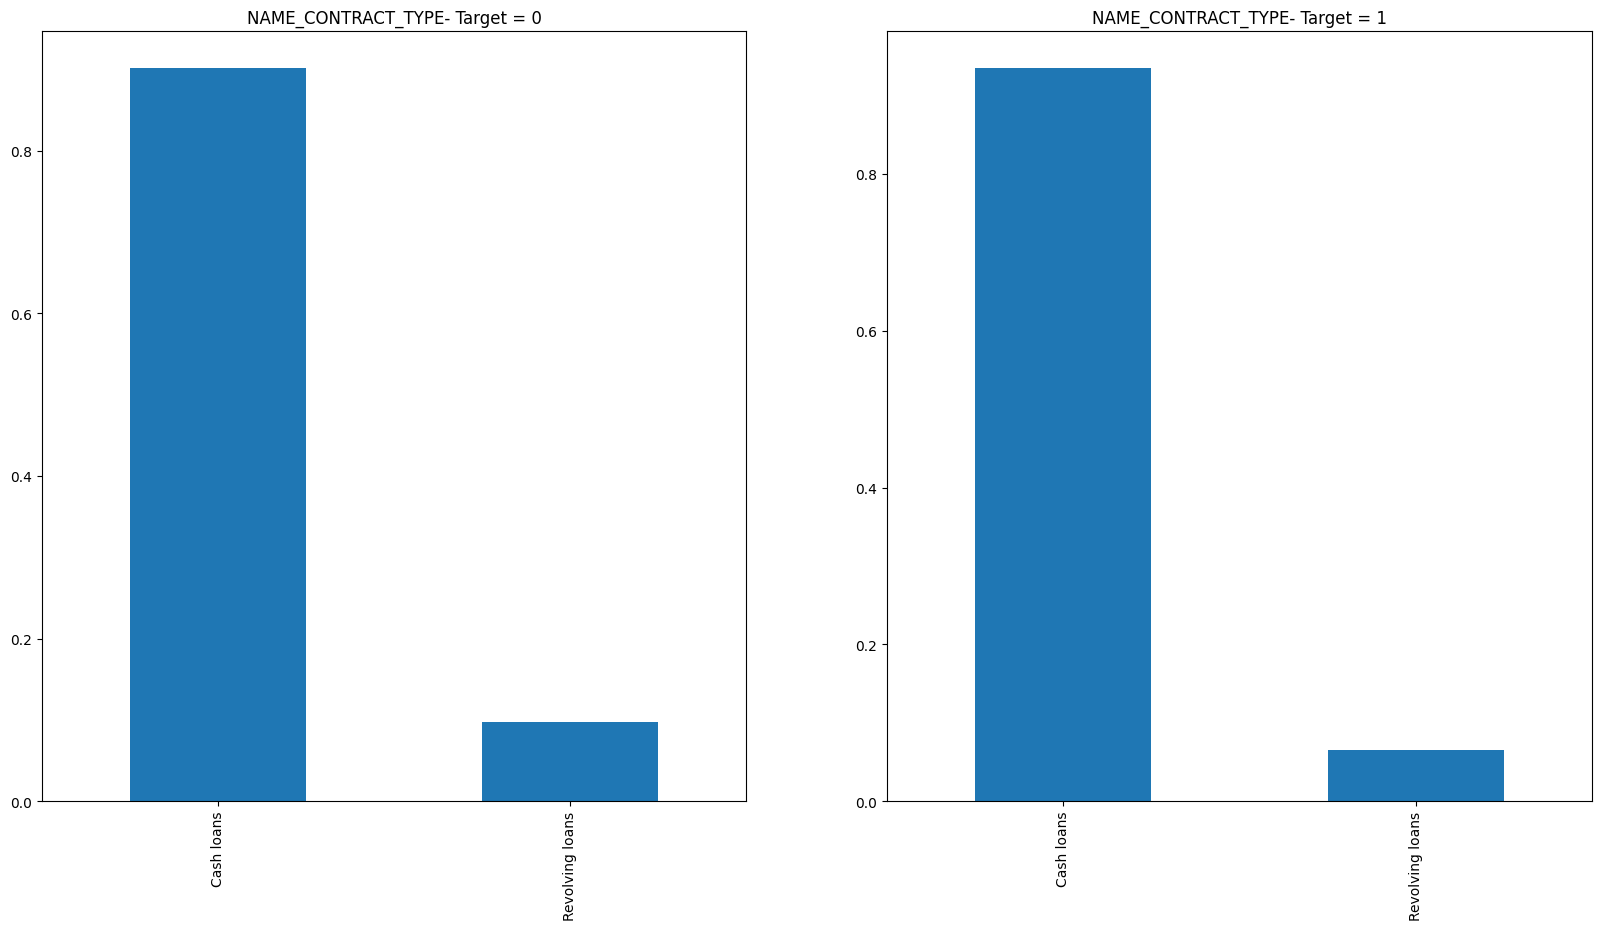

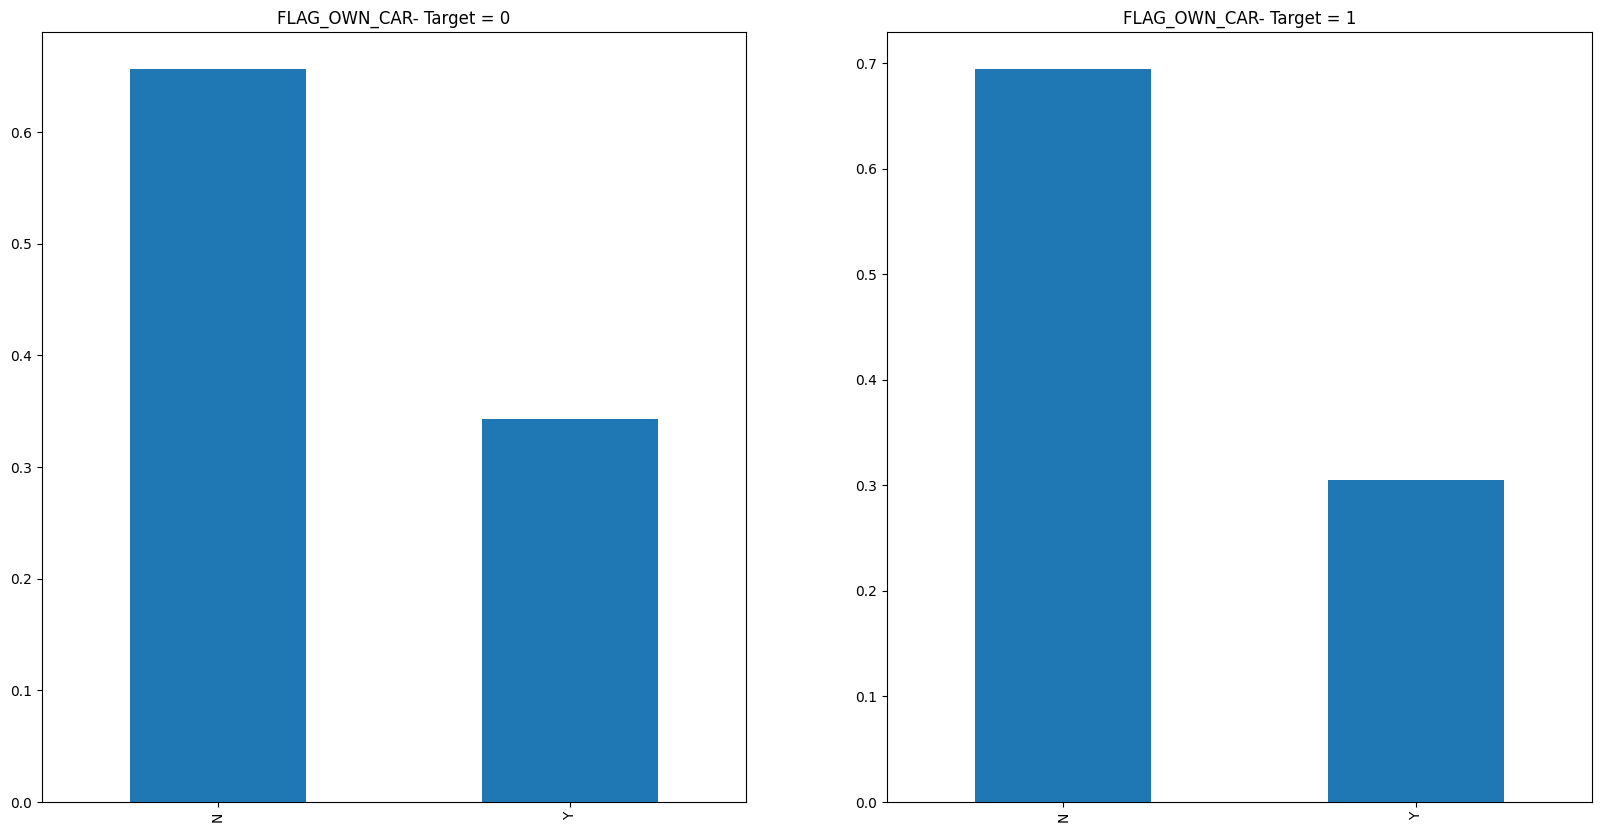

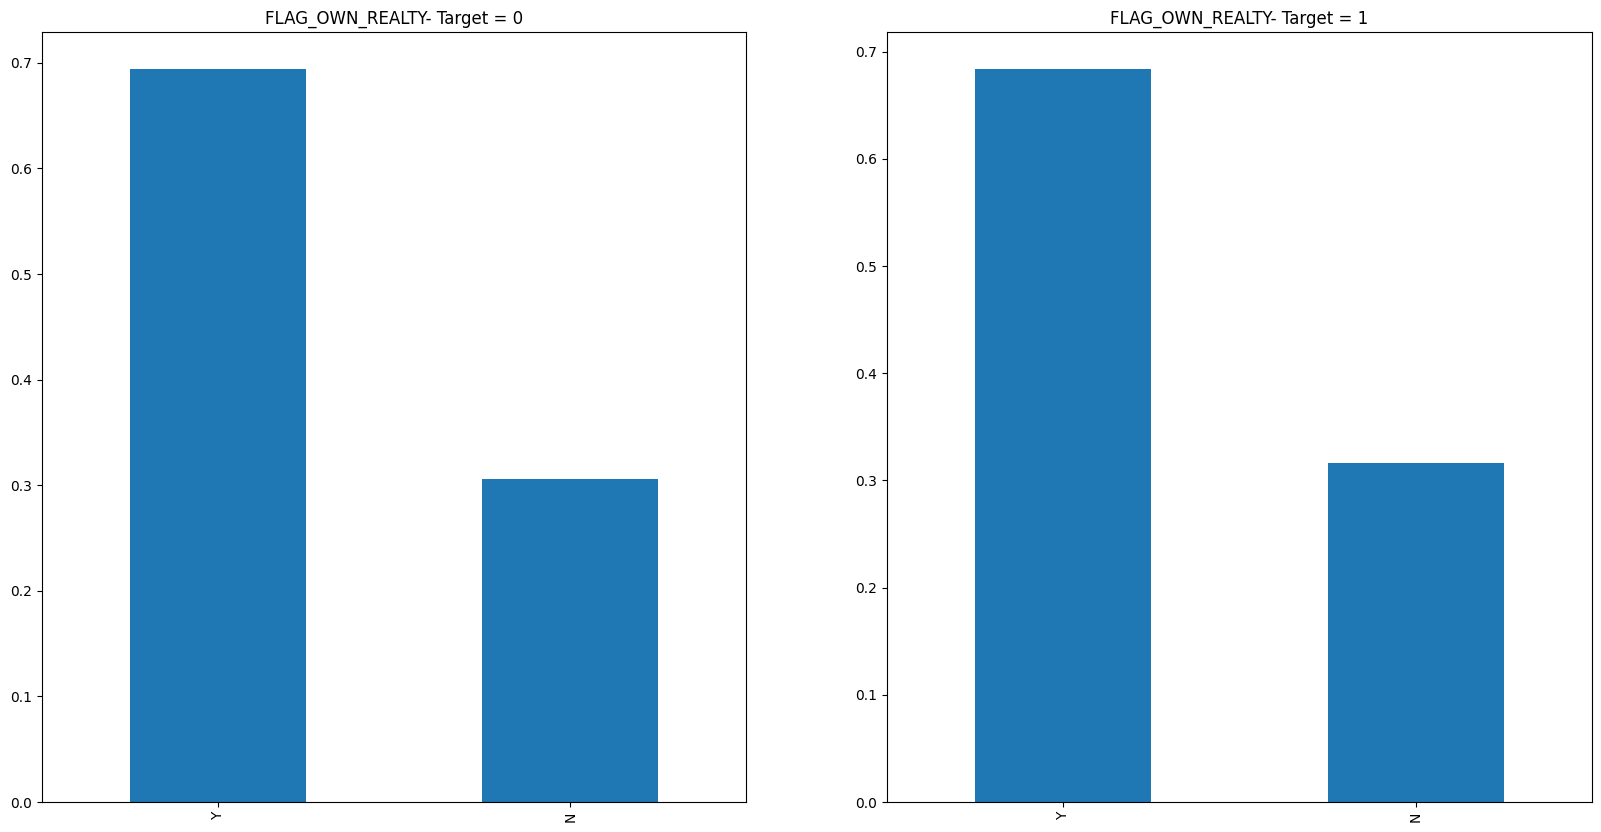

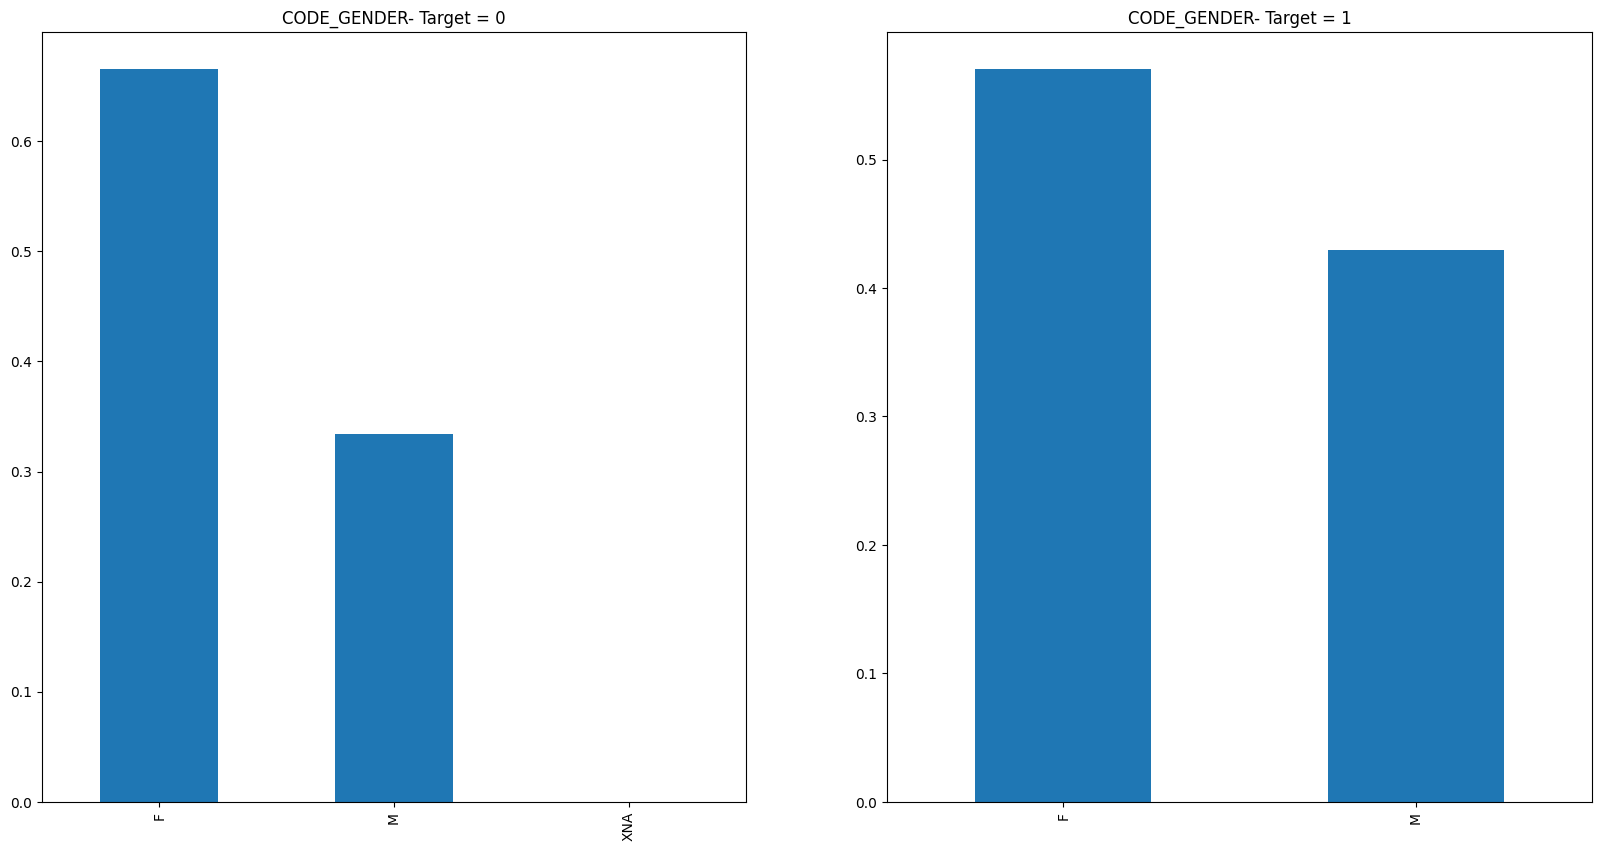

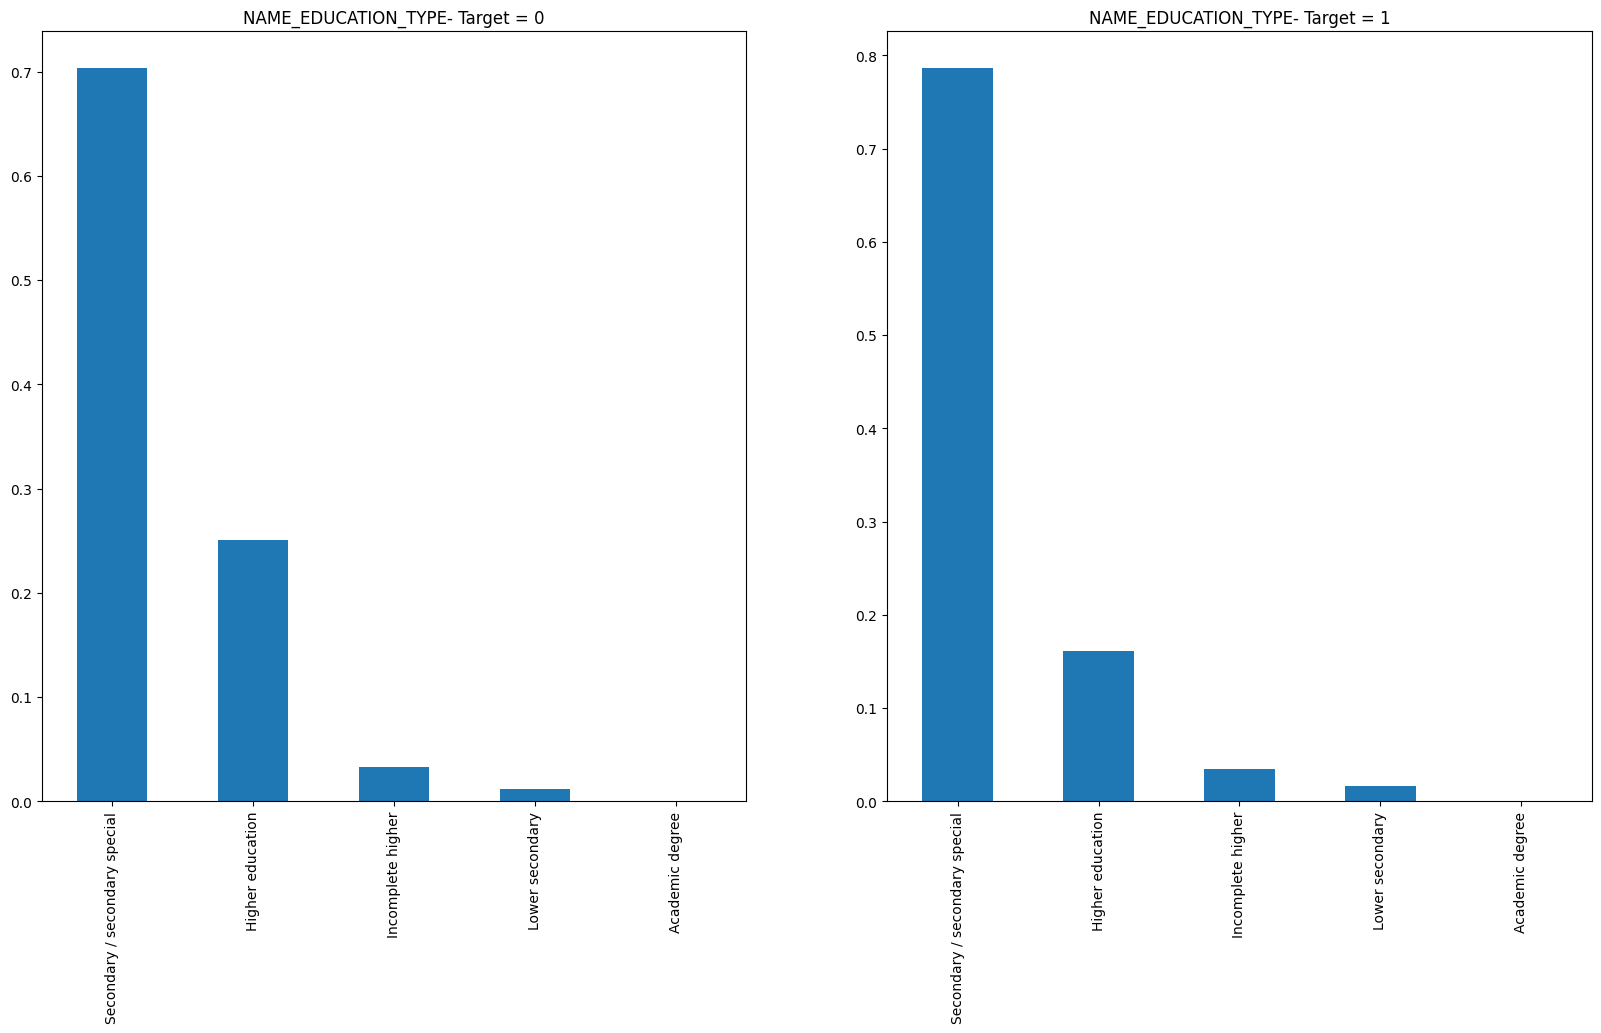

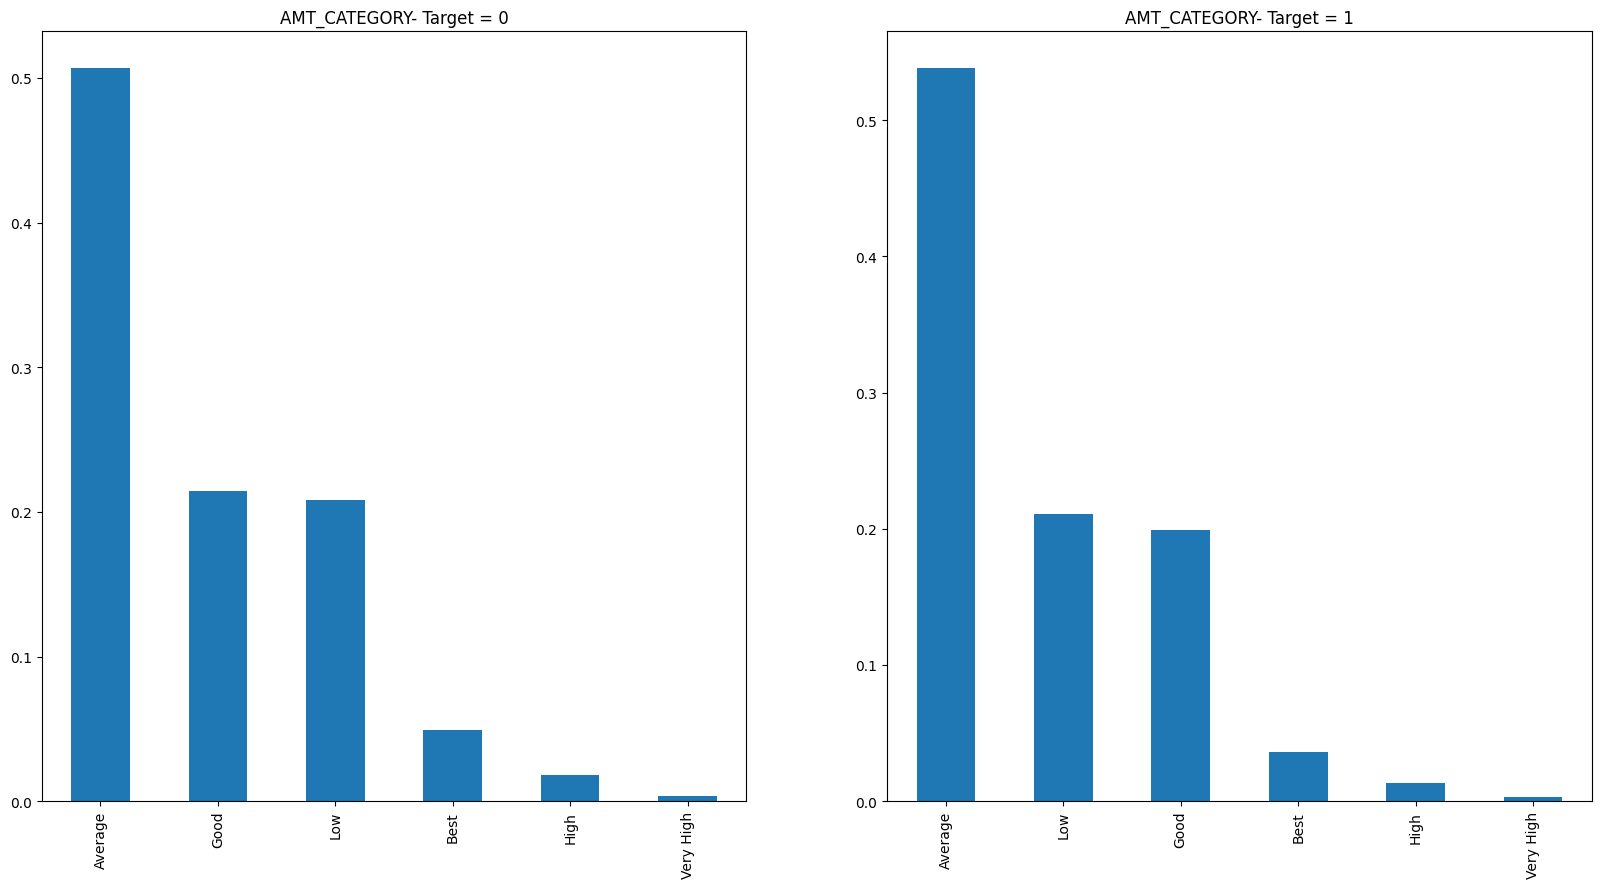

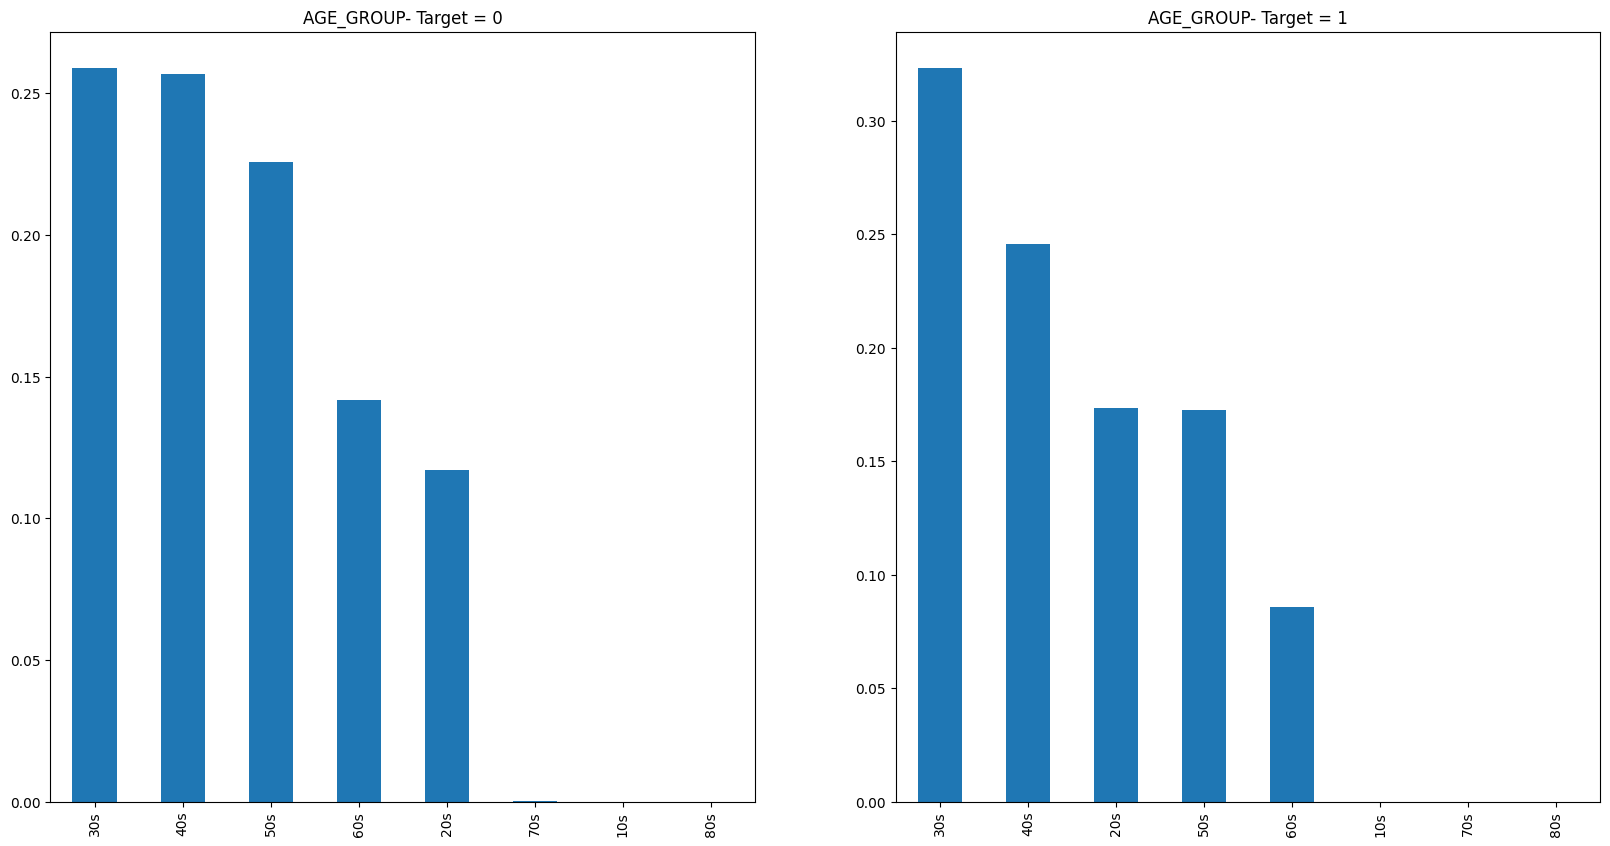

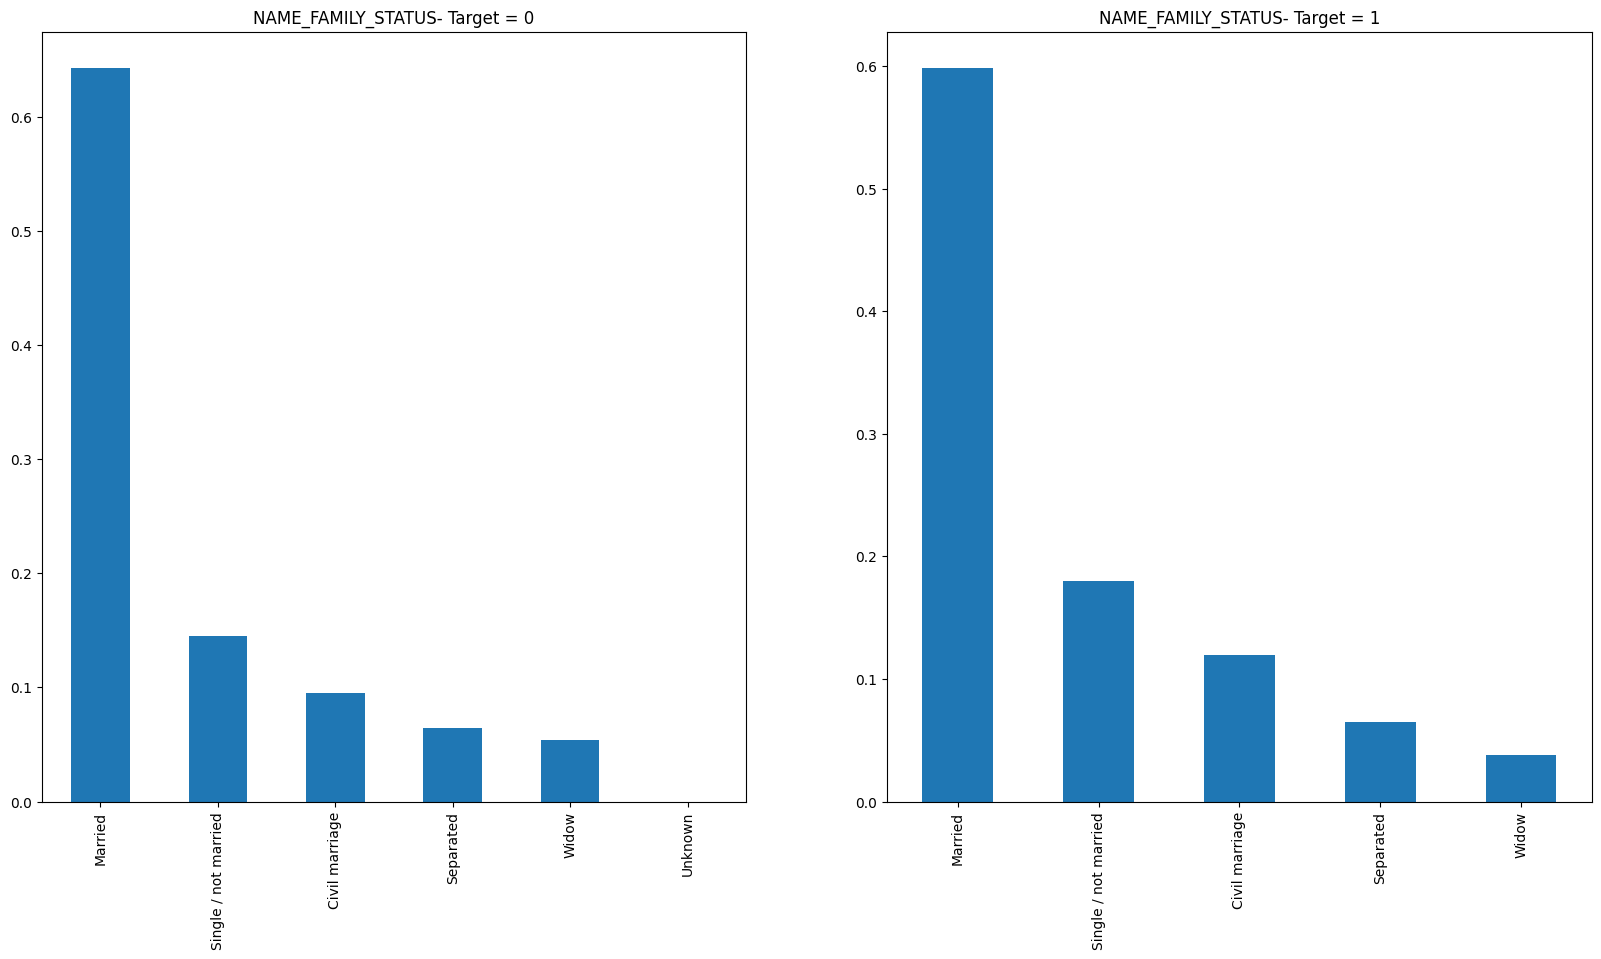

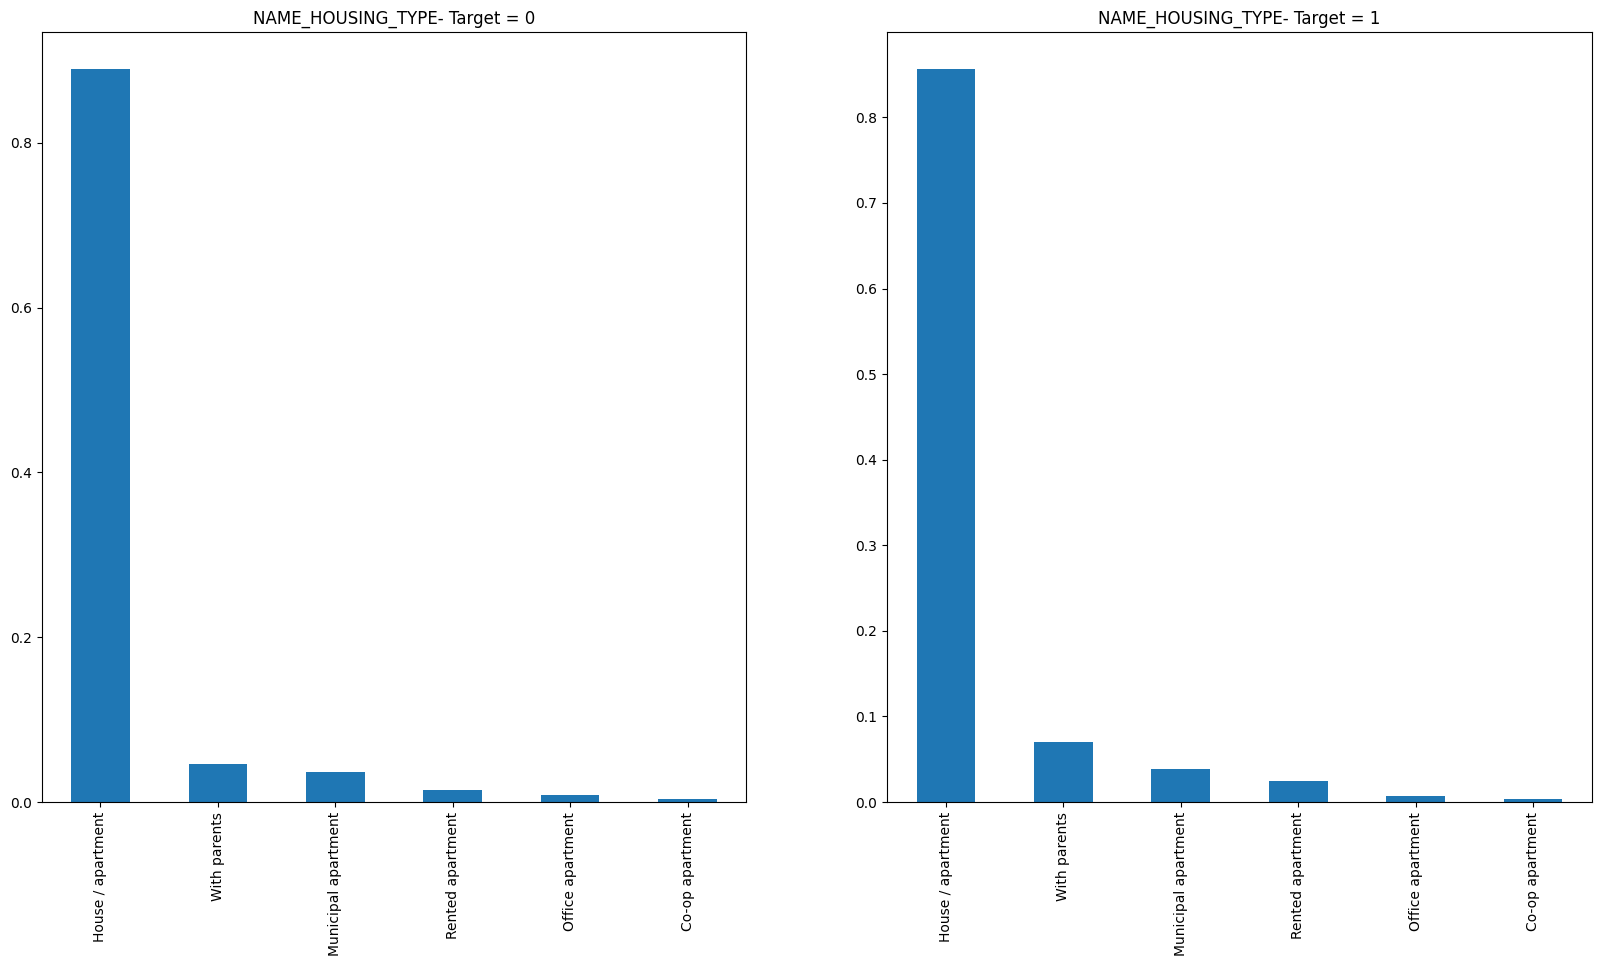

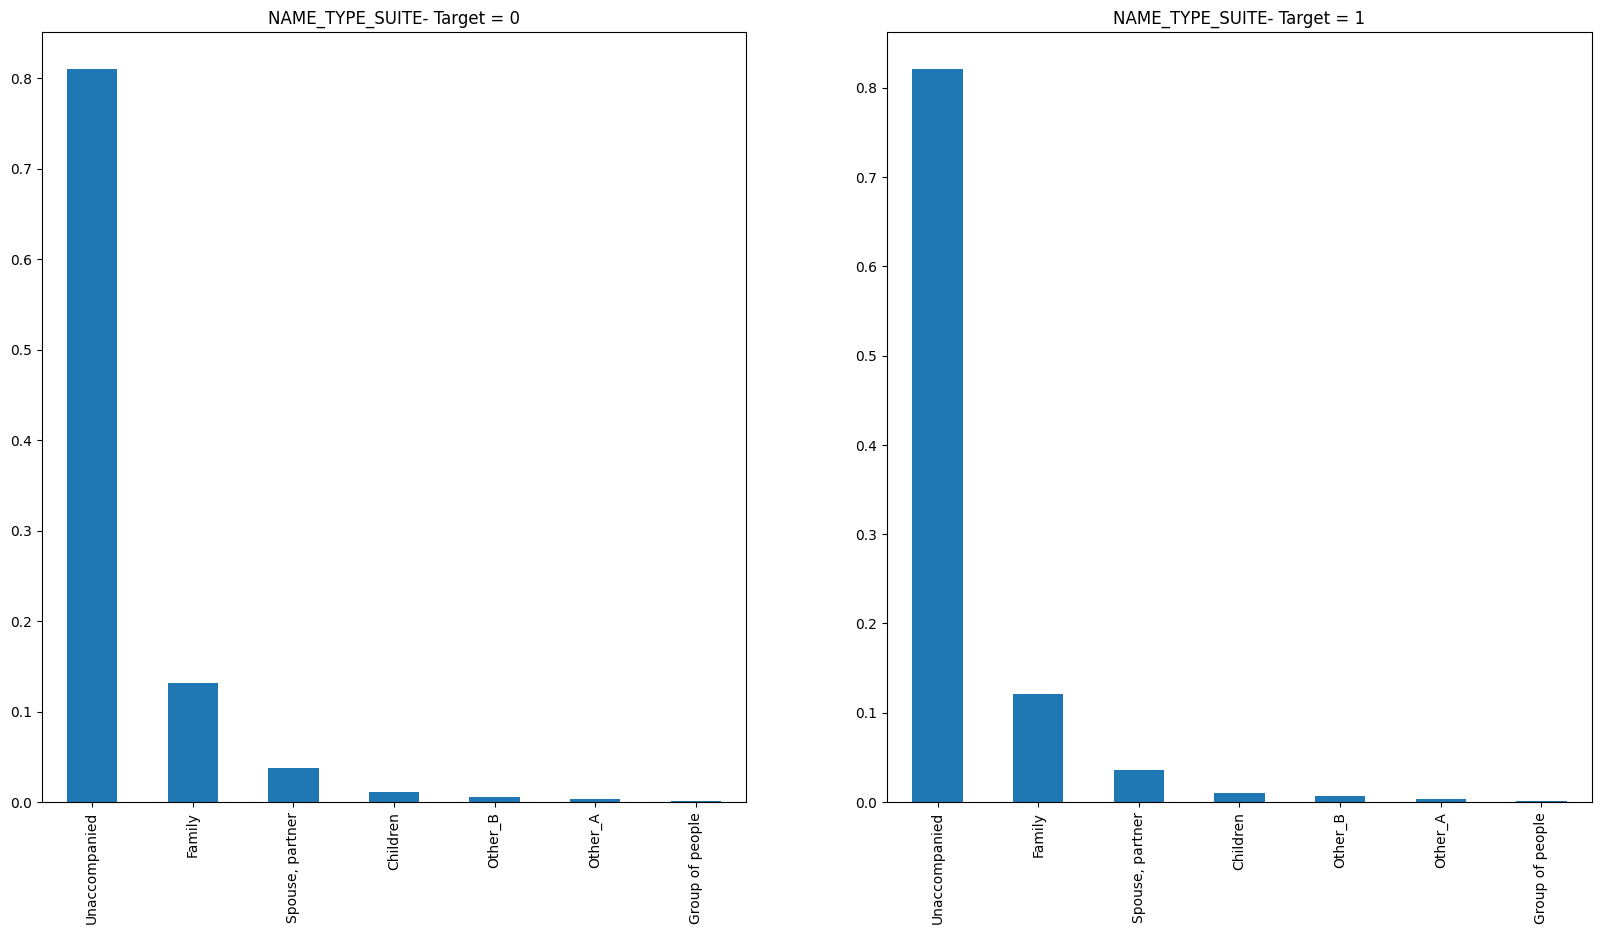

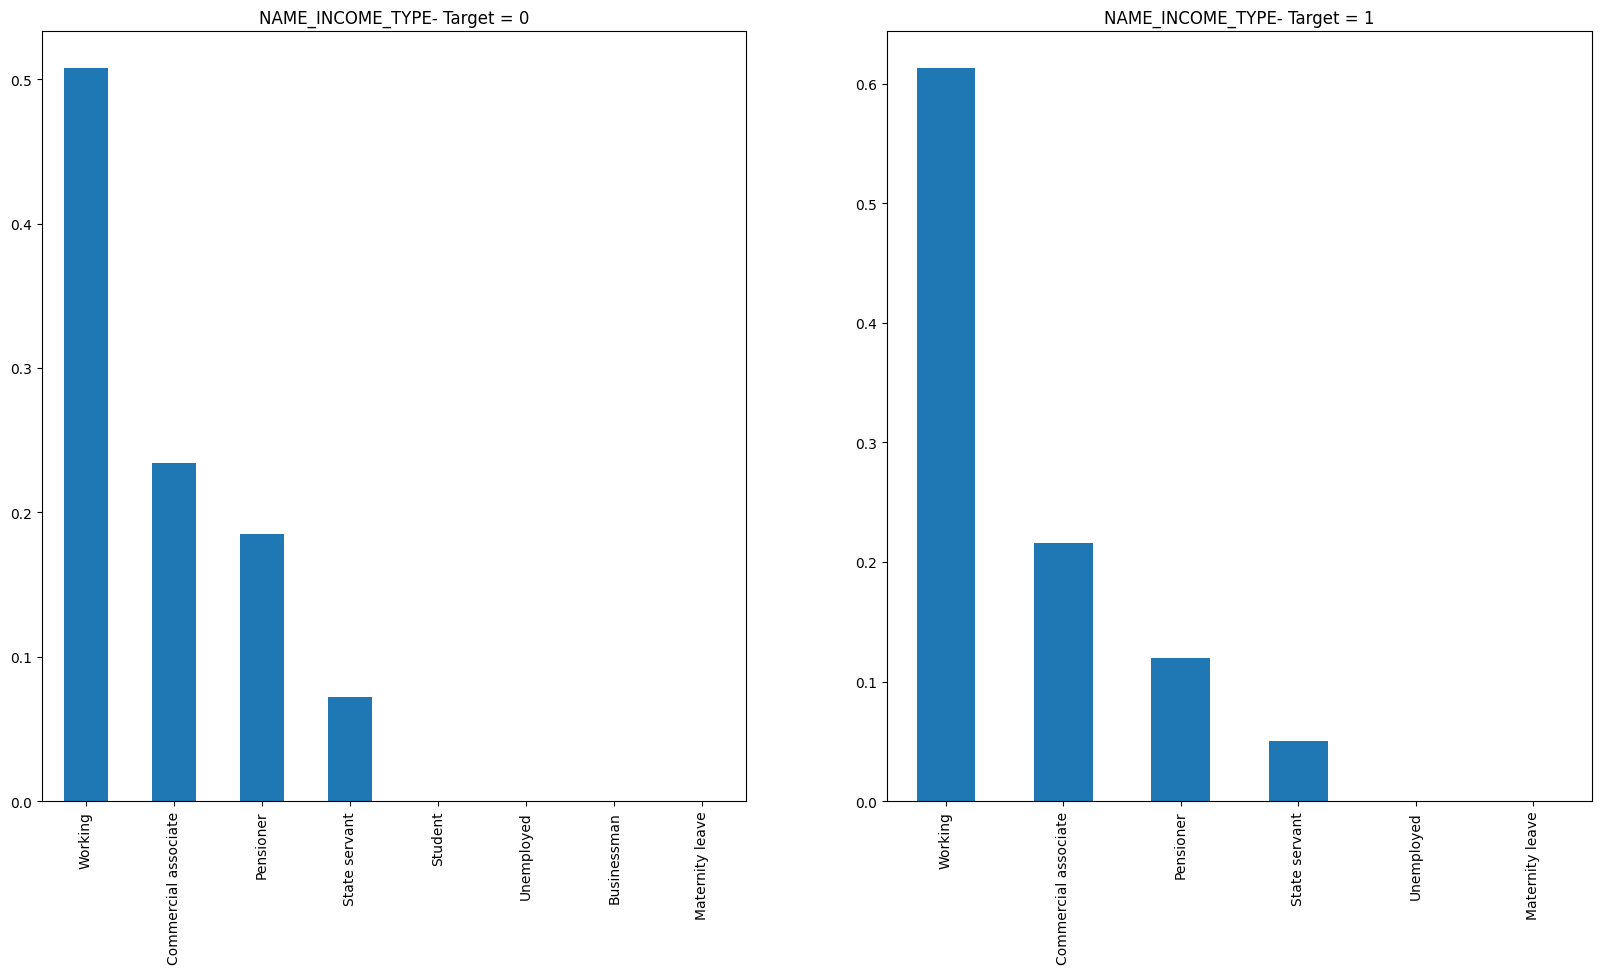

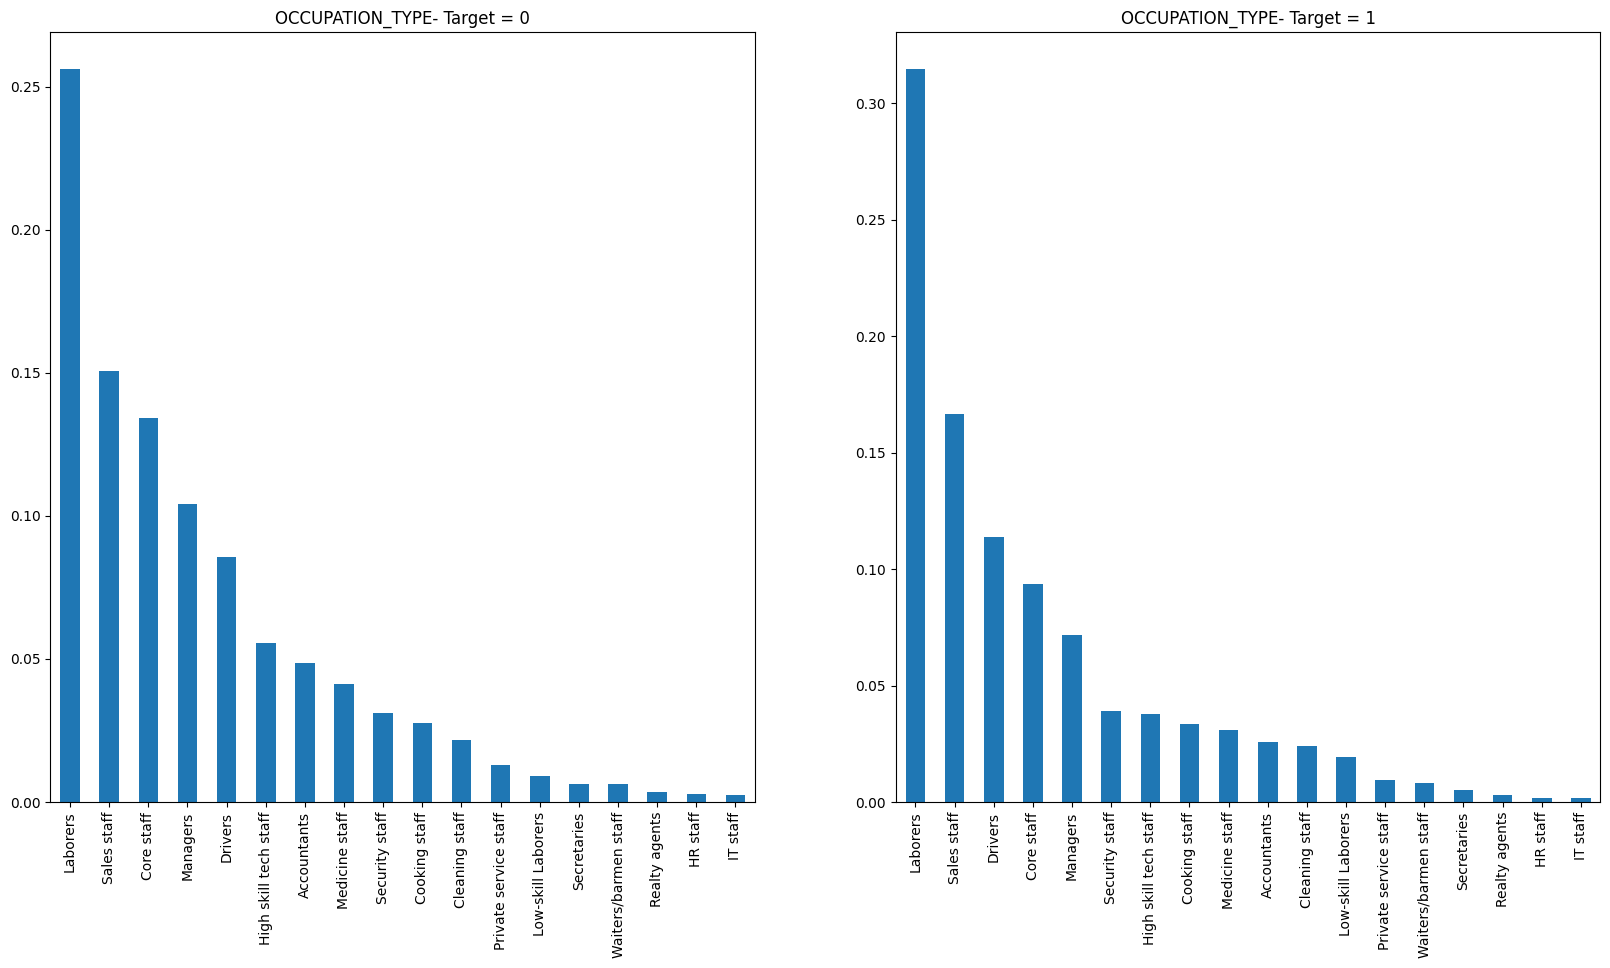

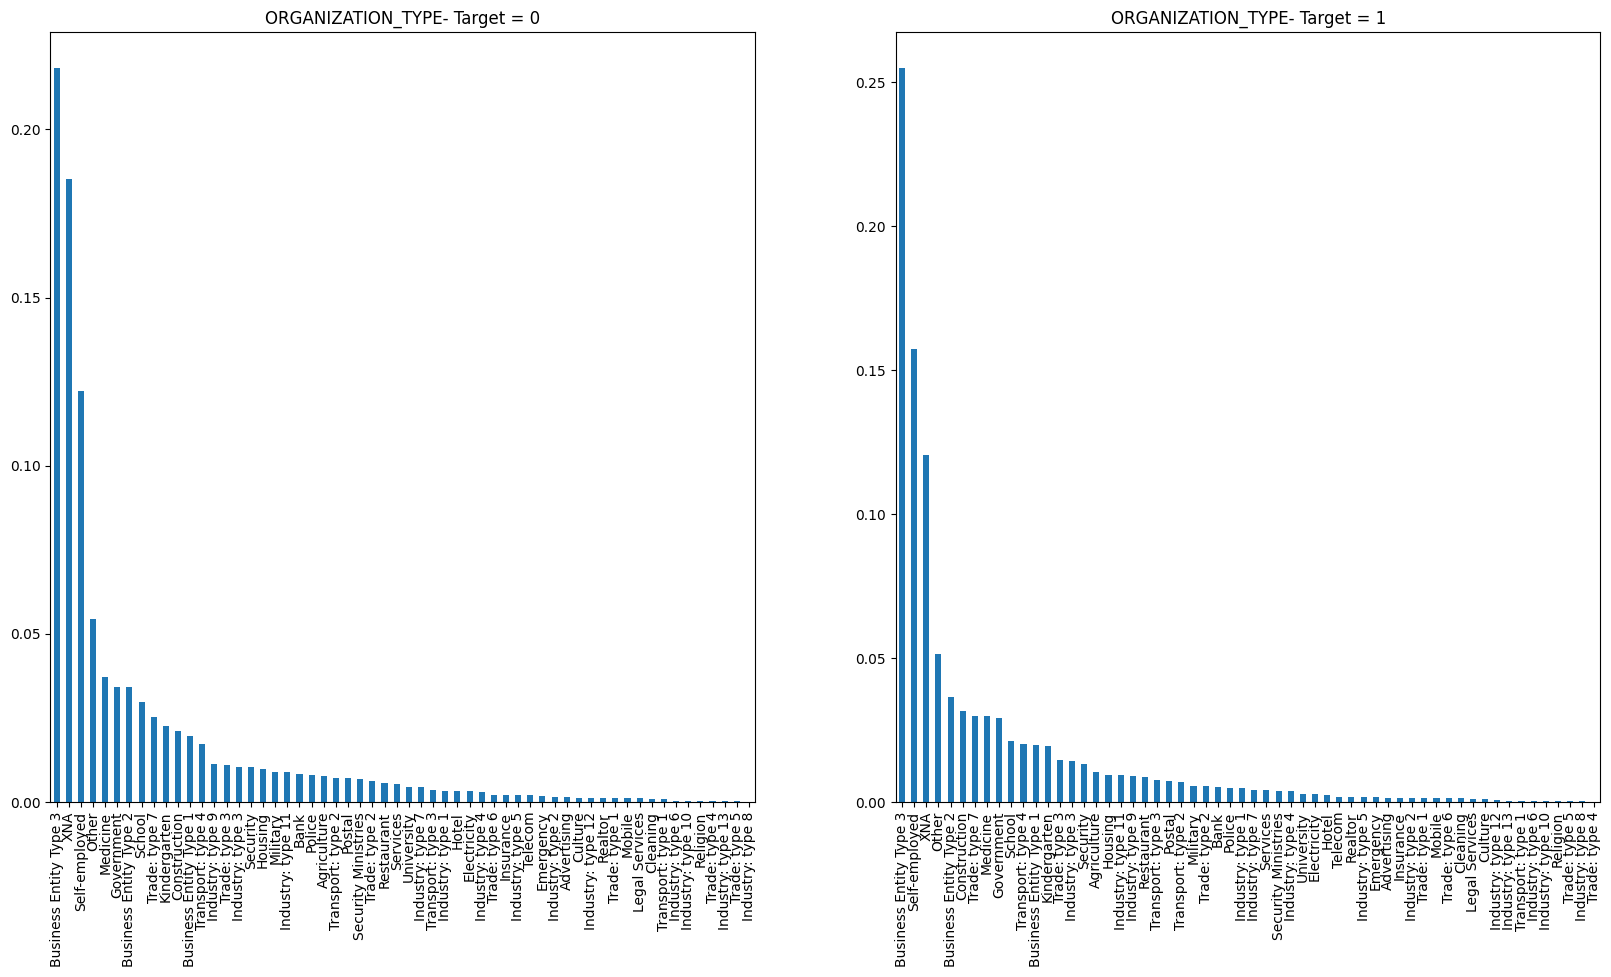

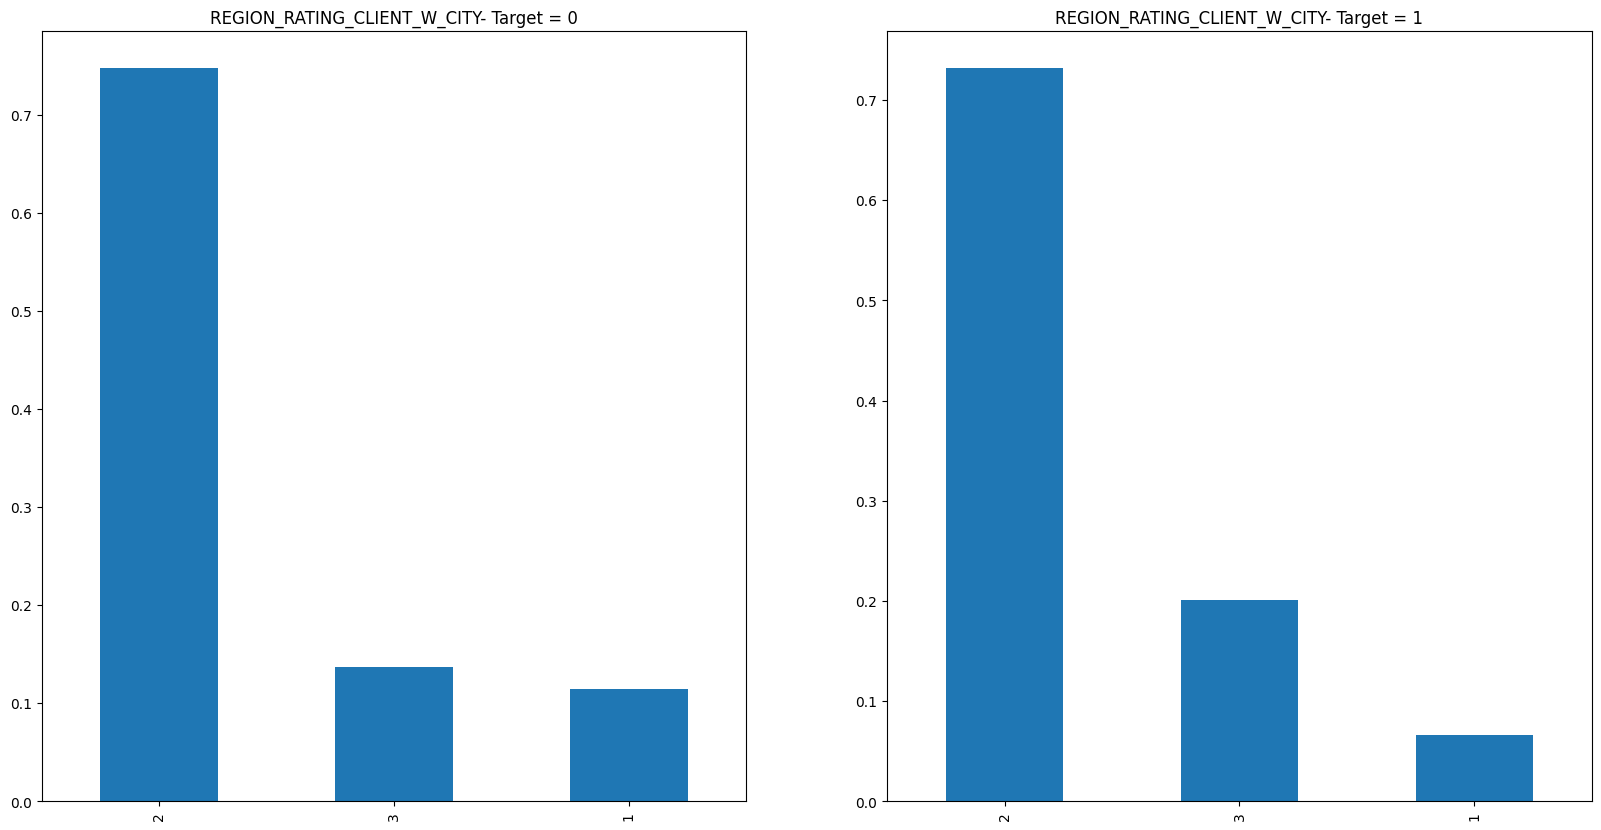

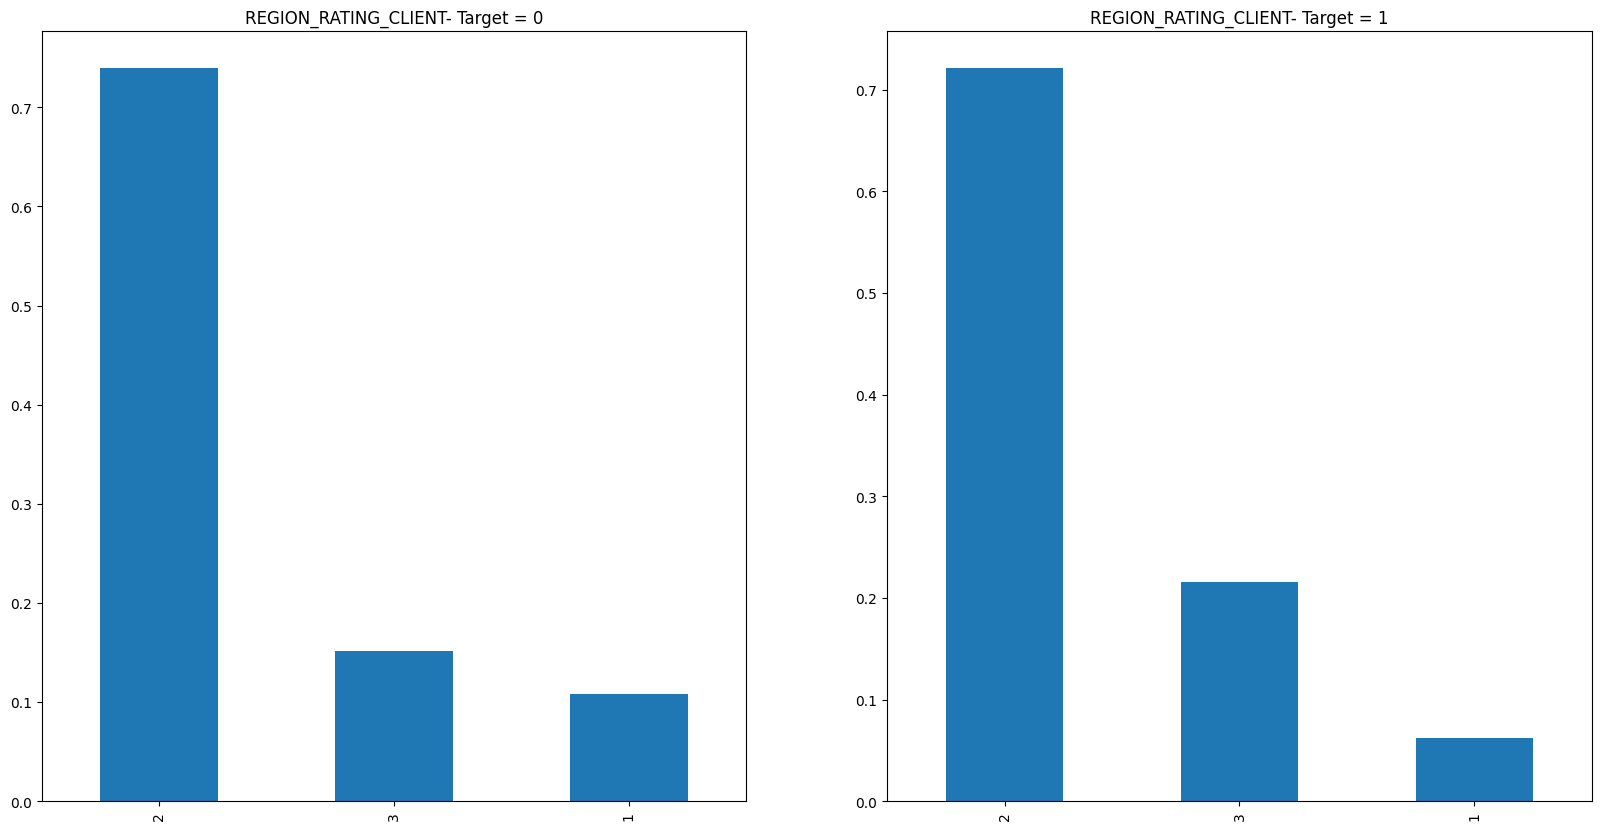

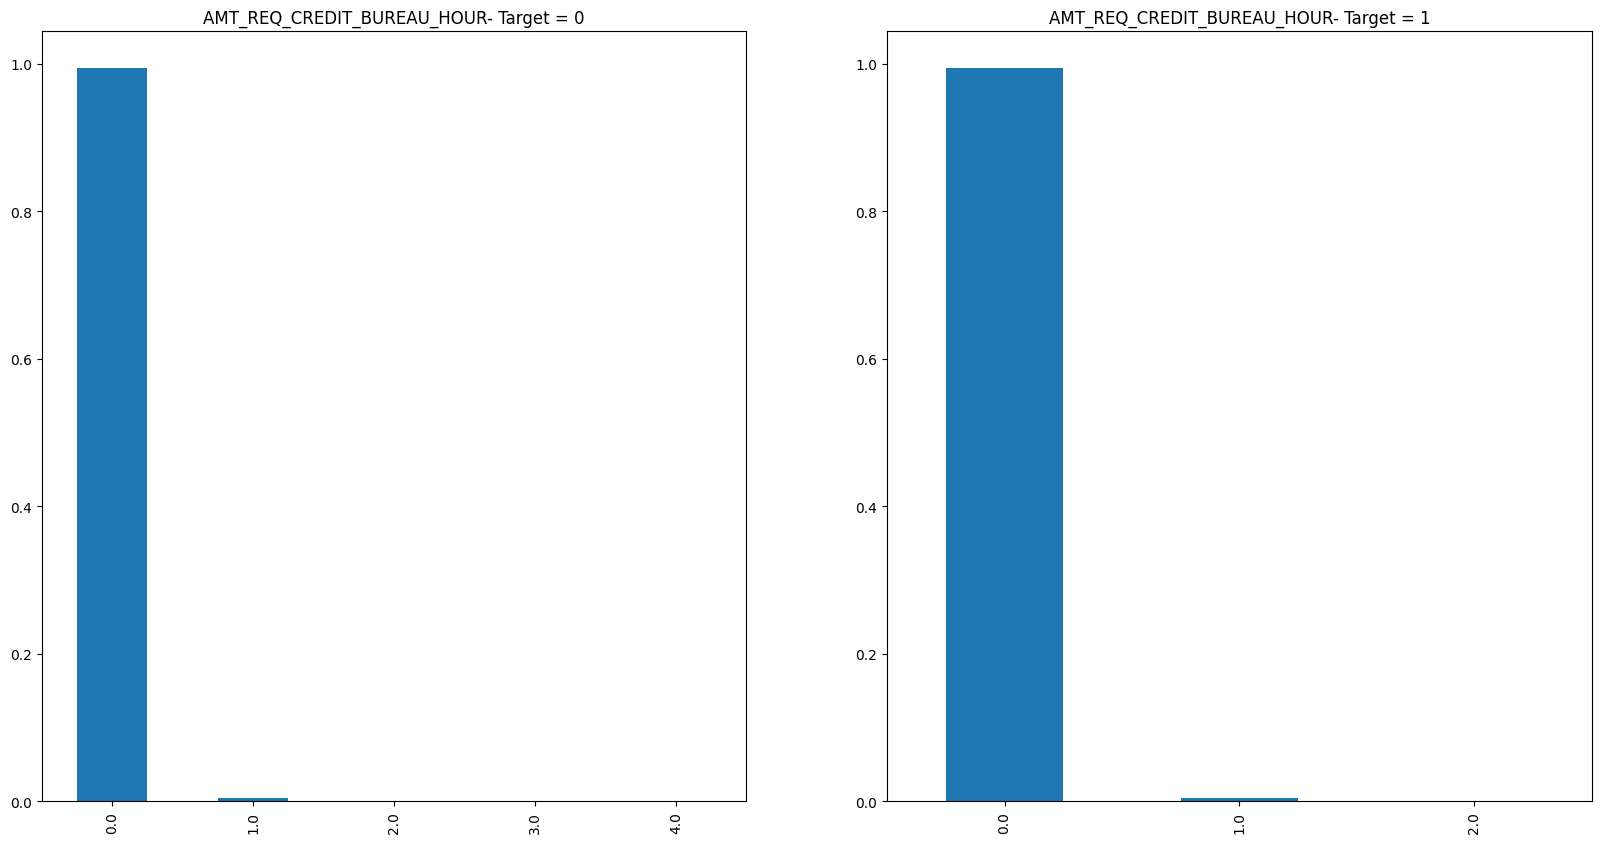

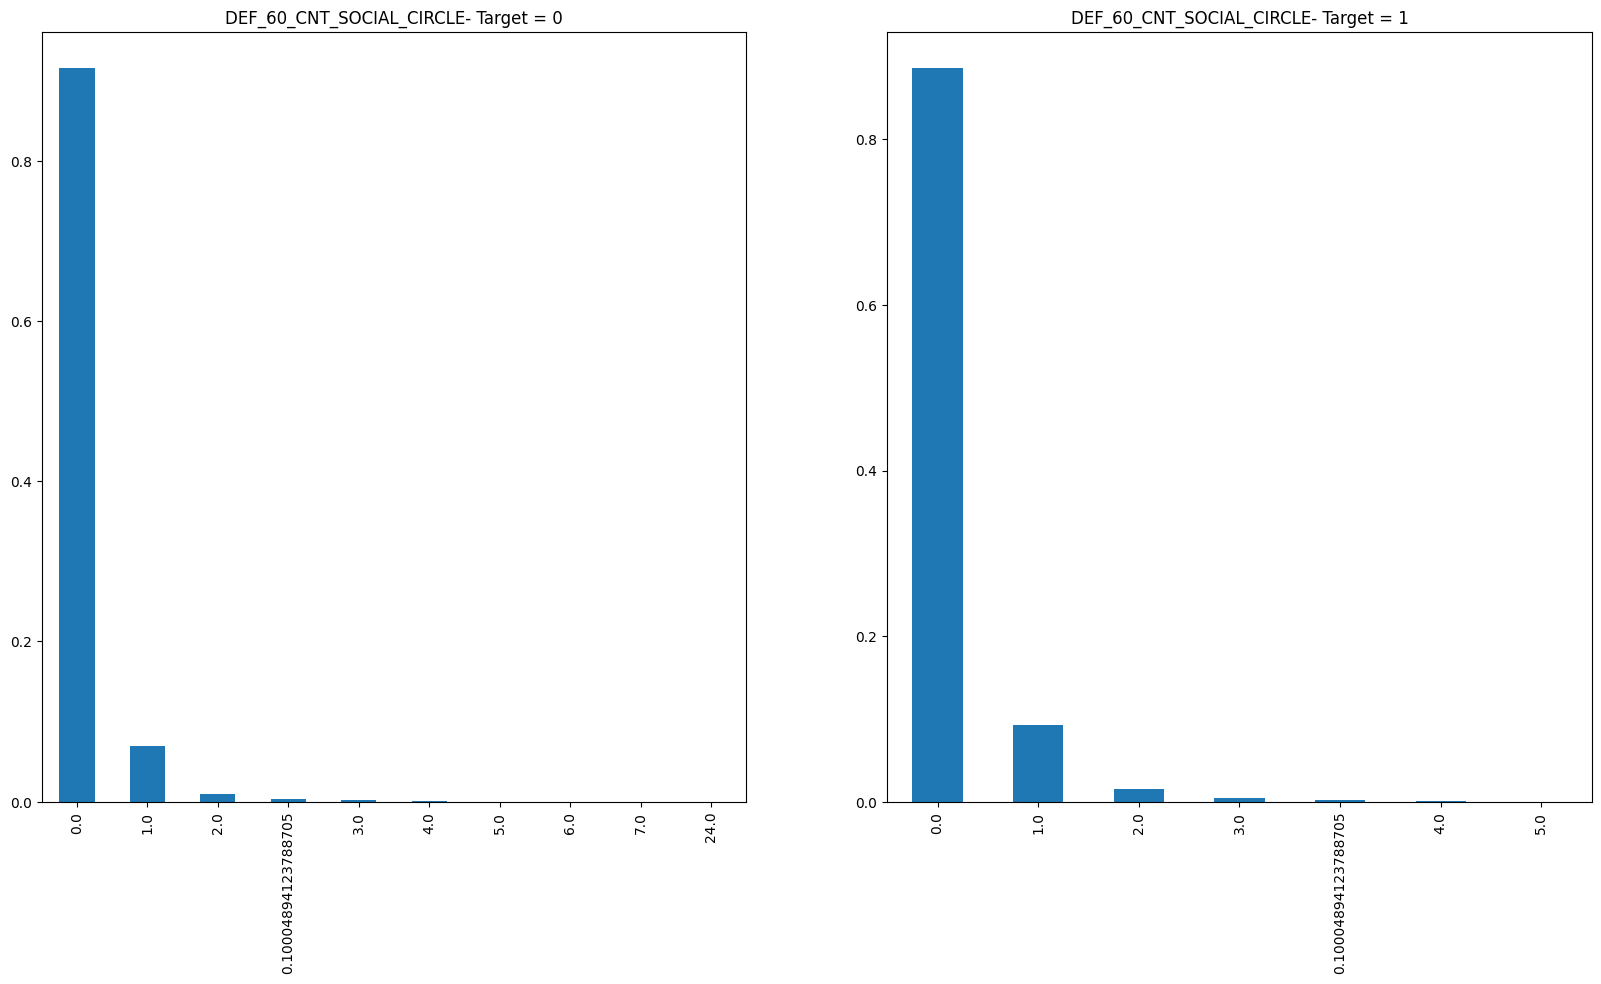

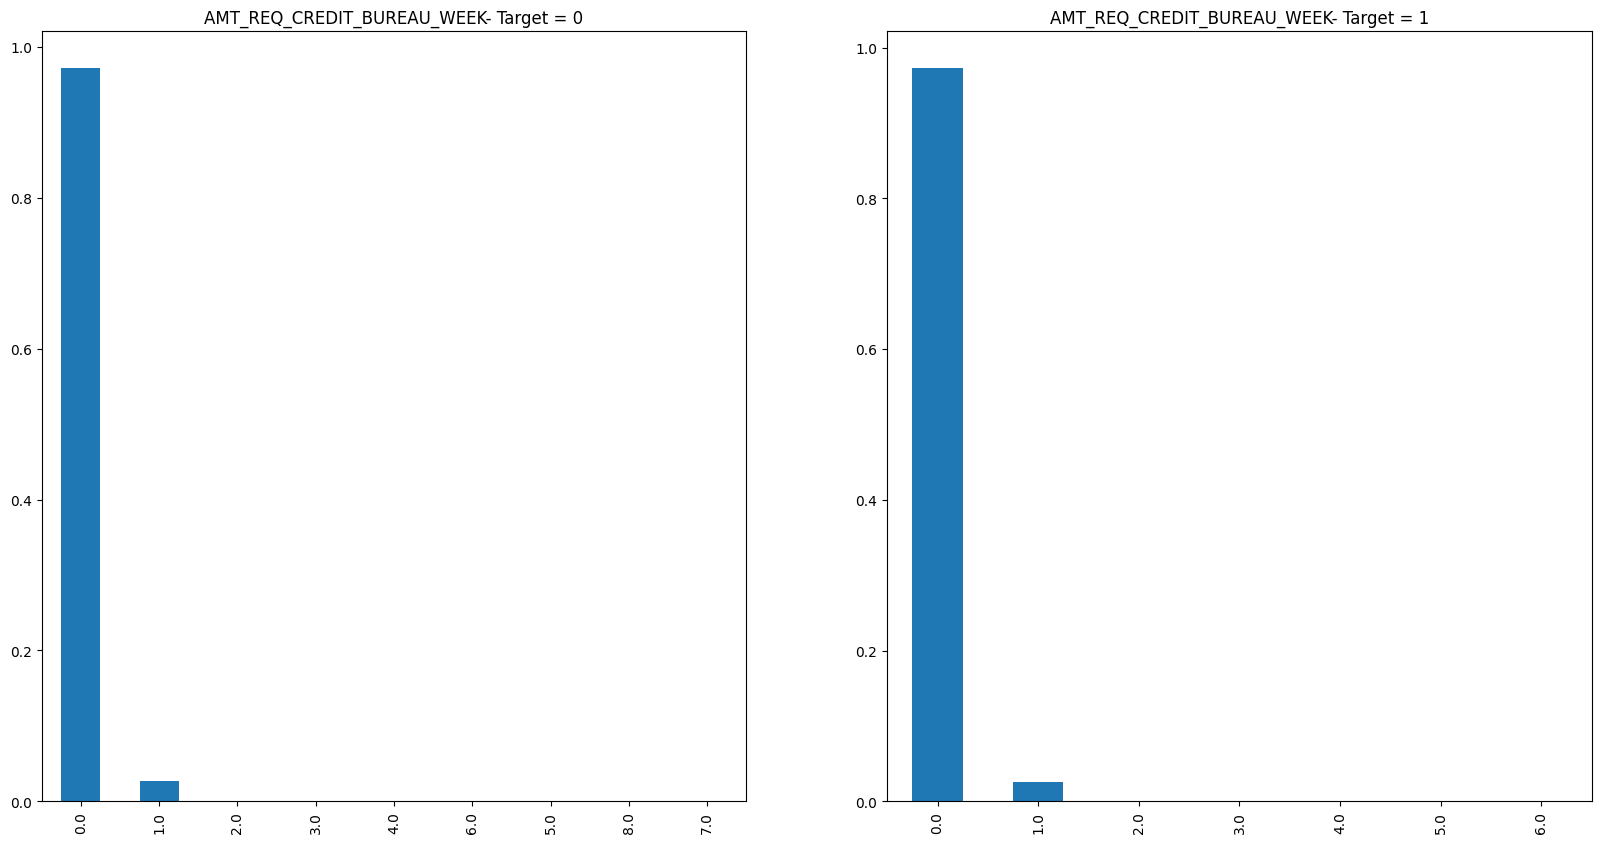

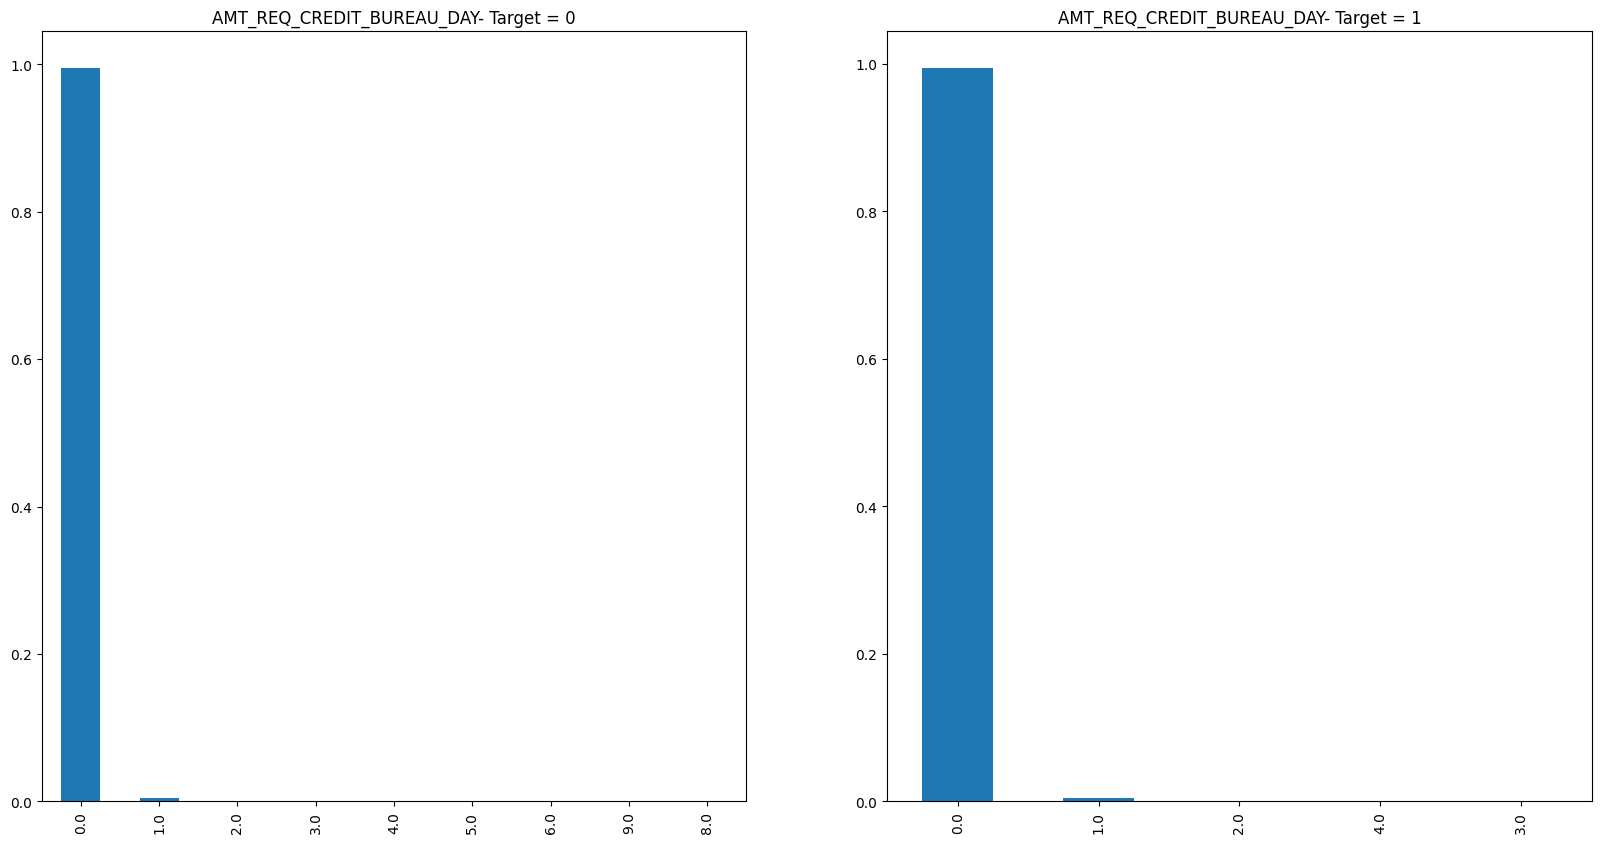

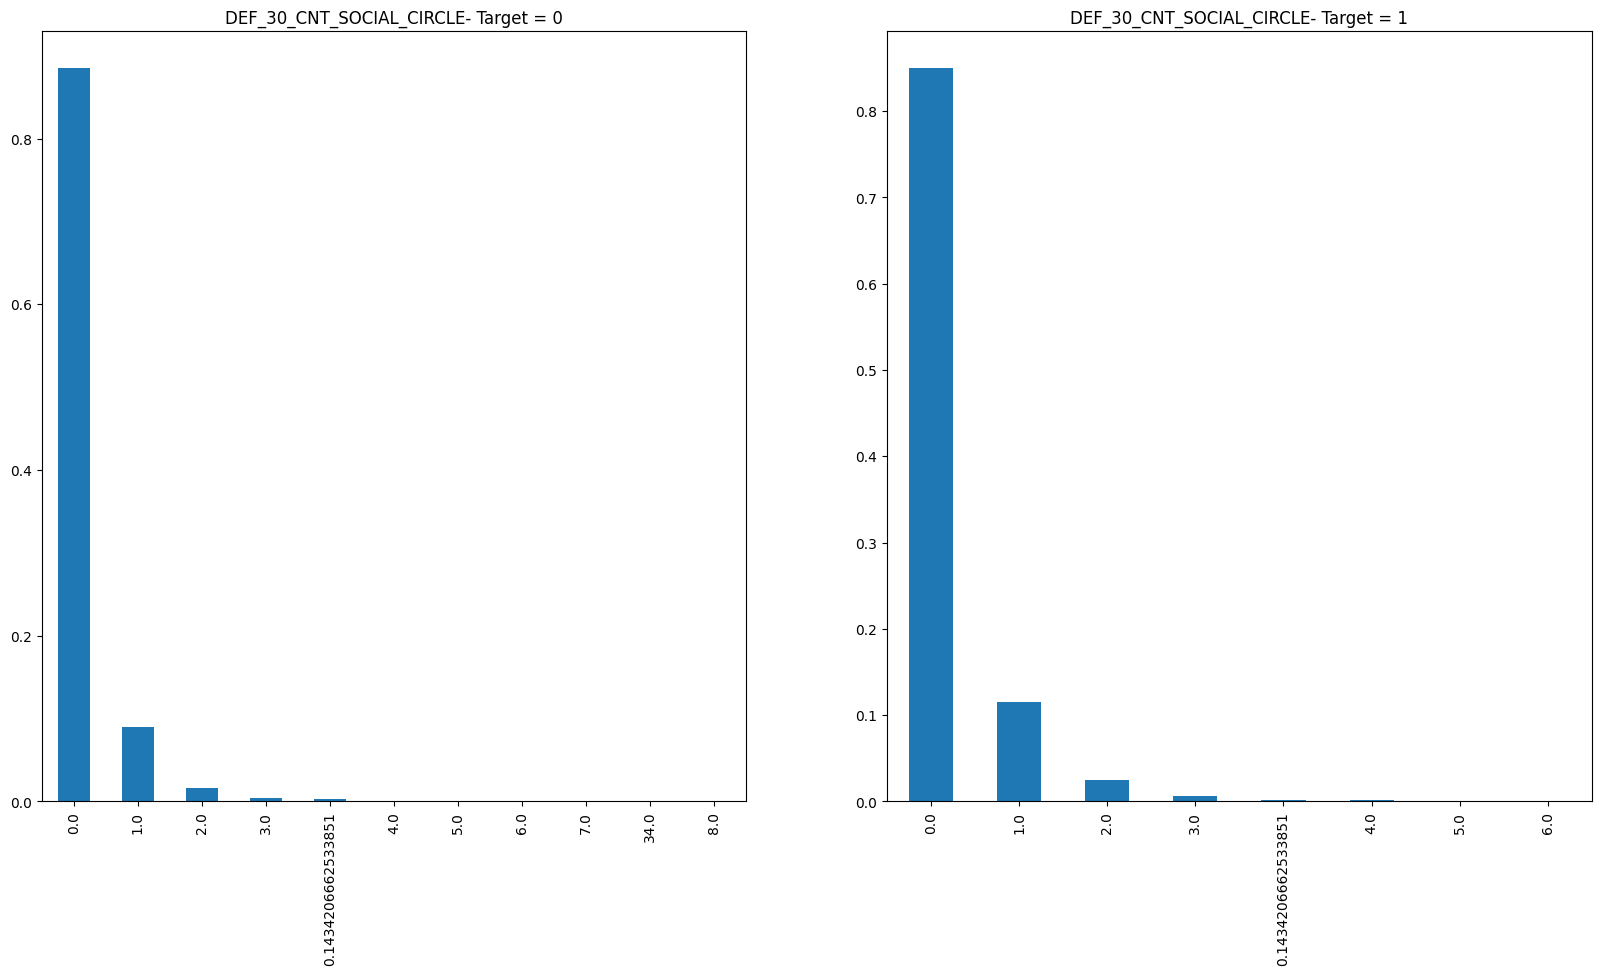

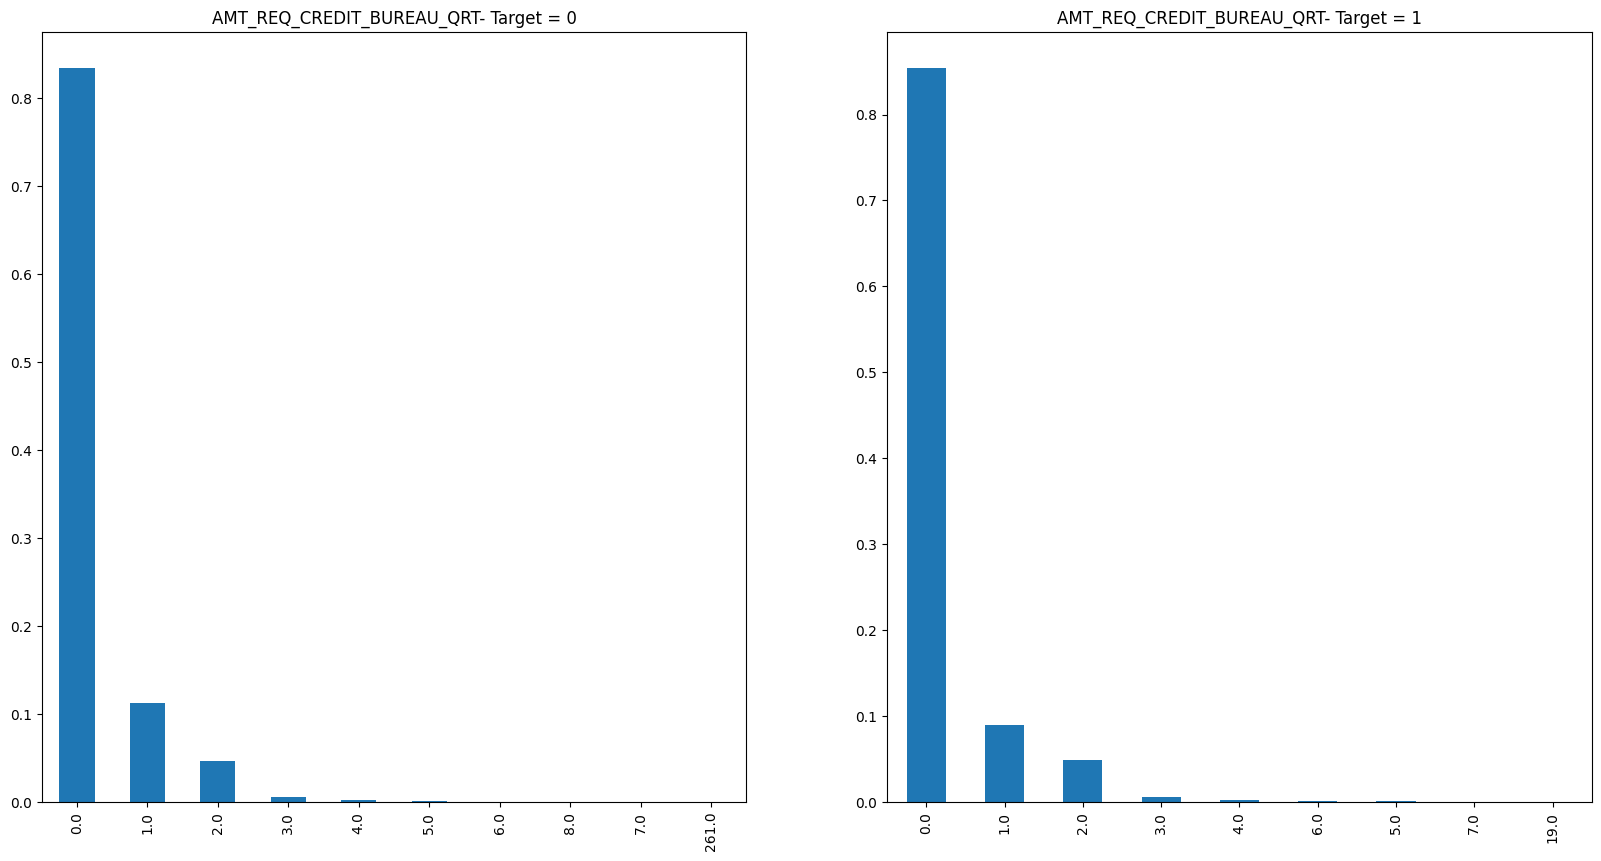

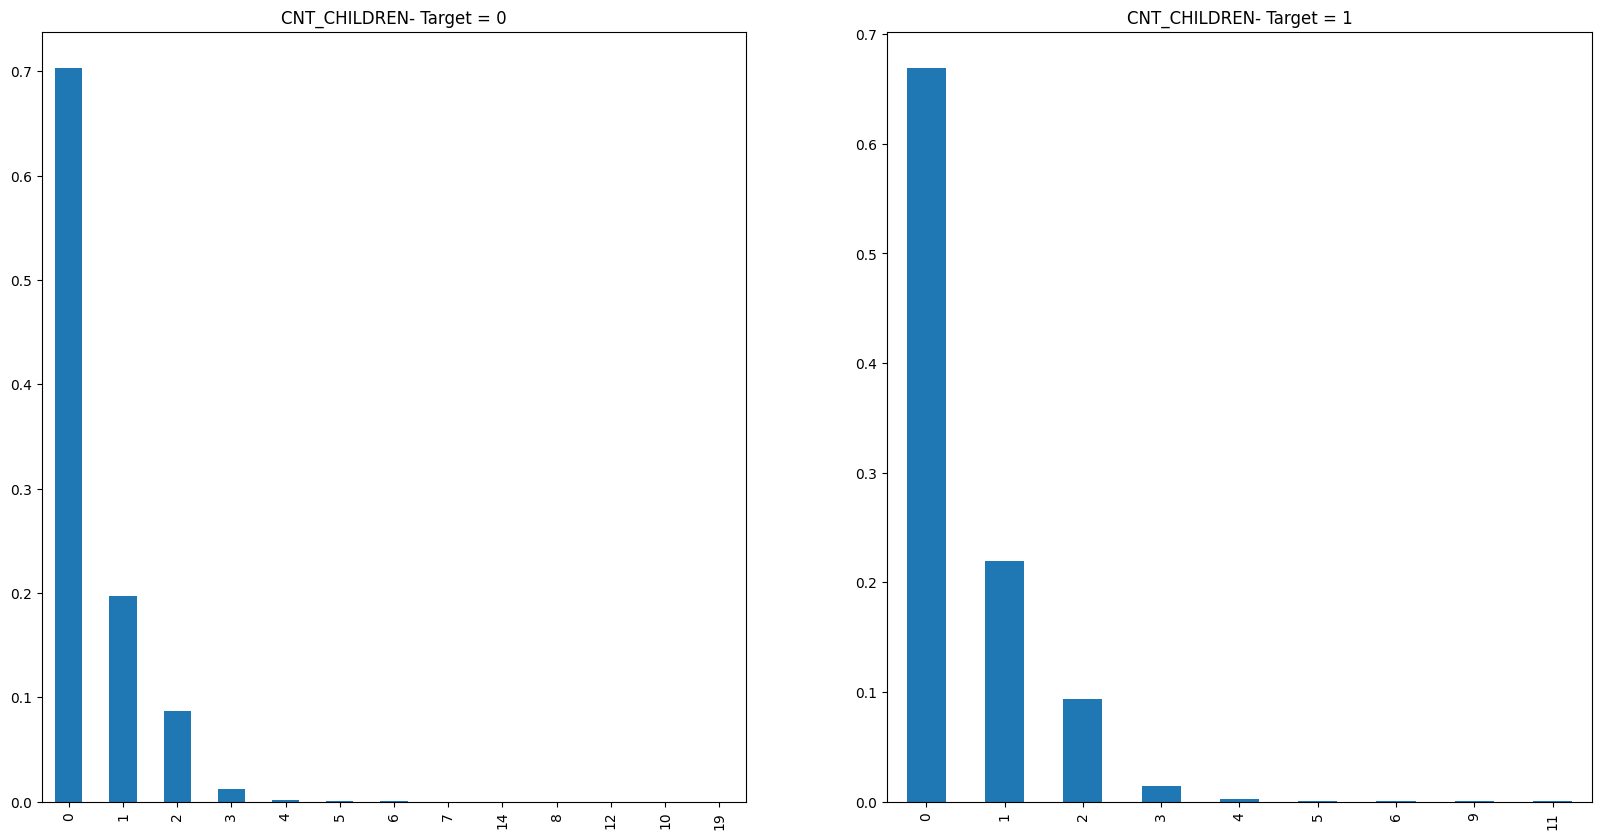

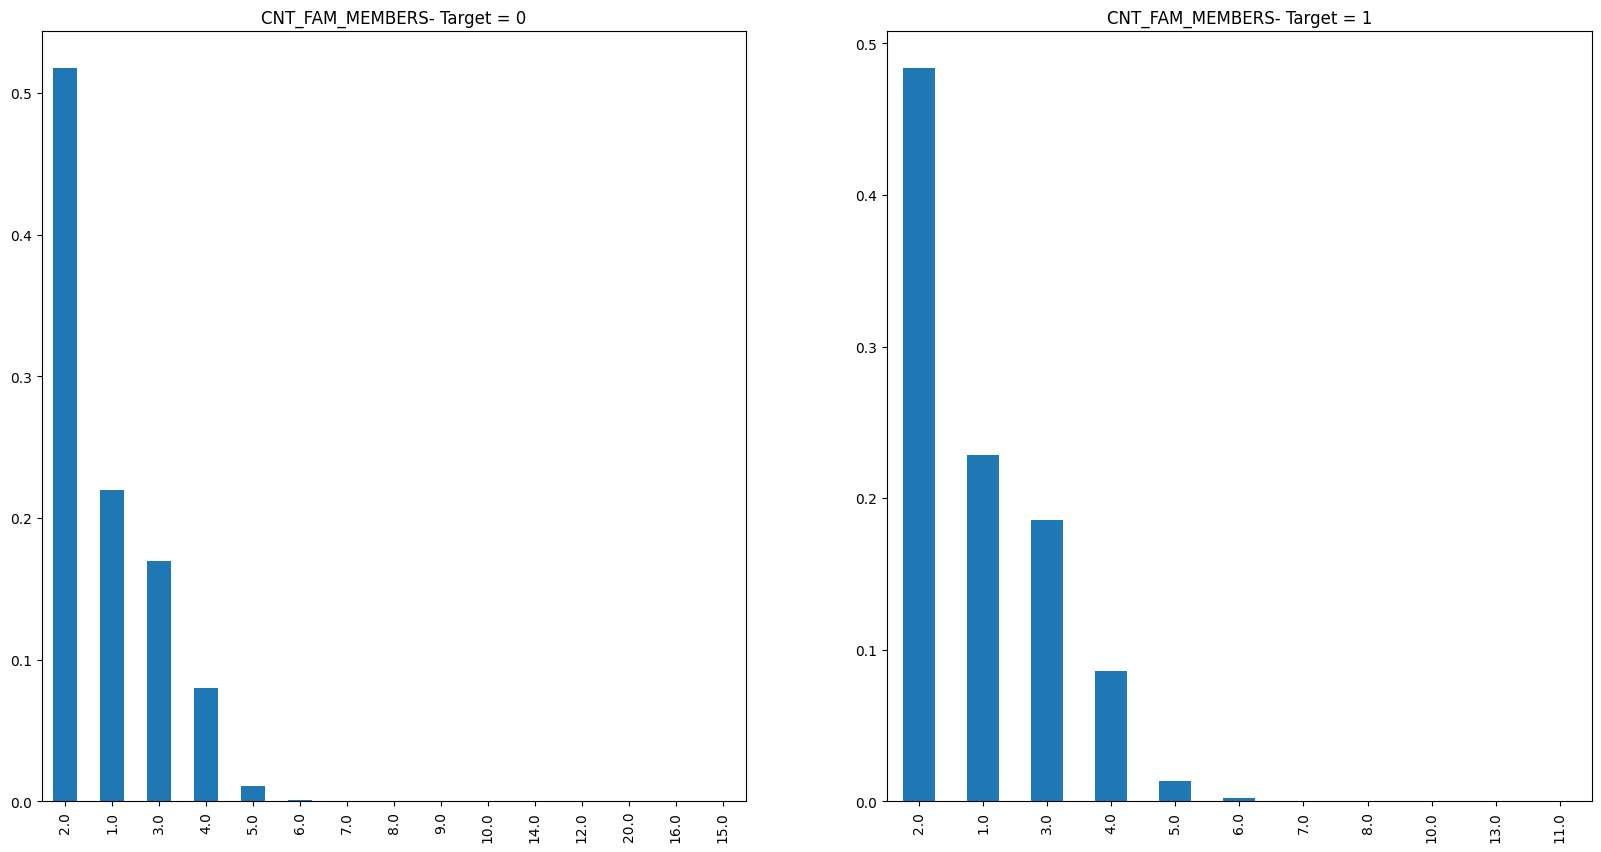

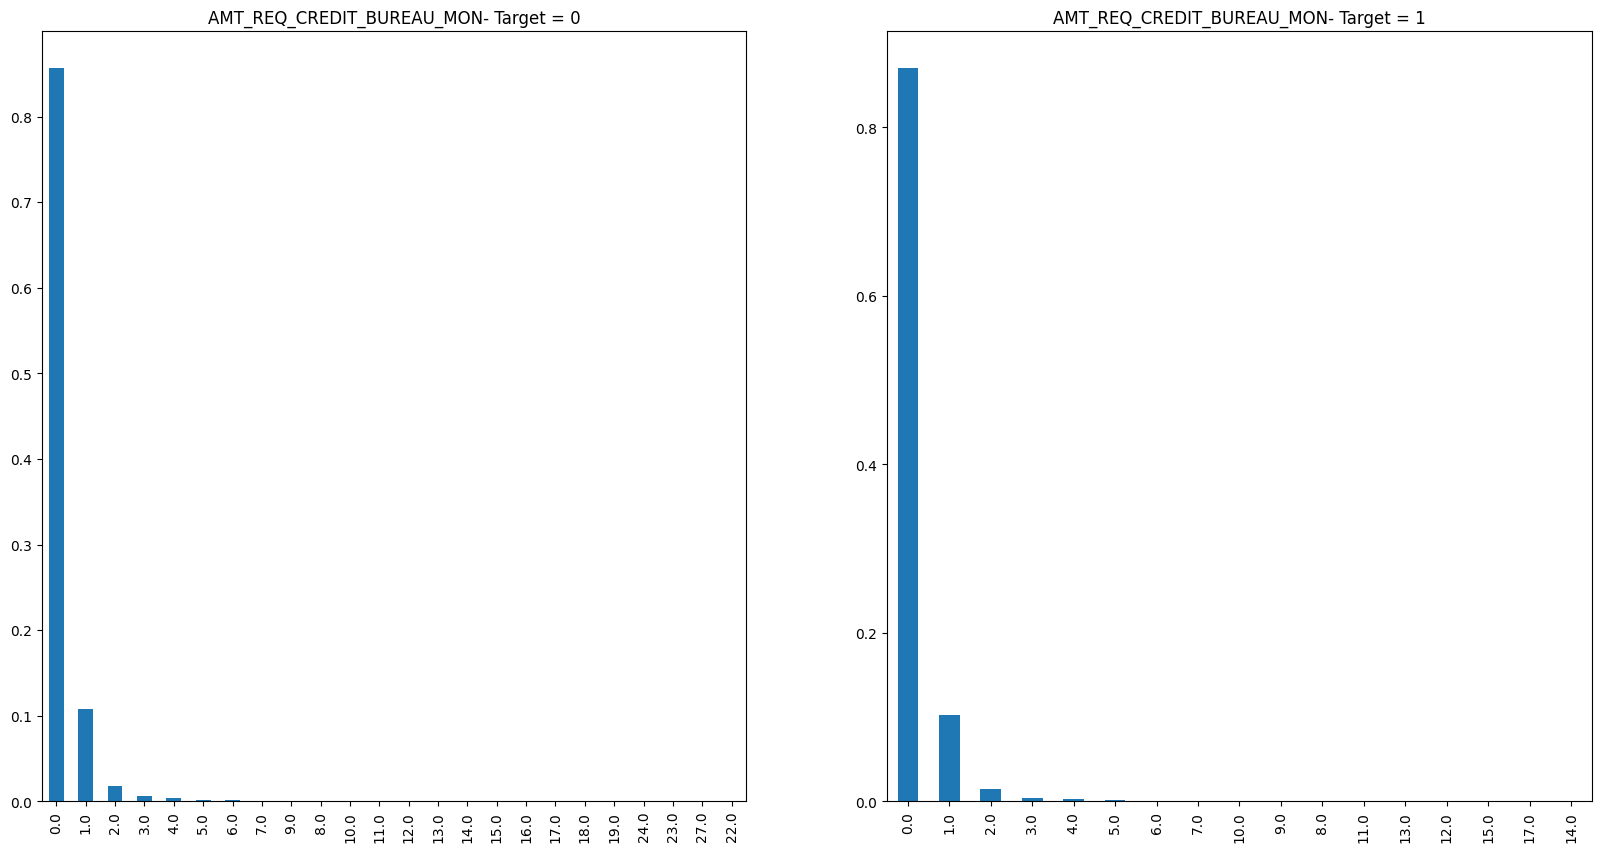

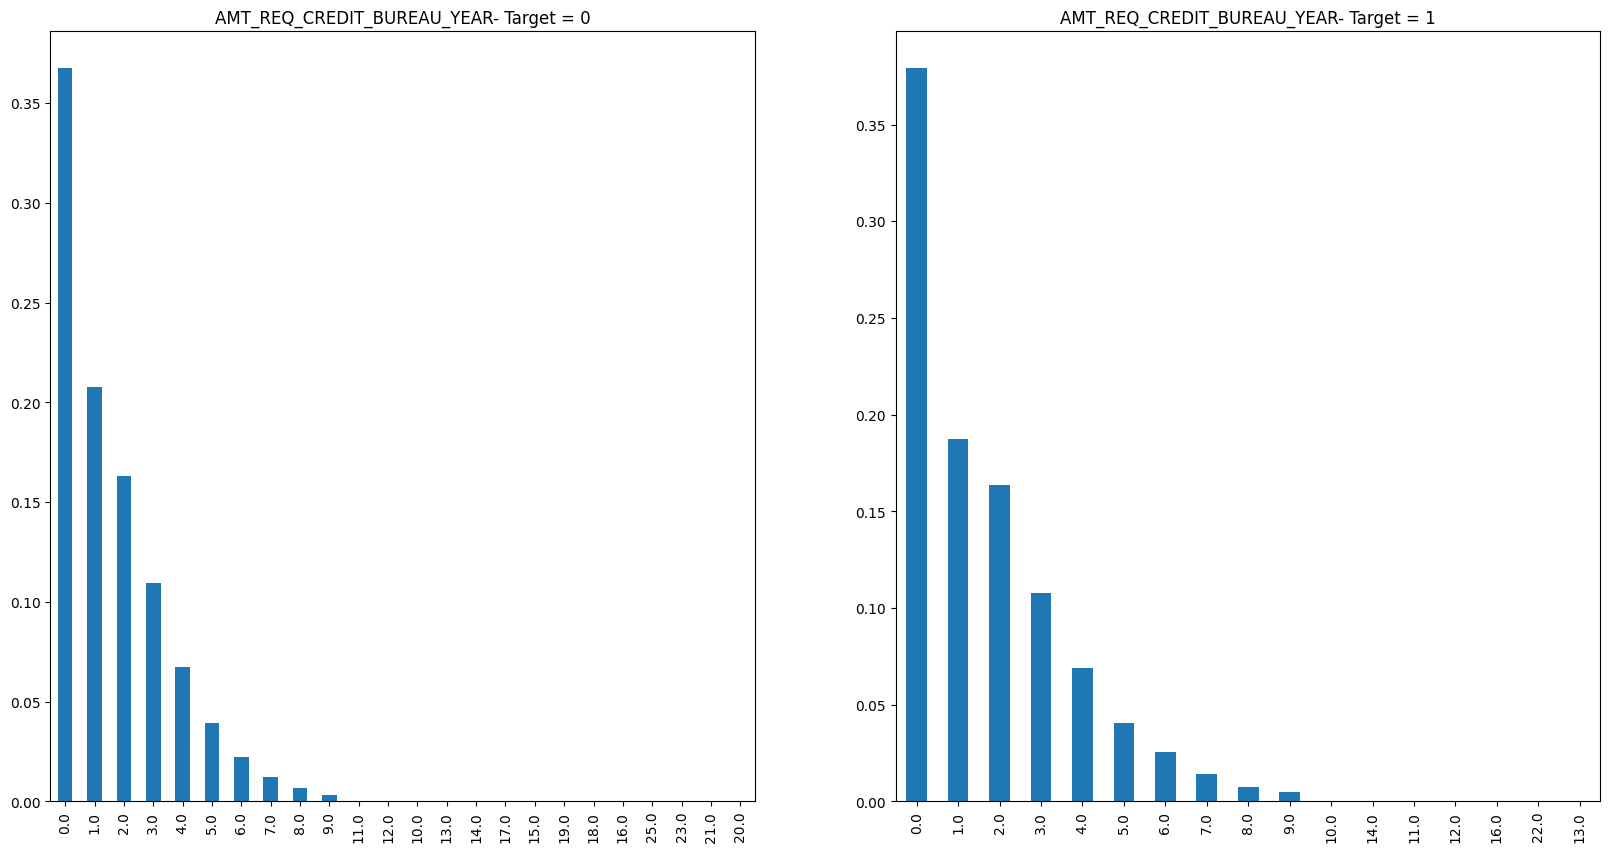

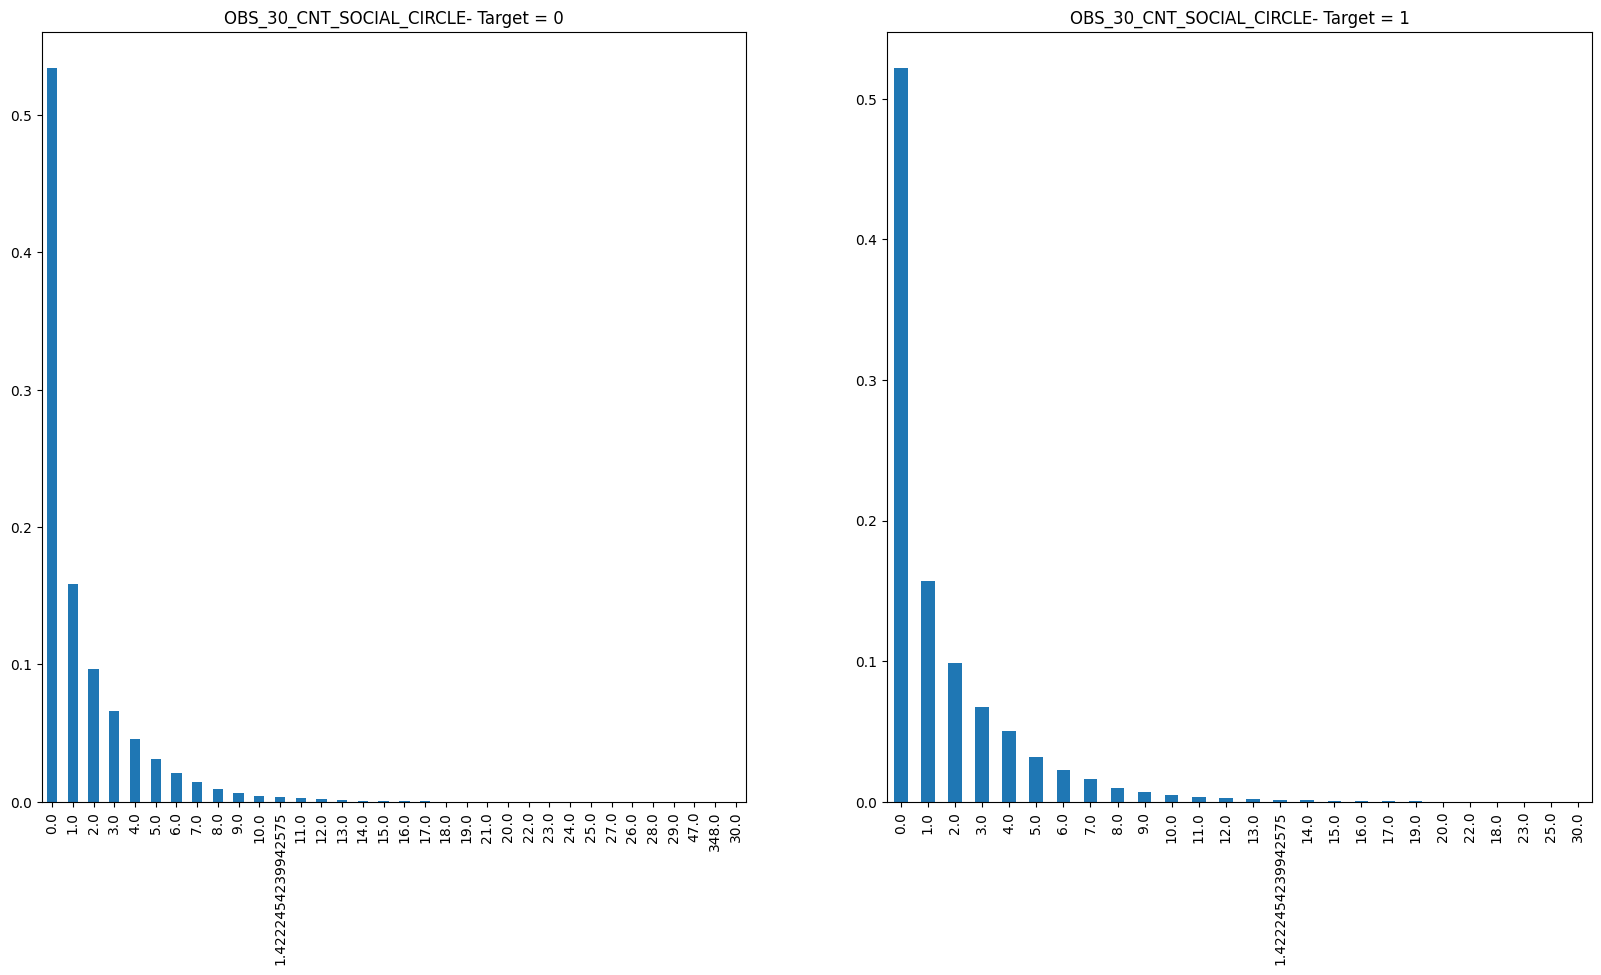

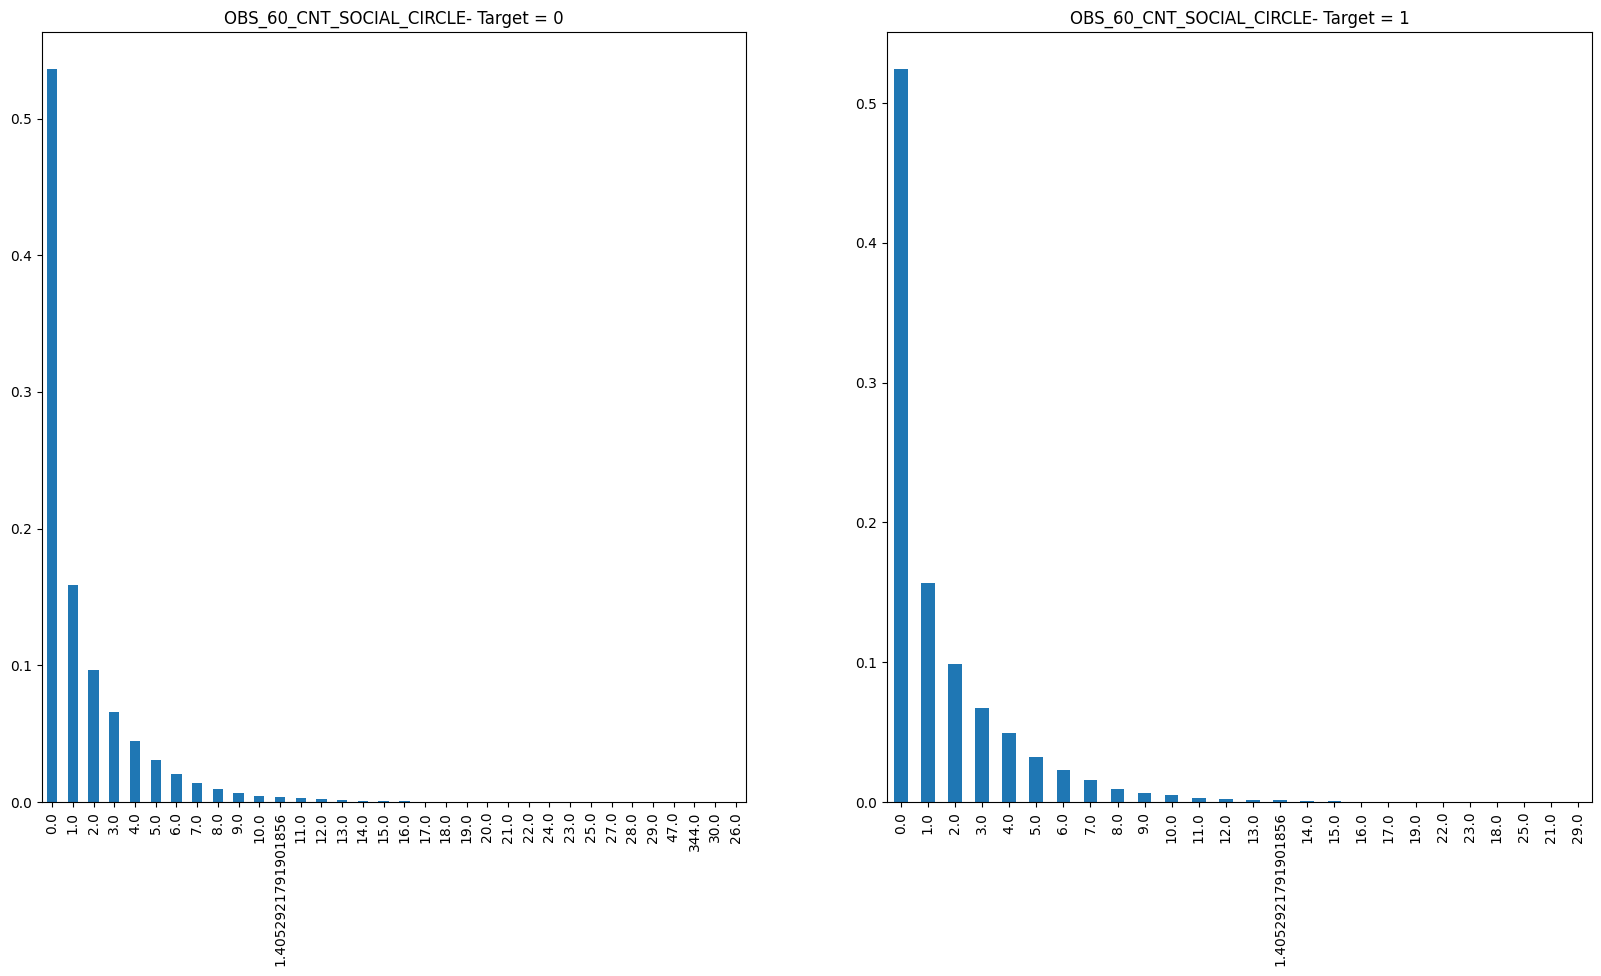

In [ ]:
#loop for performing univariate analysis
for i in categorical_columns:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    target_0_df[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Target = 0')
    plt.subplot(1,2,2)
    target_1_df[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Target = 1')


#### The above chart shows the distribution of customers across categorical variable for both Target = 0 and Target = 1

#### The objective of this analysis is to understand how numerical variables vary between target 0 and 1

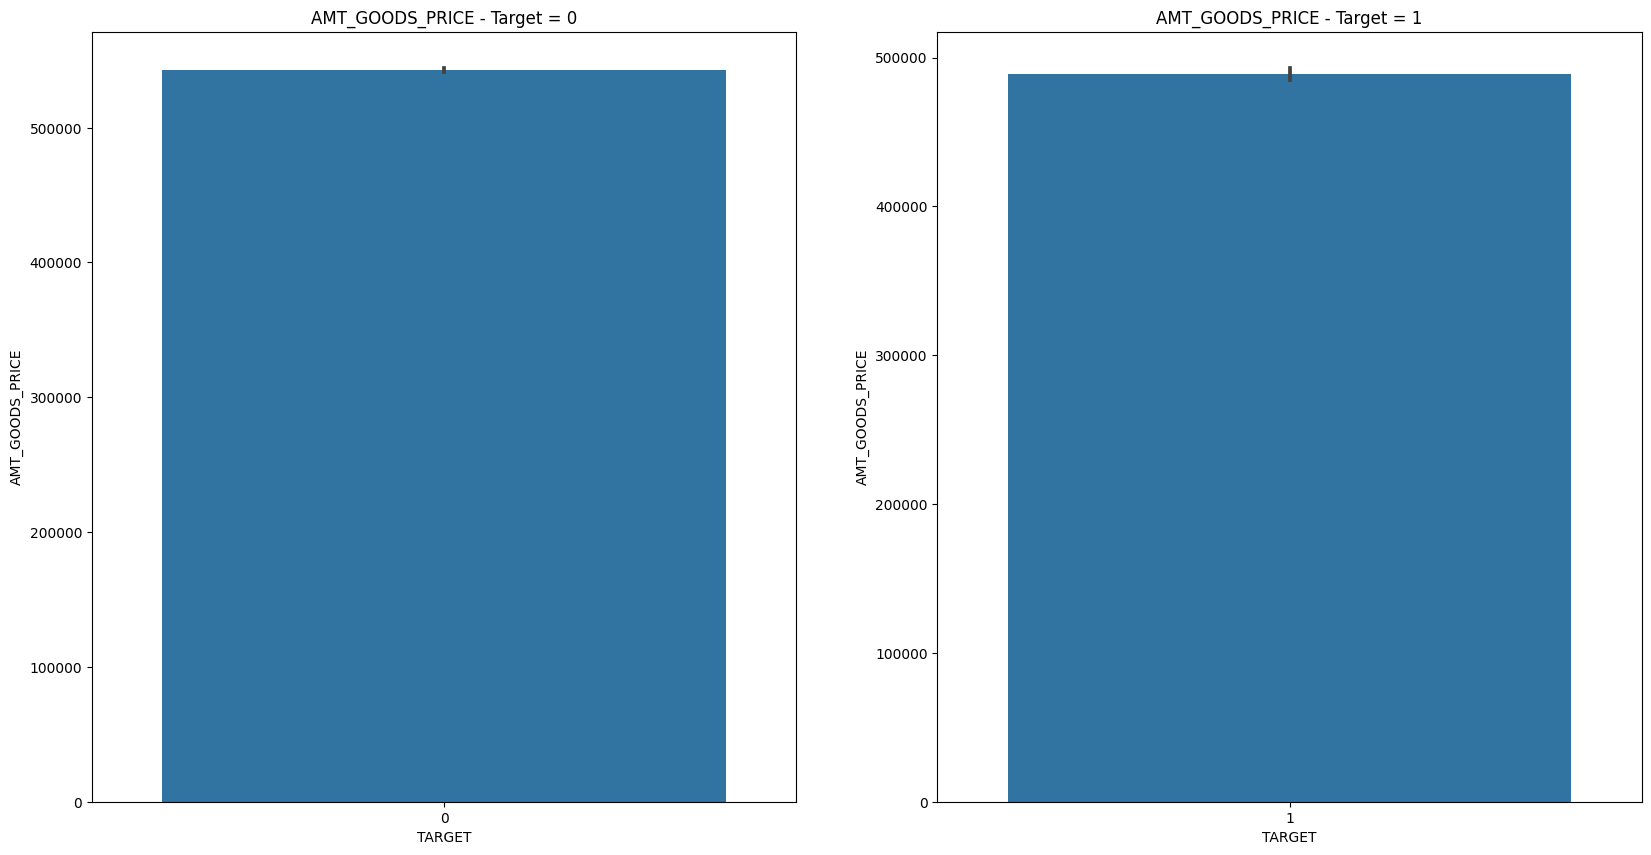

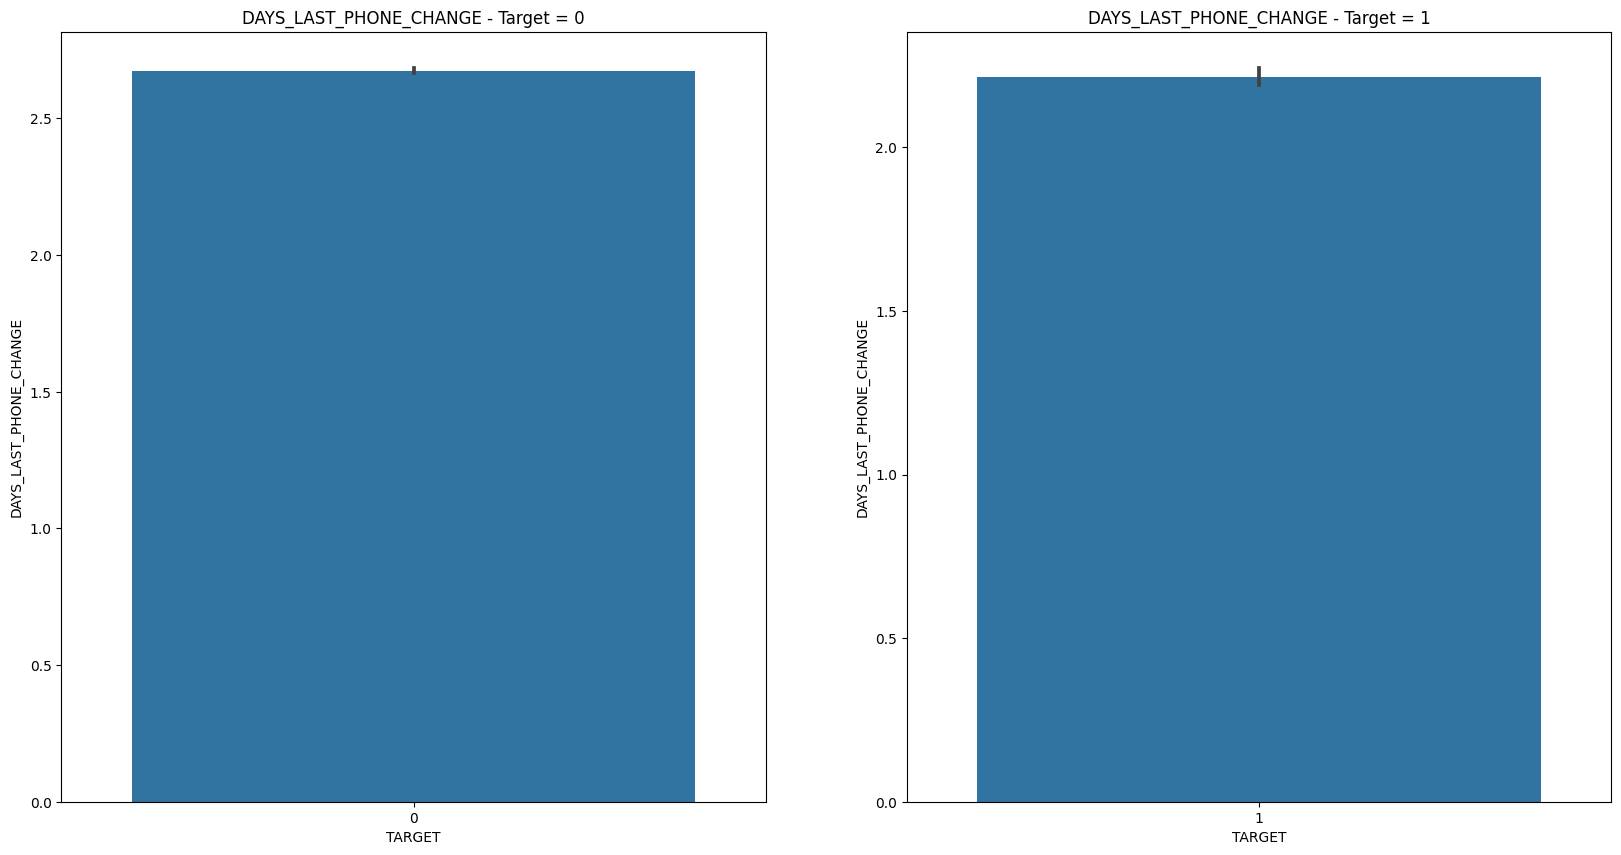

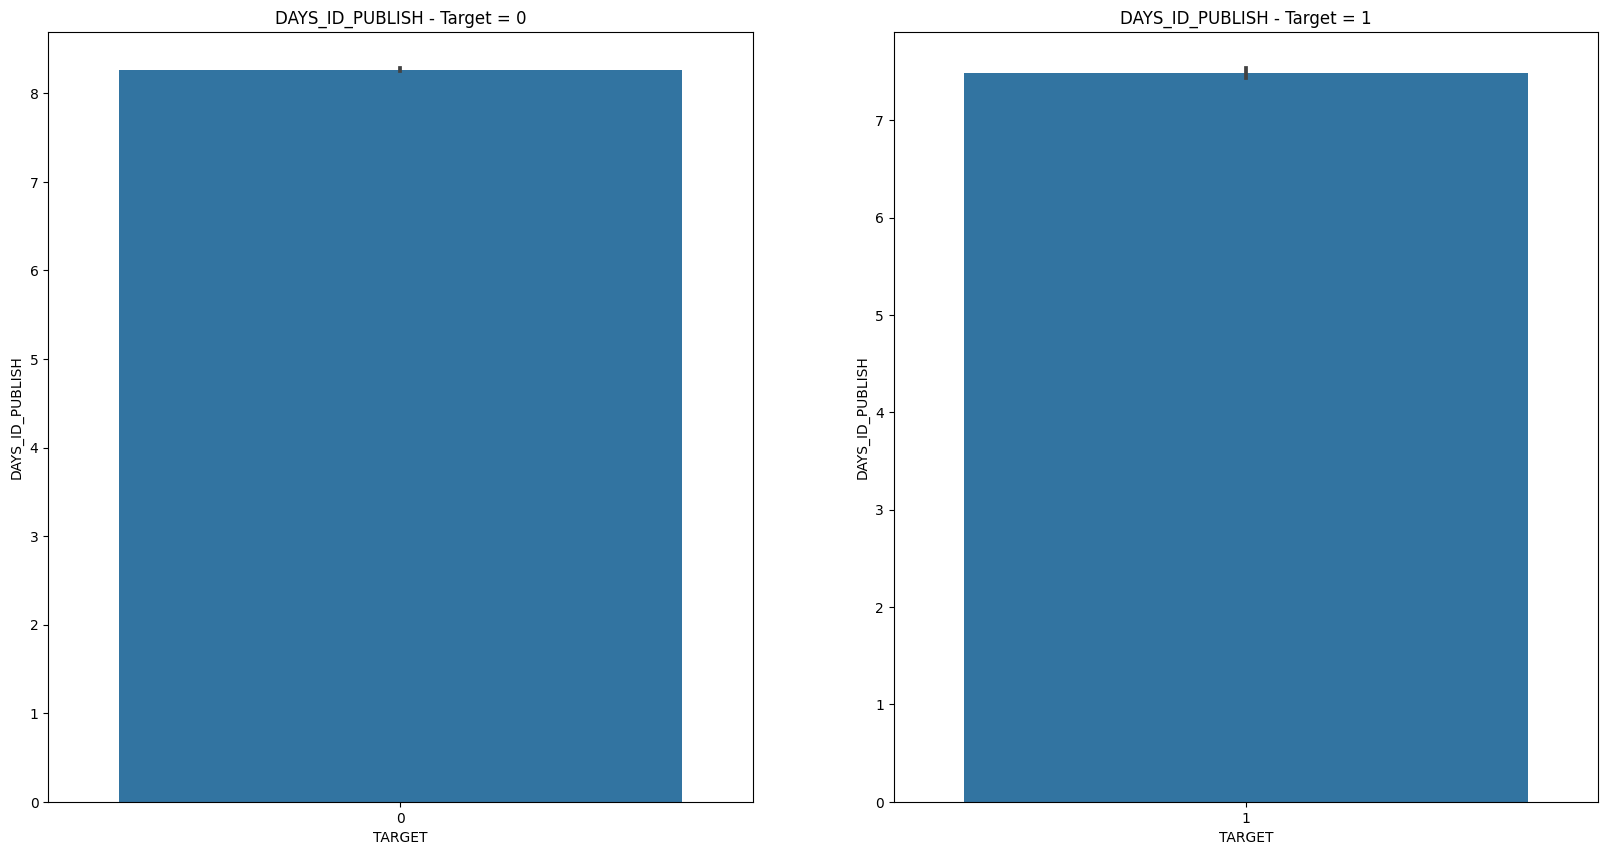

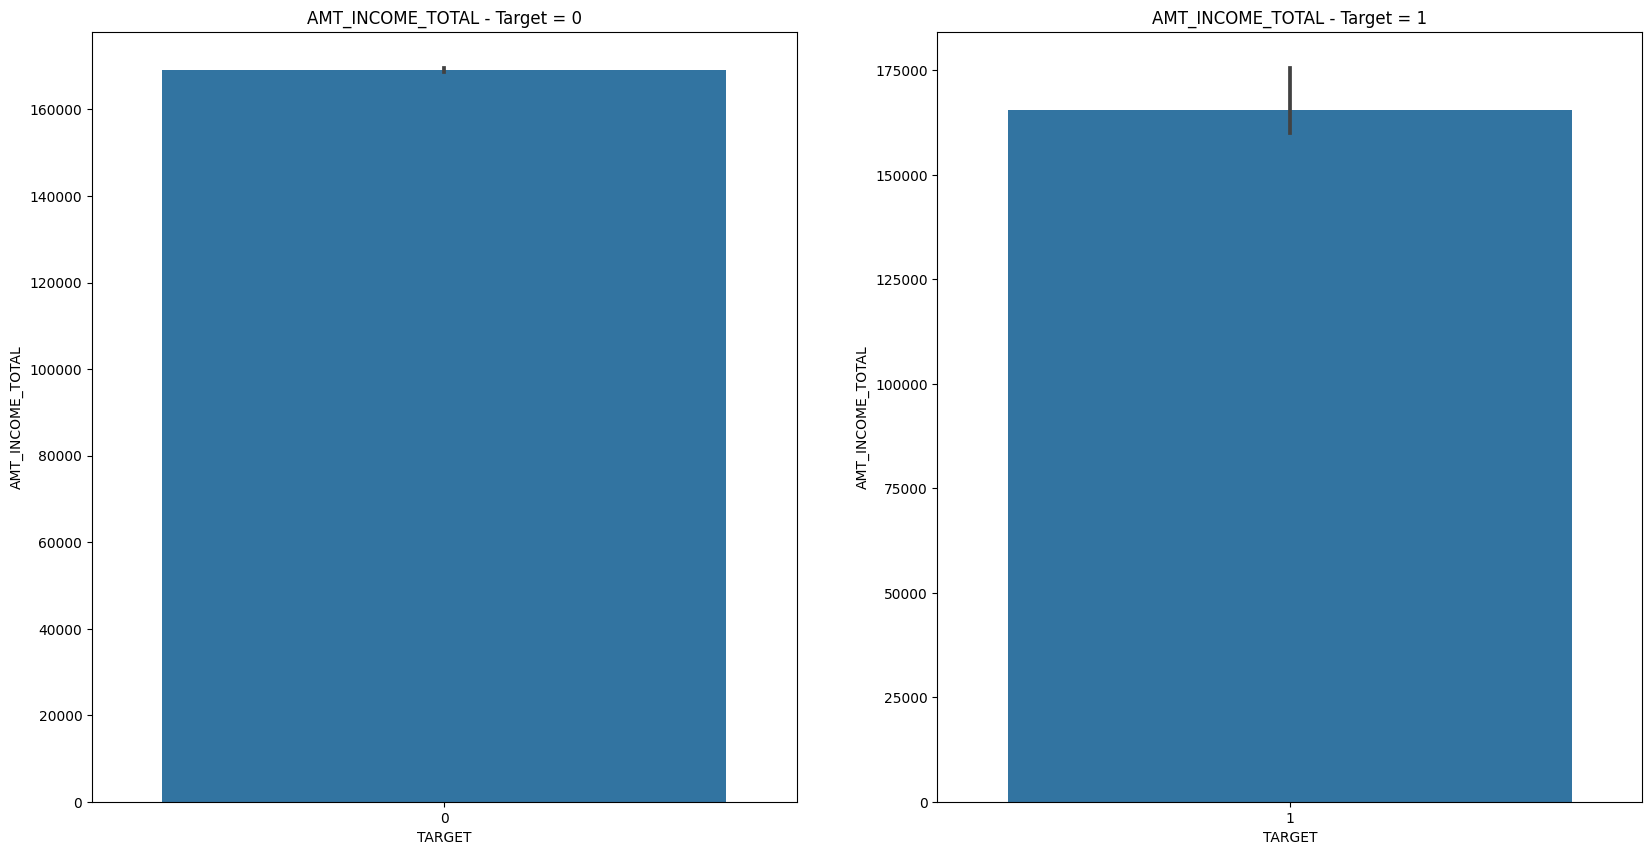

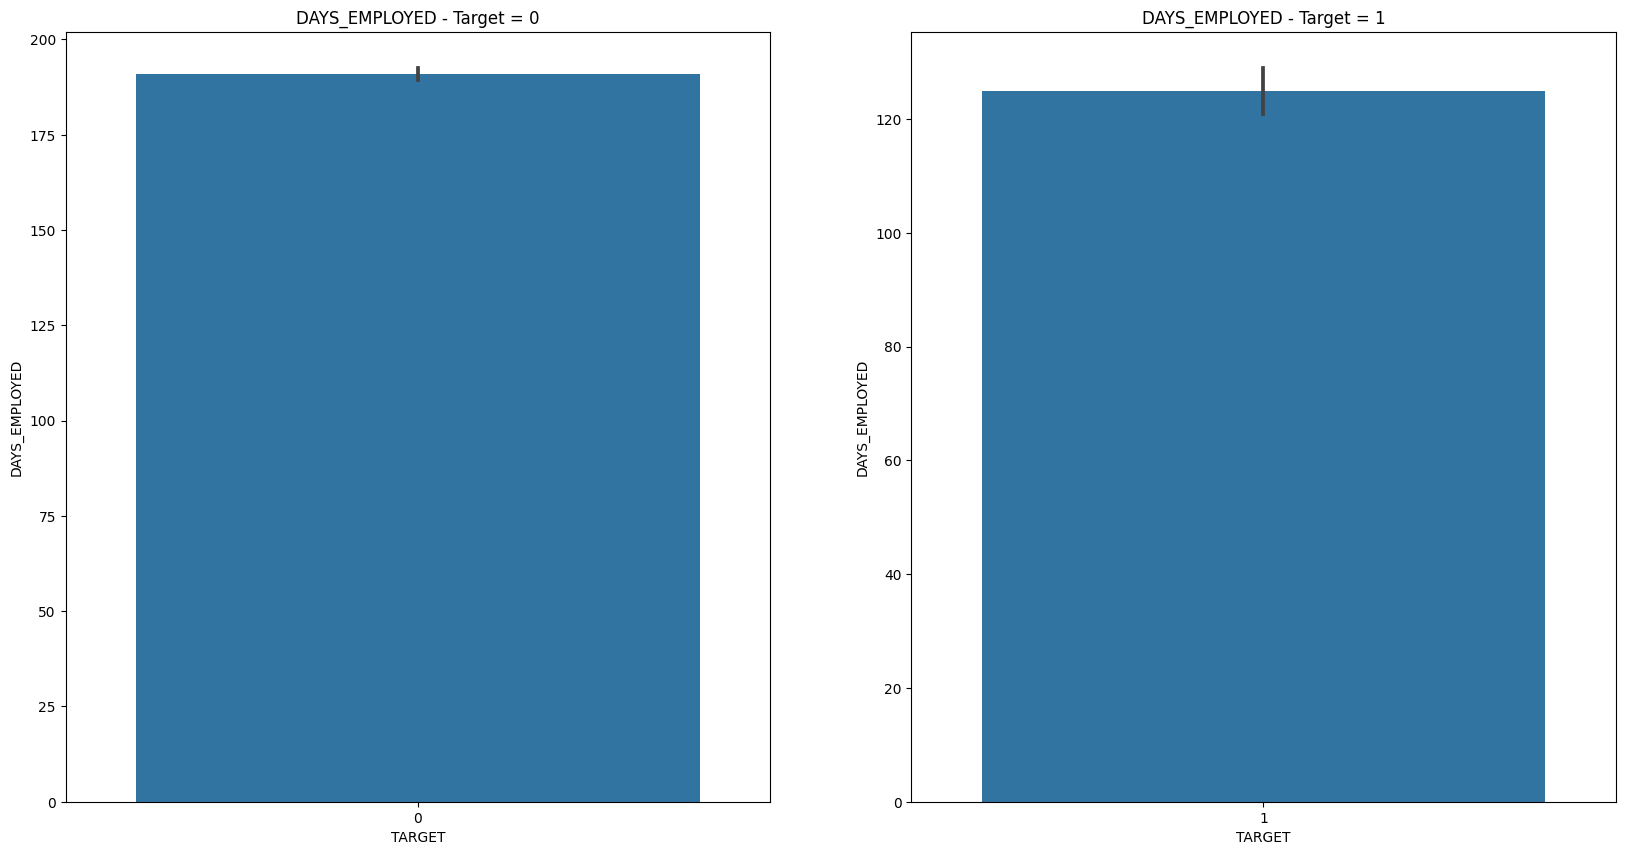

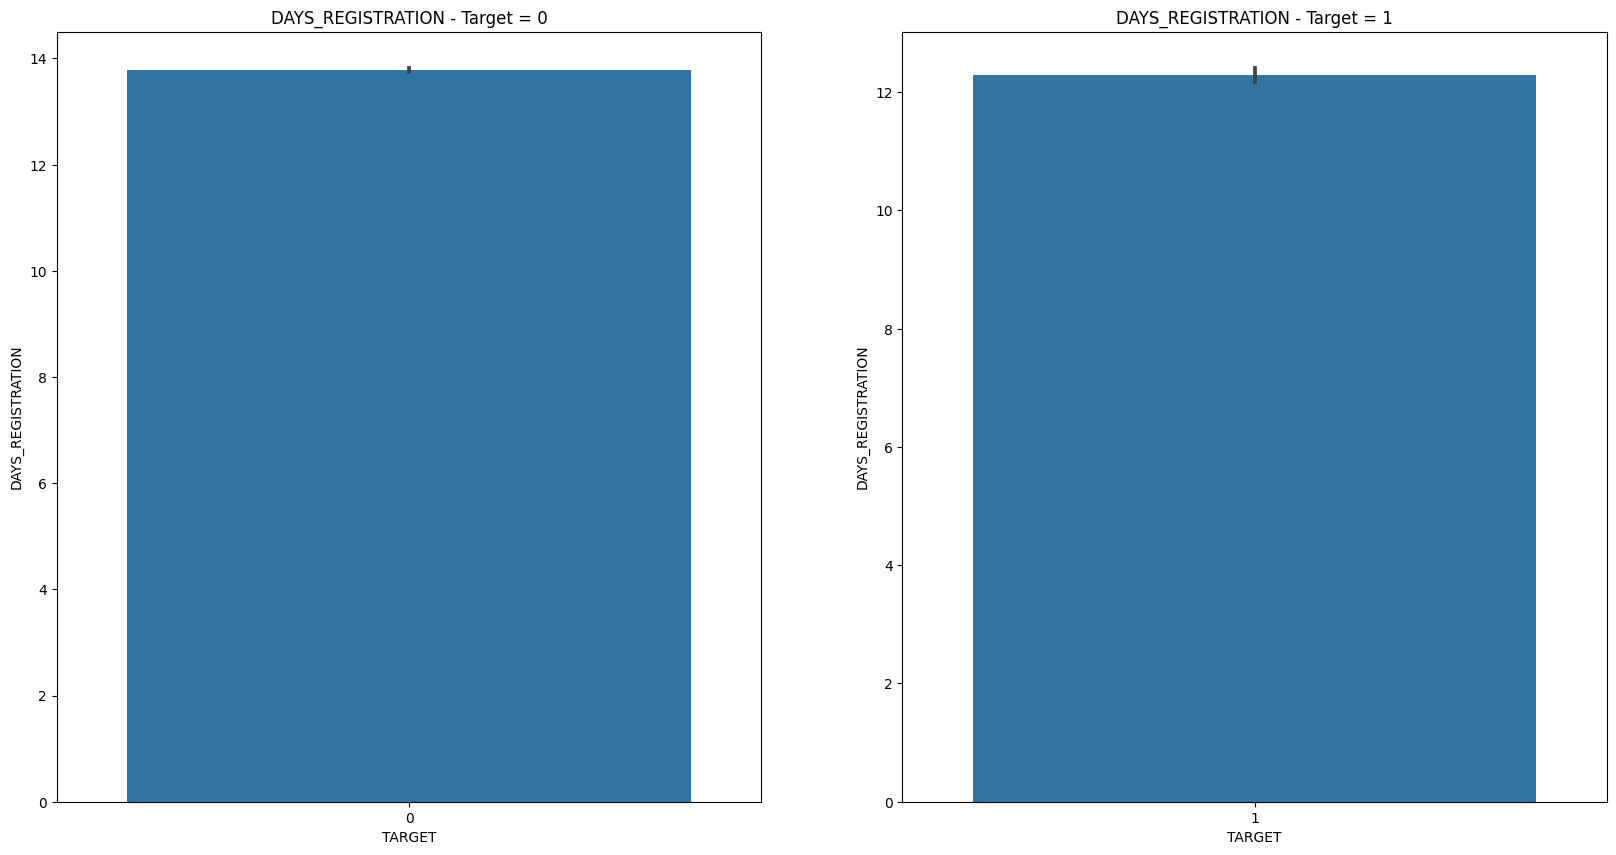

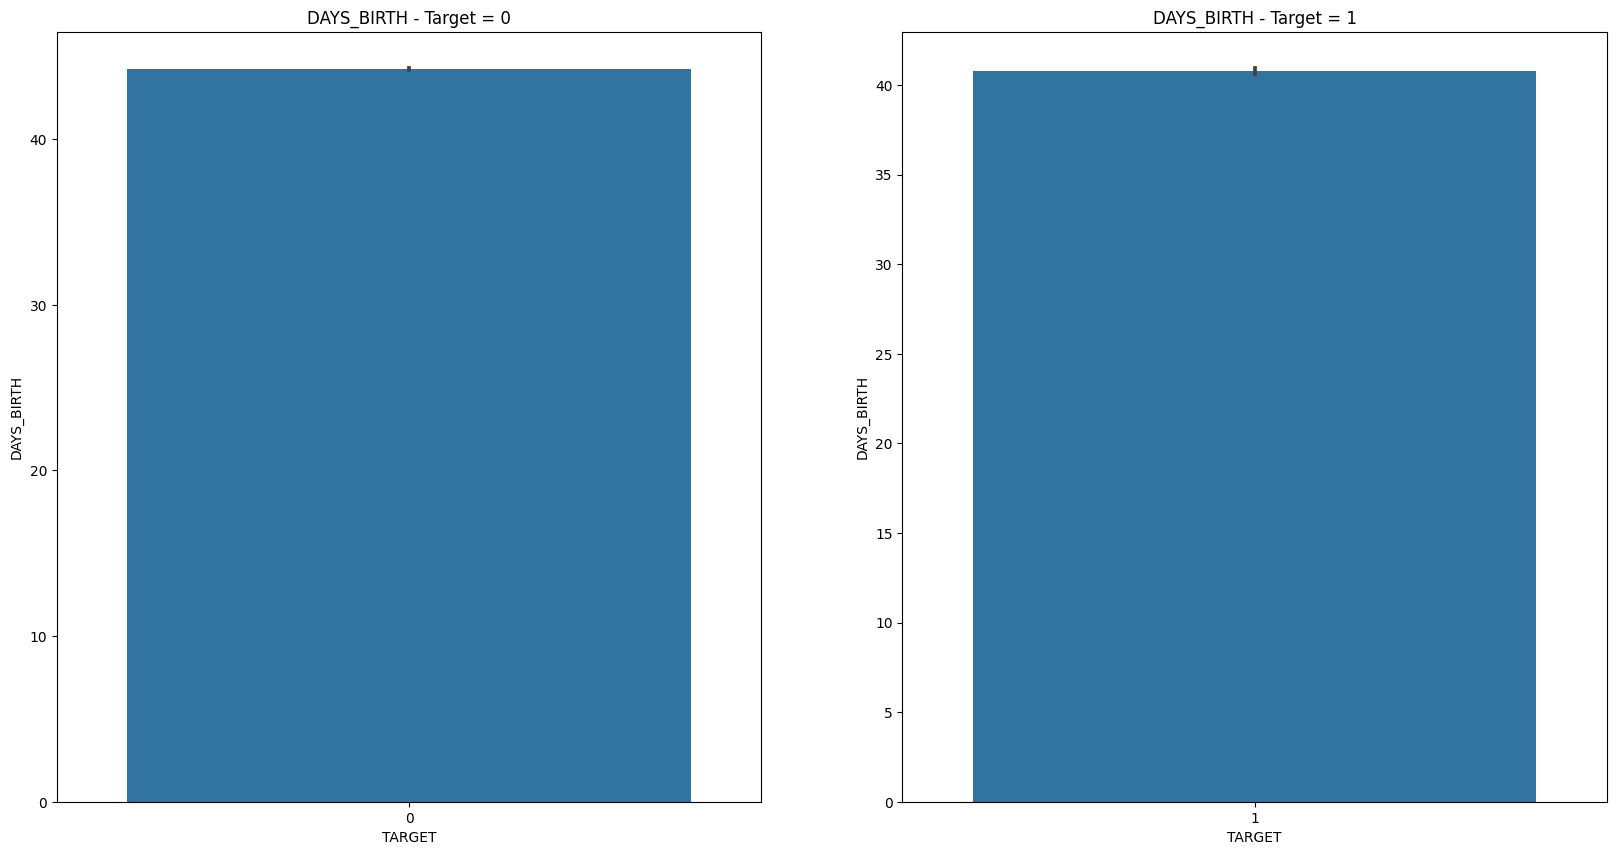

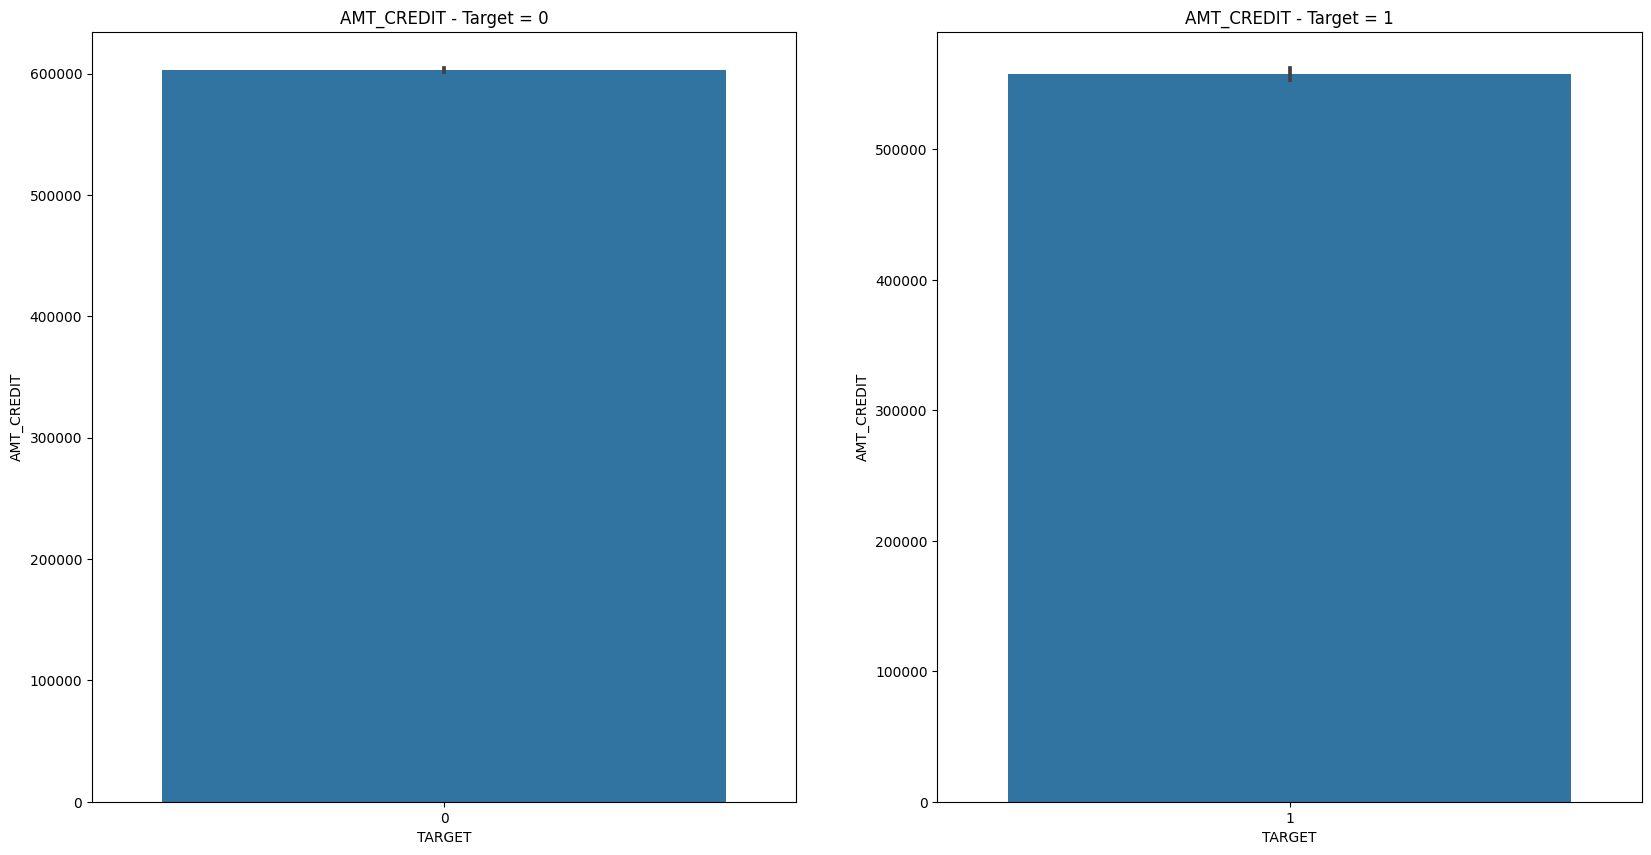

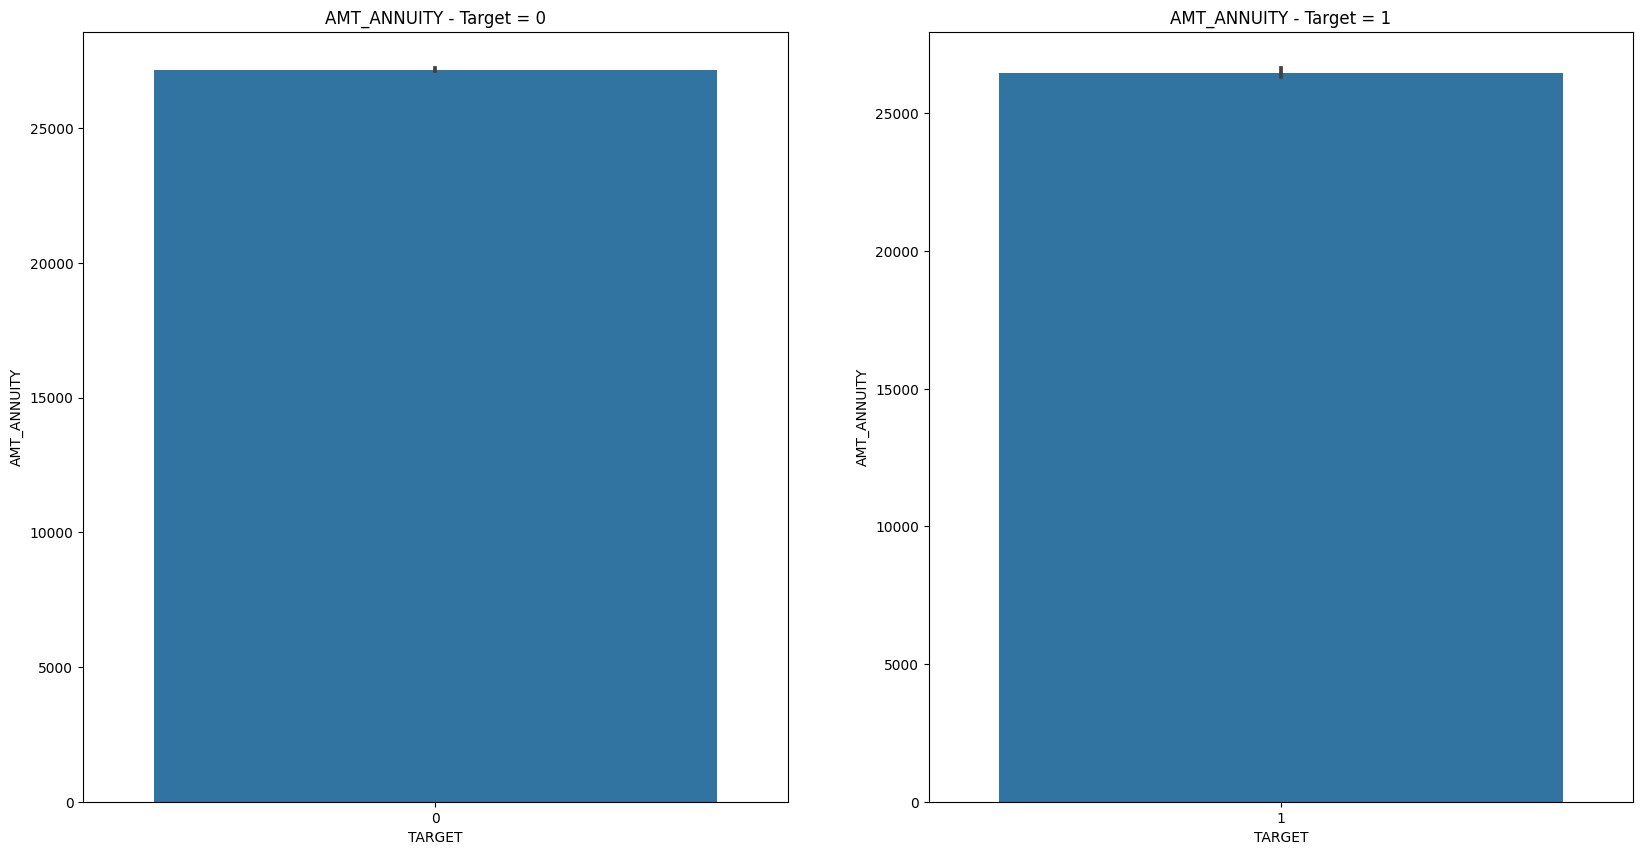

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.barplot(x='TARGET', y=i, data=target_0_df)
    plt.title(i + ' - Target = 0')
    plt.subplot(1, 2, 2)
    sns.barplot(x='TARGET', y=i, data=target_1_df)
    plt.title(i + ' - Target = 1')
    plt.show()



### 4.7 Bivariate Analysis for Categorical Variable

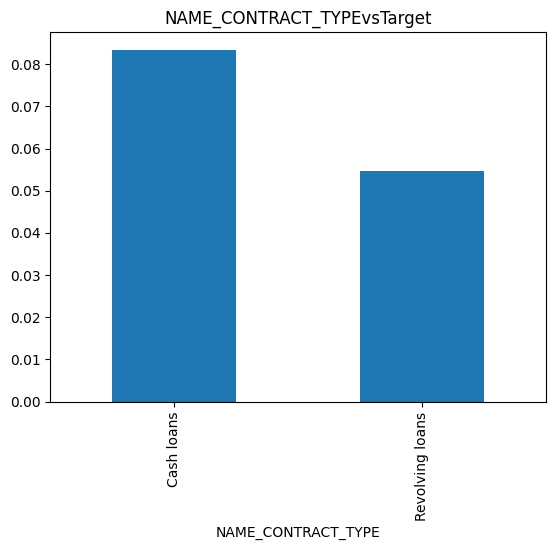

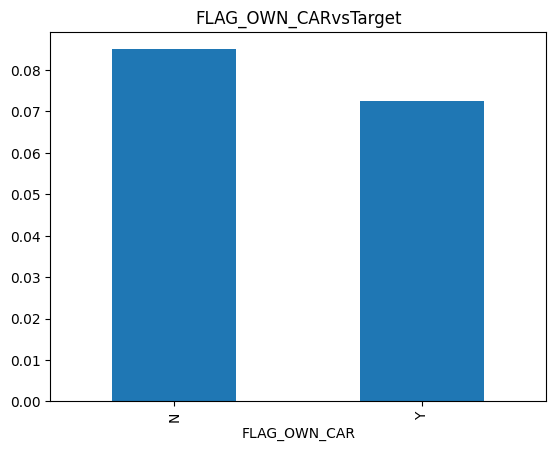

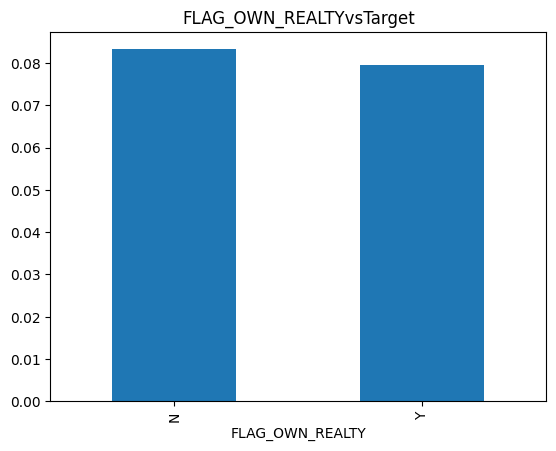

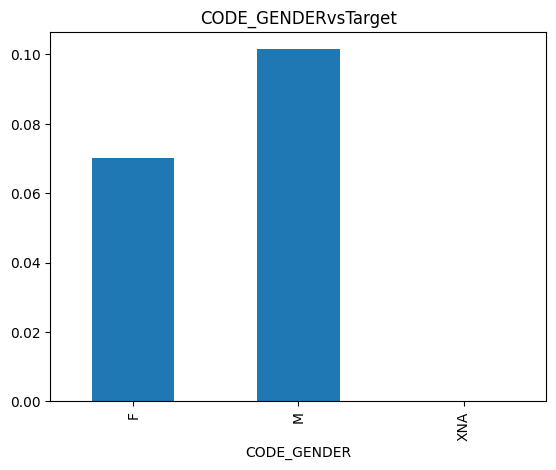

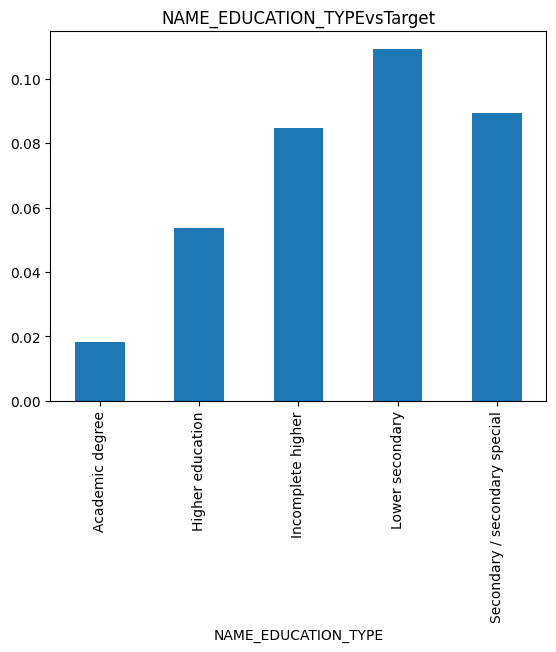

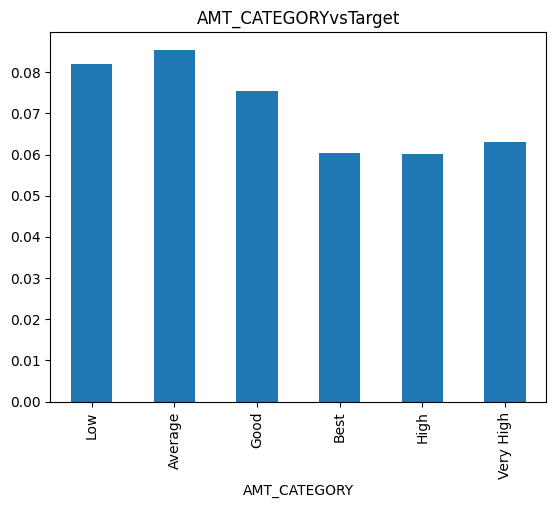

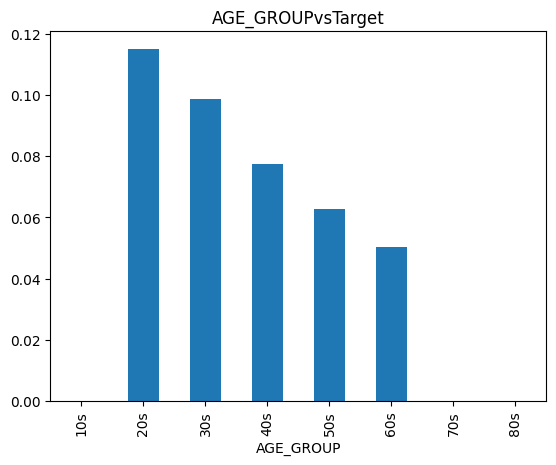

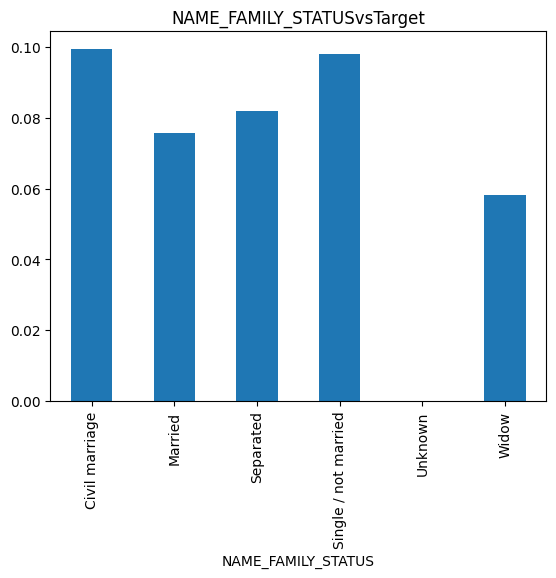

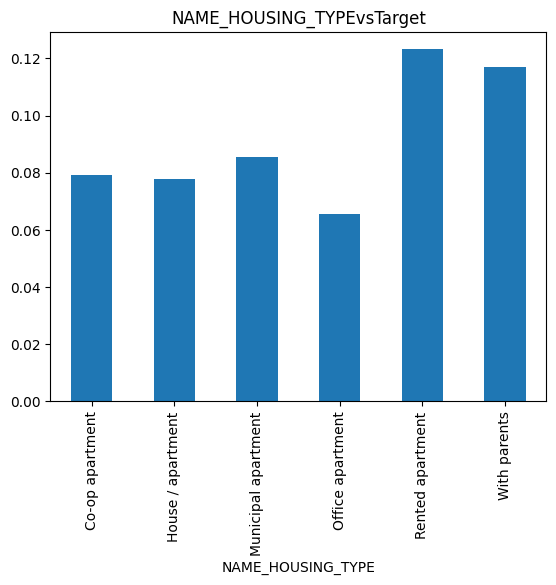

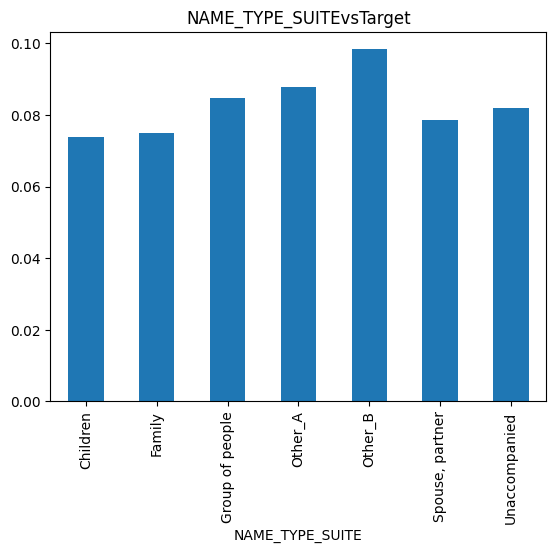

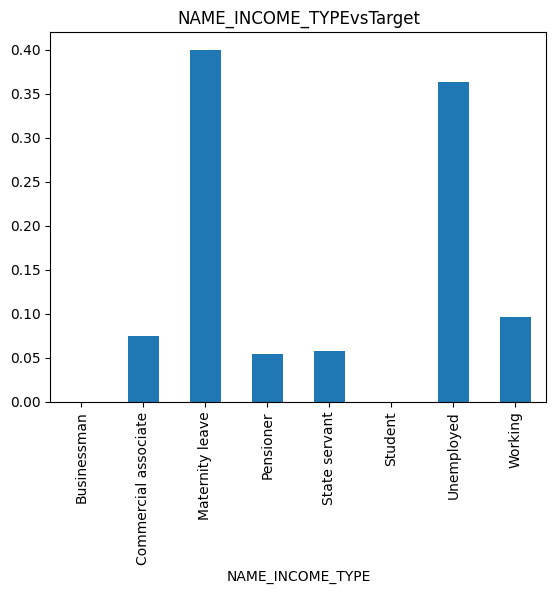

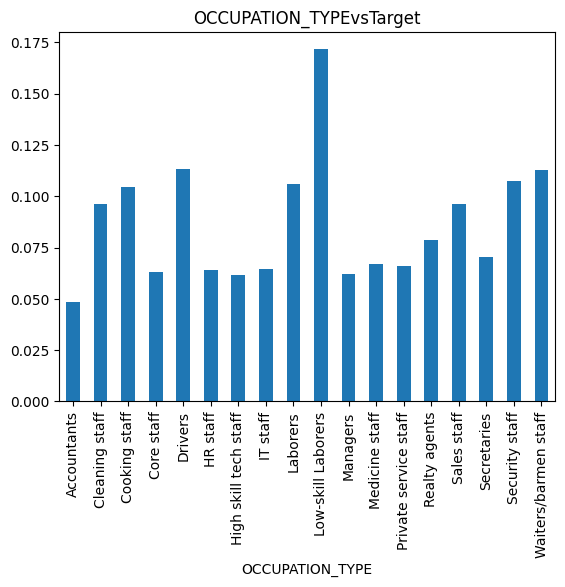

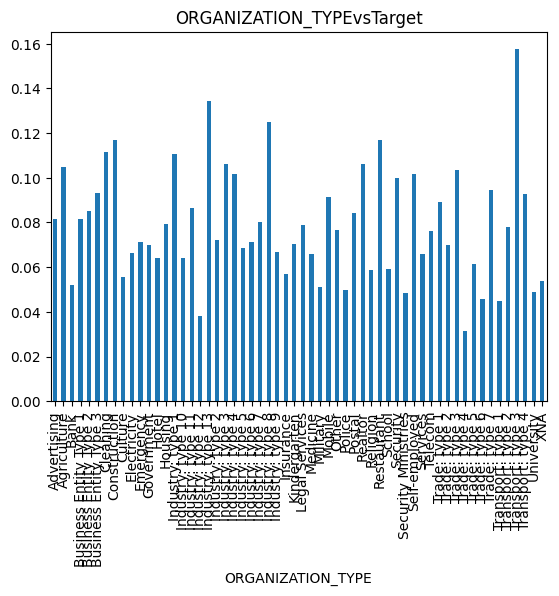

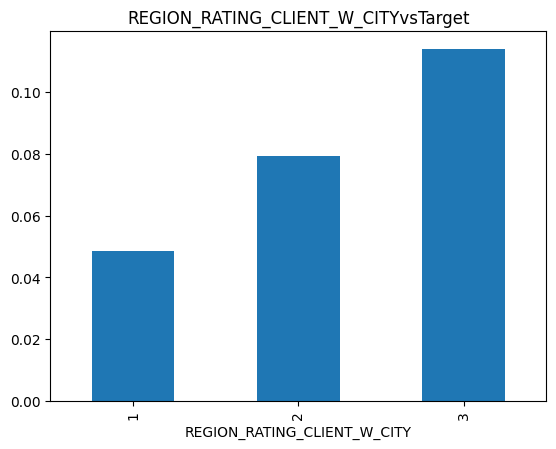

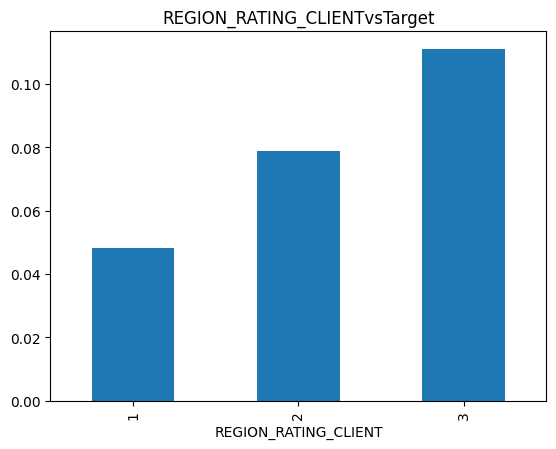

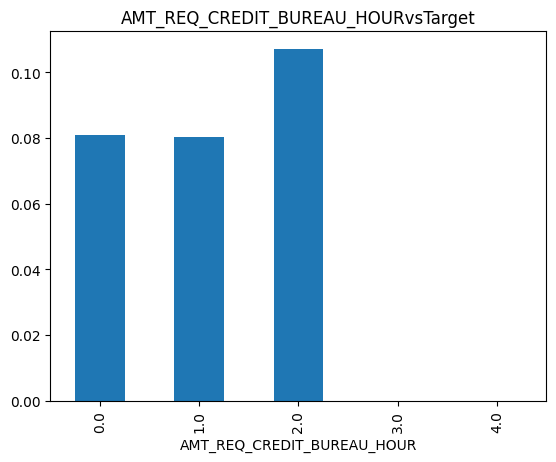

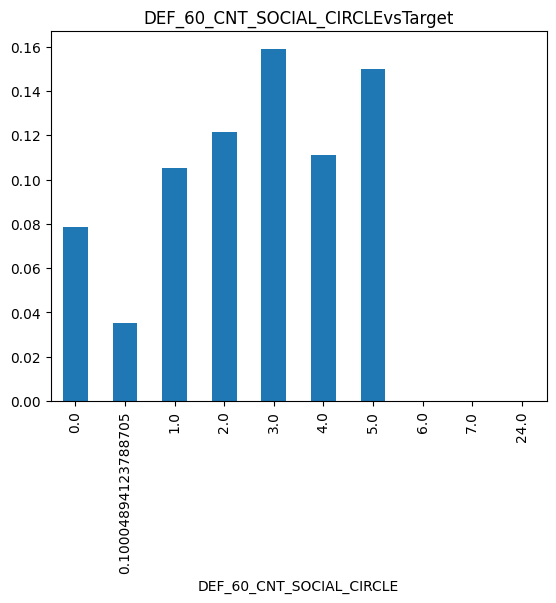

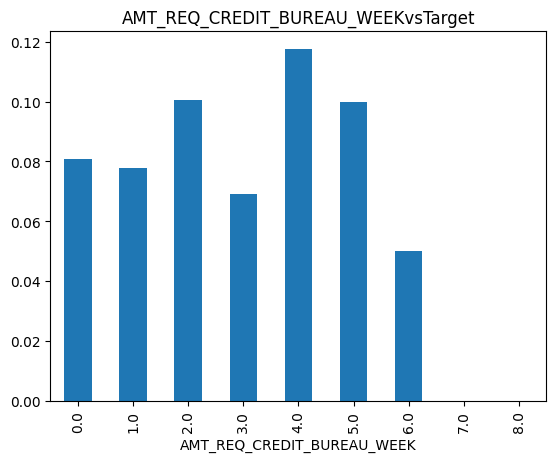

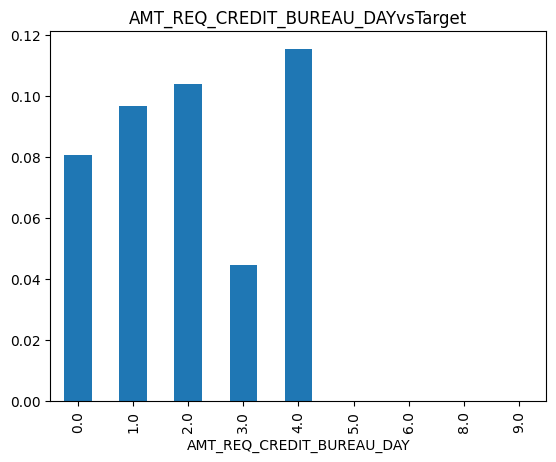

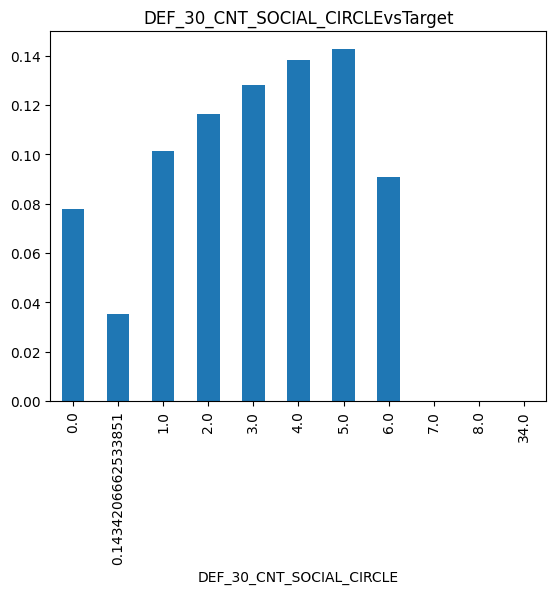

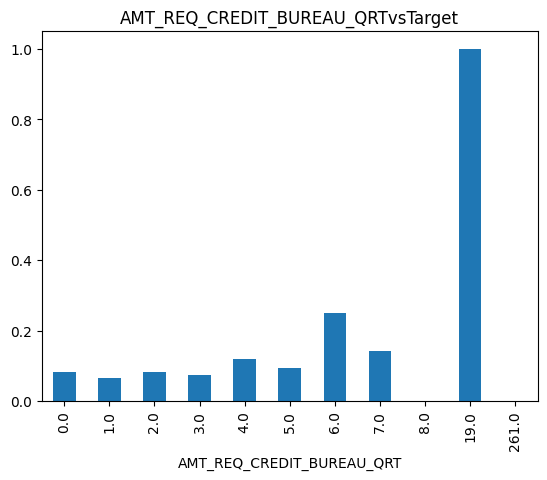

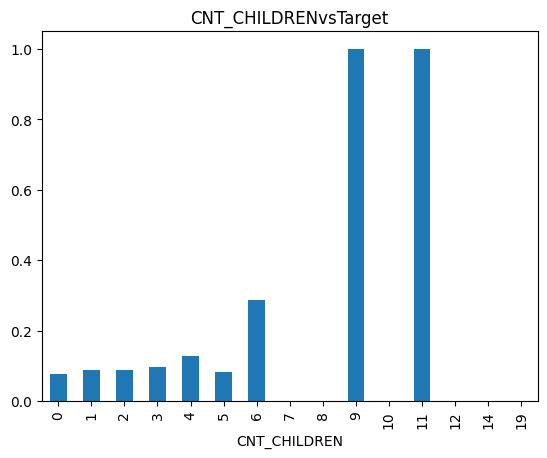

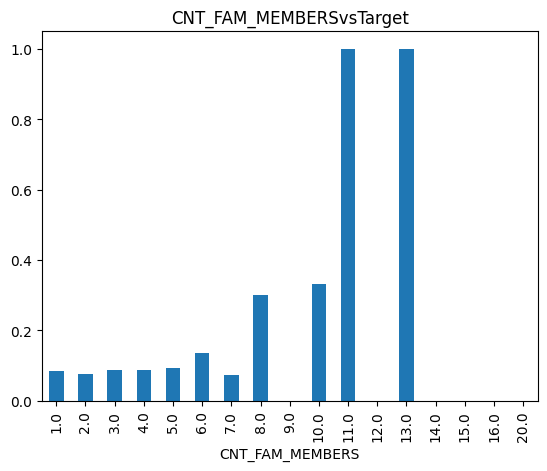

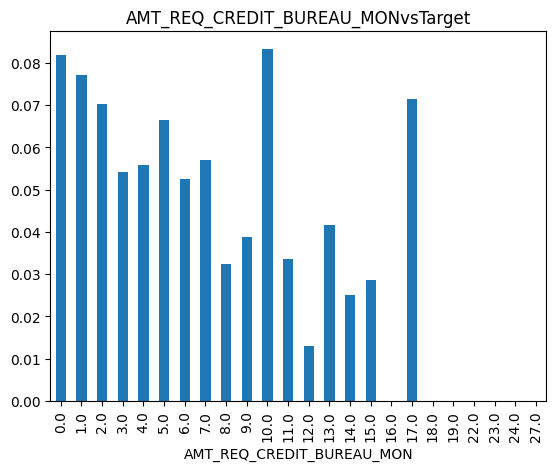

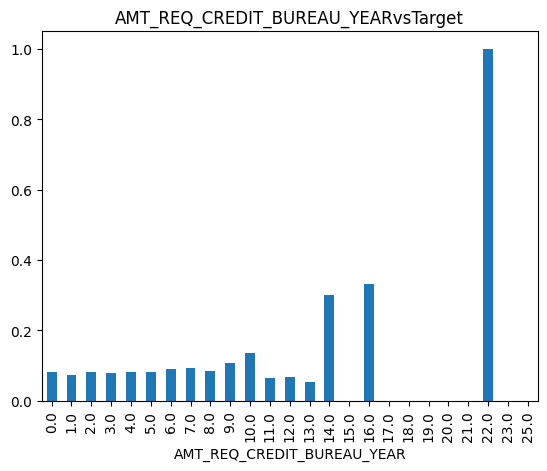

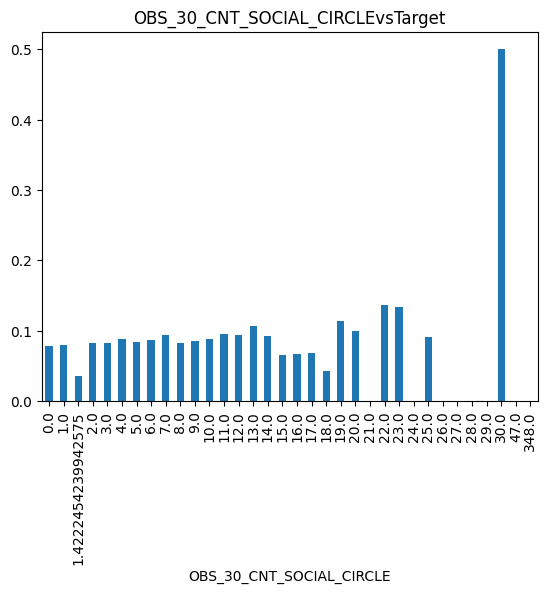

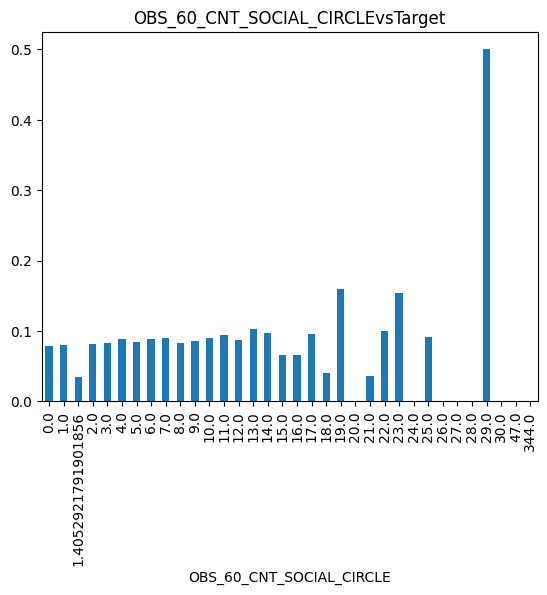

In [ ]:
for i in categorical_columns:
    (app.groupby(i)['TARGET'].mean()).plot.bar()
    plt.title(i+ 'vs' +'Target')
    plt.show()

## 4.7 Bivariate Analsyis for Numerical columns

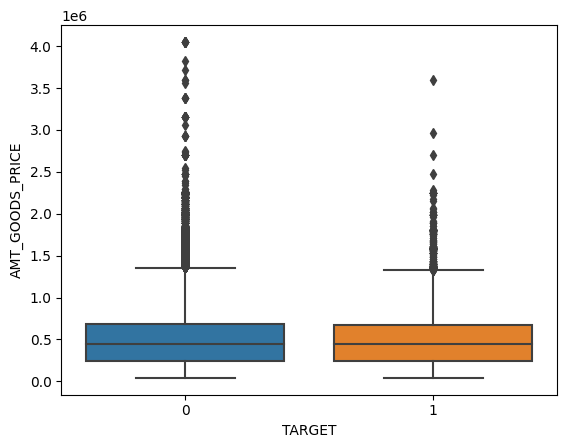

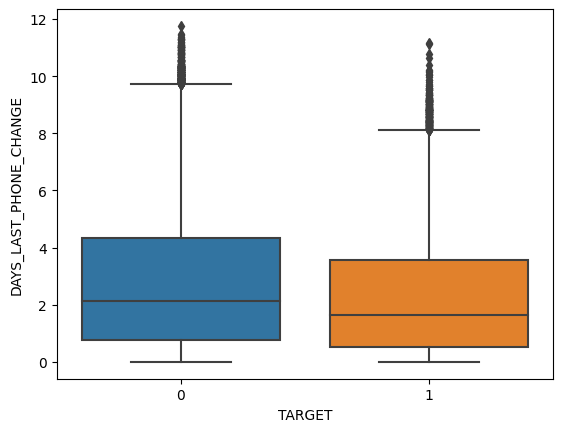

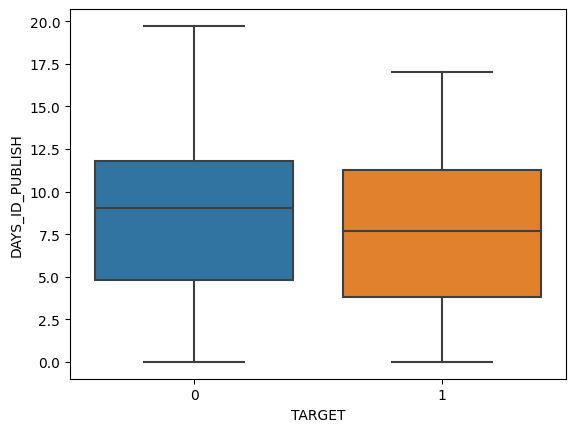

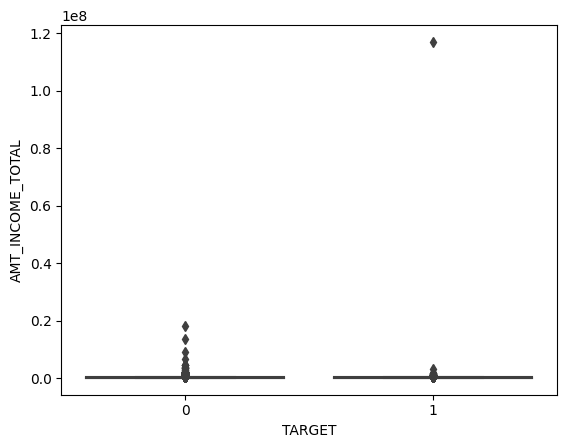

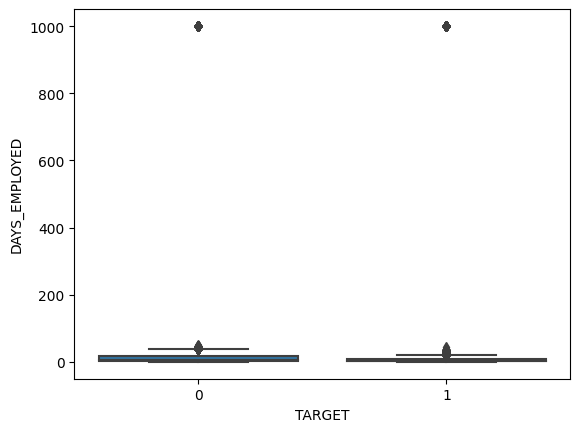

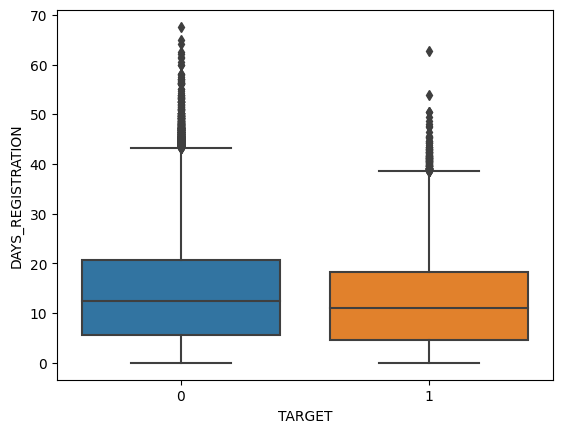

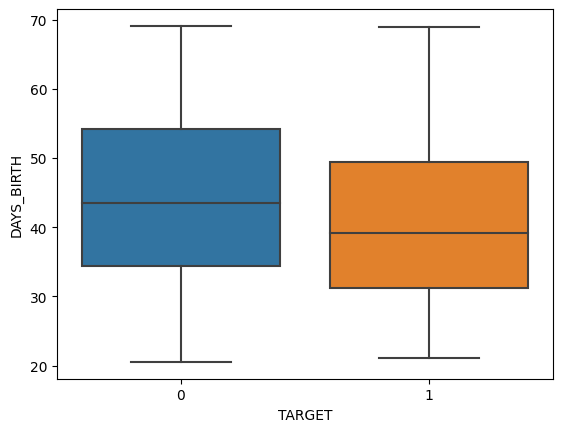

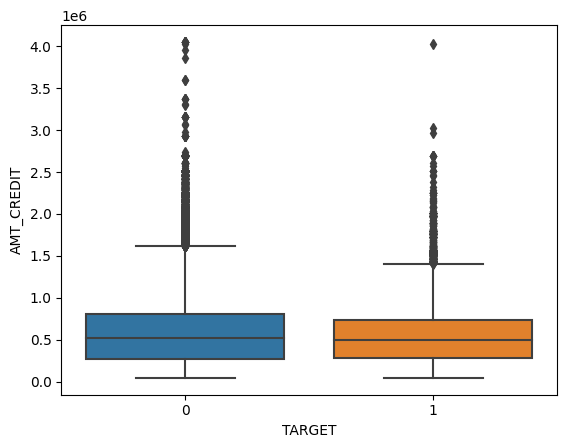

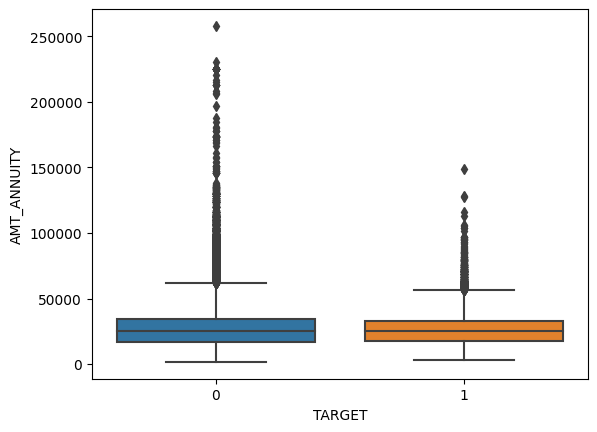

In [ ]:
# loop for bivariate analysis for numerical variables
for i in numerical_columns:
    sns.boxplot(data = app, x='TARGET',y= i)
    plt.show()

In [ ]:
#In this section, we will only highlight key outcomes from Bivariate analysis
#DAYS_LAST_PHONE_CHANGE:Defaulter customers change phone closer to the submission of application
##DAYSID_PUBLISH:Defaulter customers changes id closer to submission of application
#DAYS_REGISTRATION: Defaulter customers changes registration on a date closer to submission of application
#DAYS_BIRTH: Defaulter customers are relatively younger than non-defaulters

## 4.4 Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data

#### In this analysis, we are trying to understand how numerical columns are correlated for entrie data set, data for target =0, and data for target =1

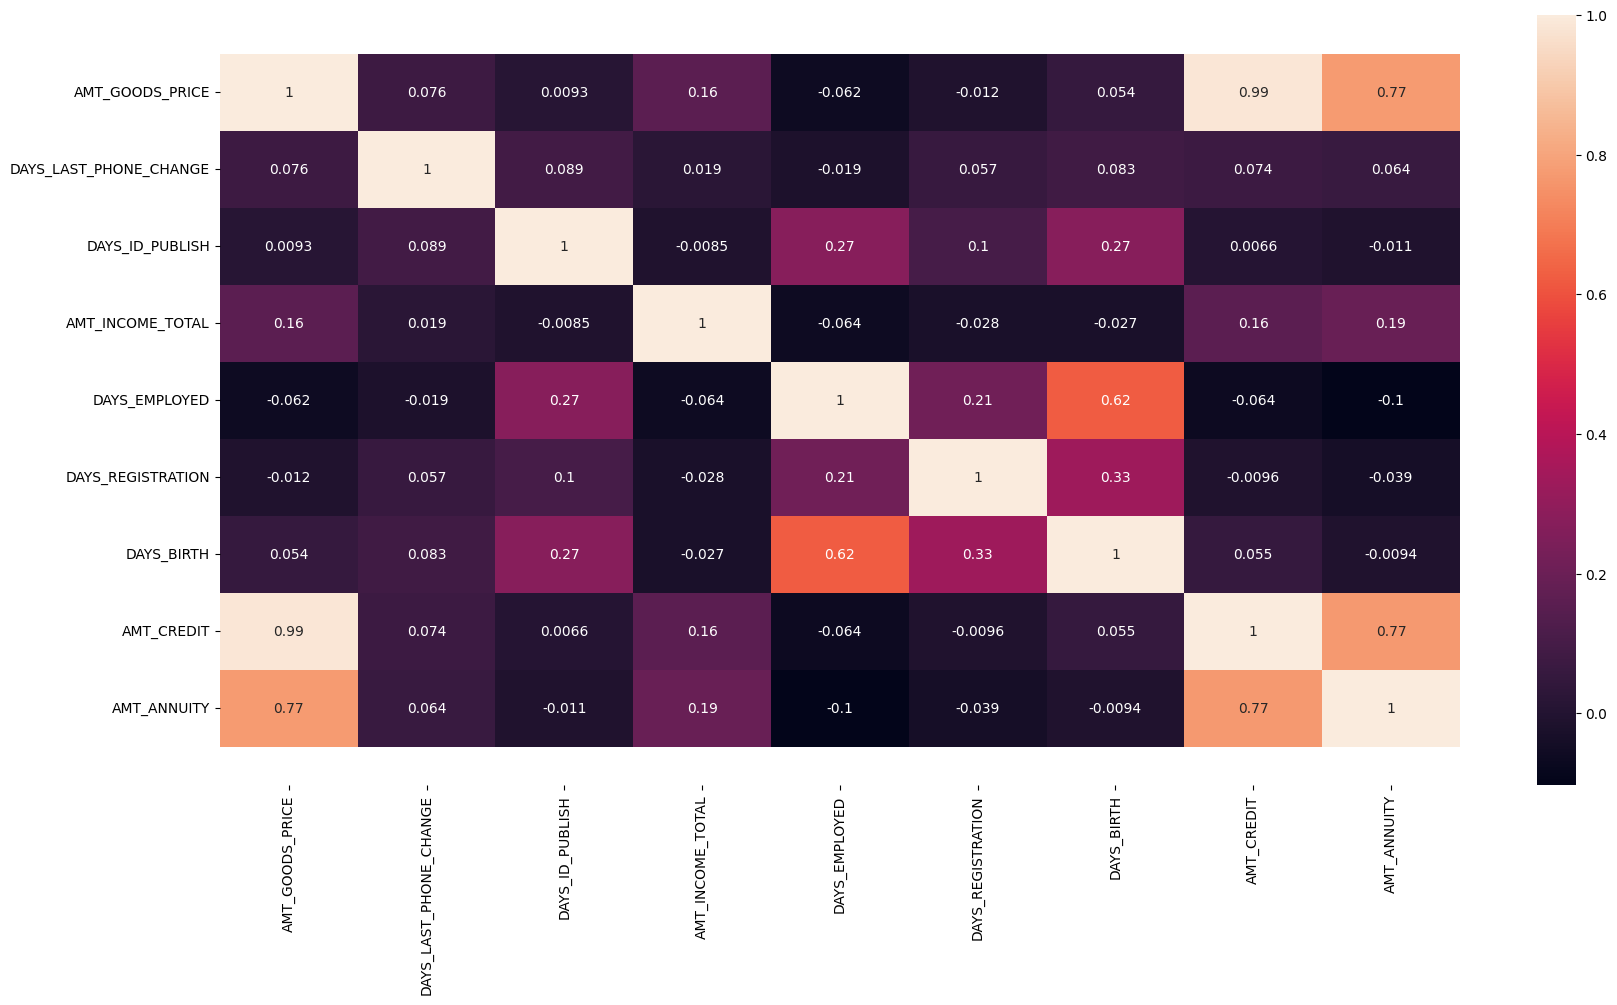

In [ ]:
# correlation analysis for the entire Target data
plt.figure(figsize=(20,10))
sns.heatmap(app[numerical_columns].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

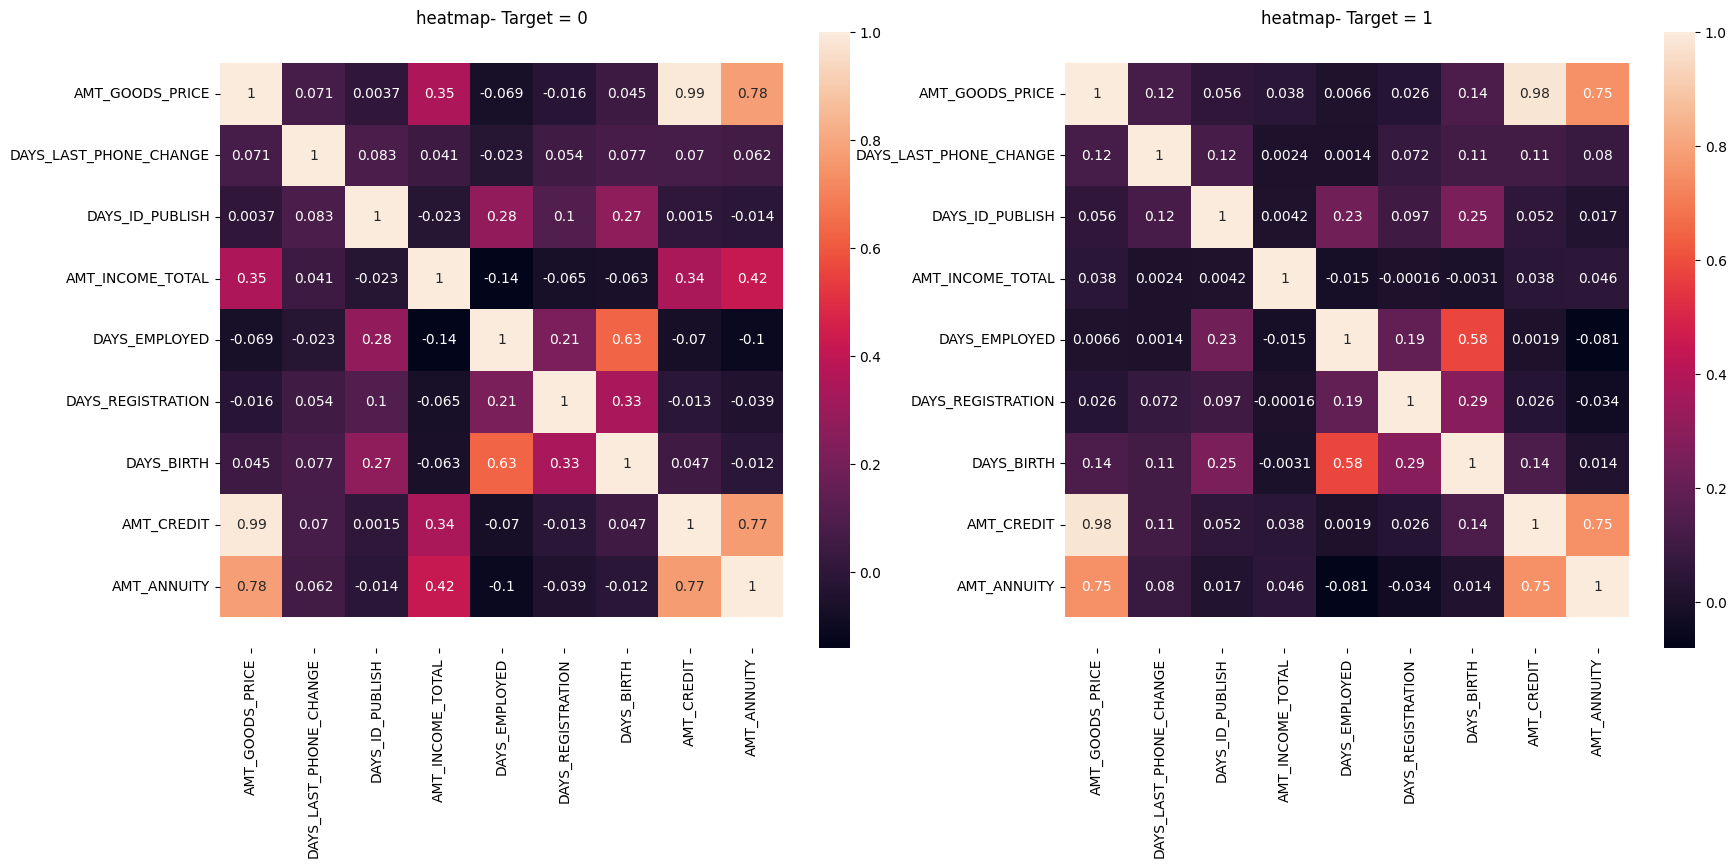

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(target_0_df[numerical_columns].corr(),annot=True)
plt.title('heatmap- Target = 0')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.subplot(1,2,2)
sns.heatmap(target_1_df[numerical_columns].corr(),annot=True,)
plt.title('heatmap- Target = 1')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

#### Through the heatmap we can see same set of columns seem to have a high correlation across all three data sets. Top correlate colums are:
- AMT_GOOD_PRICE vs AMT_CREDIT
- AMT_GOOD_PRICE vs AMT_ANNUITY
- AMT_CREDIT_AMT_ANNUITY

### 4.5 Checking if Variables with highest coeffecient are same in both file

#### This analysis is conducted to understand if top 10 high correlation variables are common across for both data - target =0 and target =1

In [ ]:
# Correlation for numberical columns for Target = 0
corr = target_0_df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

,VAR1,VAR2,Correlation,Correlation_abs
457,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00,1.00
160,AMT_GOODS_PRICE,AMT_CREDIT,0.99,0.99
377,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95,0.95
314,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88,0.88
484,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86,0.86
161,AMT_GOODS_PRICE,AMT_ANNUITY,0.78,0.78
134,AMT_ANNUITY,AMT_CREDIT,0.77,0.77
242,DAYS_EMPLOYED,DAYS_BIRTH,0.63,0.63
371,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.54,0.54
345,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.54,0.54


In [ ]:
# Correlation for numberical columns for Target = 1
corr = target_1_df.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

,VAR1,VAR2,Correlation,Correlation_abs
457,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00,1.00
160,AMT_GOODS_PRICE,AMT_CREDIT,0.98,0.98
377,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96,0.96
314,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89,0.89
484,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87,0.87
134,AMT_ANNUITY,AMT_CREDIT,0.75,0.75
161,AMT_GOODS_PRICE,AMT_ANNUITY,0.75,0.75
242,DAYS_EMPLOYED,DAYS_BIRTH,0.58,0.58
371,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.45,0.45
345,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.44,0.44


#### 8 out of top 10 pair of high correlated variables are same for both 0 and 1

# Reading the Previous Application

In [ ]:
#Reading the data in pandas
import pandas as pd
path = "/content/drive/MyDrive/bank loan/previous_application.csv"
pre = pd.read_csv(path)

# Analyzing Previous Application Data

In [ ]:
pre.shape

(1670214, 37)

In [ ]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Data Quality Check And Missing Values

In [ ]:
# checking column-wise null percentages
cols1 = pd.DataFrame(pre.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols1)

                             precentage_missing_value
SK_ID_PREV                                       0.00
NAME_YIELD_GROUP                                 0.00
NAME_SELLER_INDUSTRY                             0.00
SELLERPLACE_AREA                                 0.00
CHANNEL_TYPE                                     0.00
NAME_PRODUCT_TYPE                                0.00
NAME_PORTFOLIO                                   0.00
NAME_GOODS_CATEGORY                              0.00
NAME_CLIENT_TYPE                                 0.00
CODE_REJECT_REASON                               0.00
DAYS_DECISION                                    0.00
NAME_CONTRACT_STATUS                             0.00
NAME_CASH_LOAN_PURPOSE                           0.00
NAME_PAYMENT_TYPE                                0.00
AMT_APPLICATION                                  0.00
NFLAG_LAST_APPL_IN_DAY                           0.00
FLAG_LAST_APPL_PER_CONTRACT                      0.00
HOUR_APPR_PROCESS_START     

## Dropping the columns with high percentage of missing values(>40%)

In [ ]:
#Droping column having more than 40 % null values
pre = pre.drop(pre.columns[ pre.apply(lambda col: (col.isnull().sum()/len(pre)*100) > 40)], axis=1)
print (pre.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


In [ ]:
print(app.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'AMT_CATEGORY'],
      dtype='object')


In [ ]:
print(pre.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


In [ ]:
neg_days = ['DAYS_DECISION']

for col in neg_days:
    pre[col] = abs(pre[col])

In [ ]:
columns_drop1 = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']
pre = pre.drop(columns=columns_drop1)

In [ ]:
amt_annuity_median = pre['AMT_ANNUITY'].median()
pre['AMT_ANNUITY'].fillna(amt_annuity_median, inplace=True)

# Impute null values in 'AMT_GOODS_PRICE' and 'AMT_CREDIT' with the mode
amt_goods_price_mode = pre['AMT_GOODS_PRICE'].mode()[0]
amt_credit_mode = pre['AMT_CREDIT'].mode()[0]
pre['AMT_GOODS_PRICE'].fillna(amt_goods_price_mode, inplace=True)
pre['AMT_CREDIT'].fillna(amt_credit_mode, inplace=True)

# Impute null values in 'CNT_PAYMENT' with 0
pre['CNT_PAYMENT'].fillna(0, inplace=True)

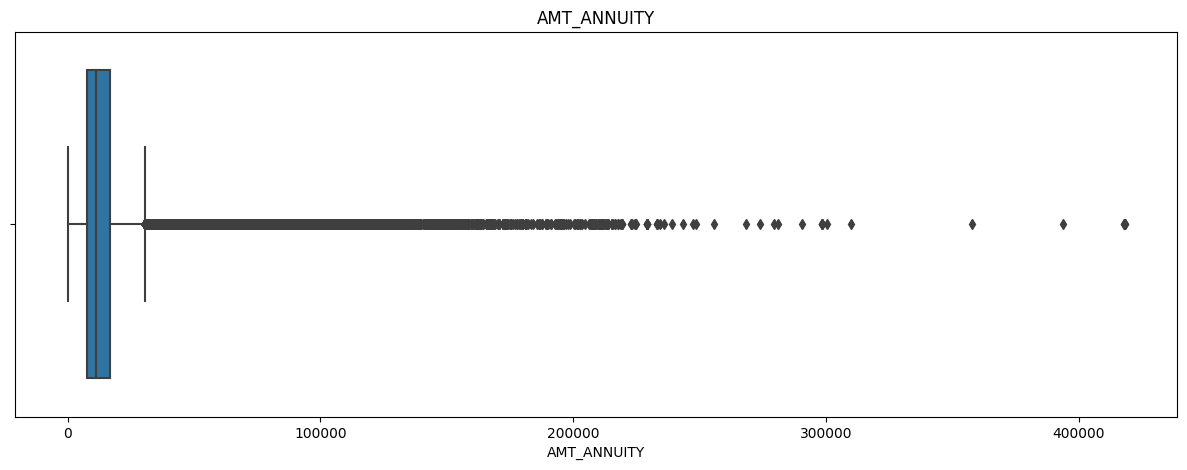

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = pre['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

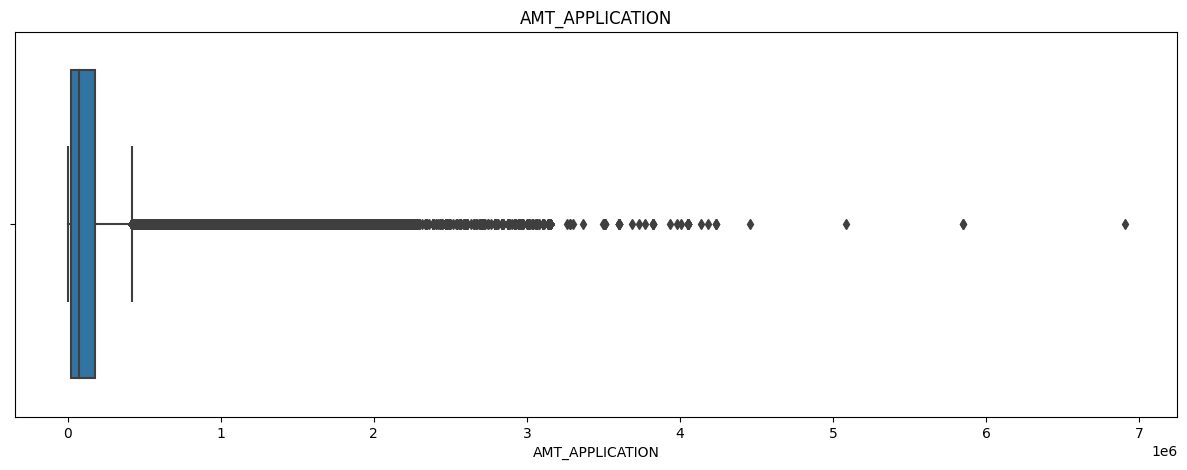

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = pre['AMT_APPLICATION'])
plt.title('AMT_APPLICATION')
plt.show()

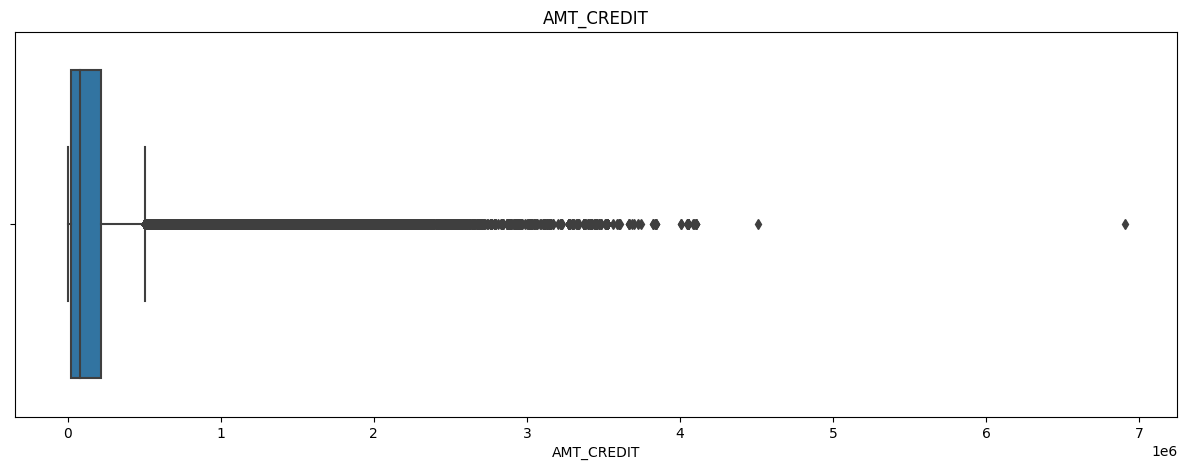

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = pre['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

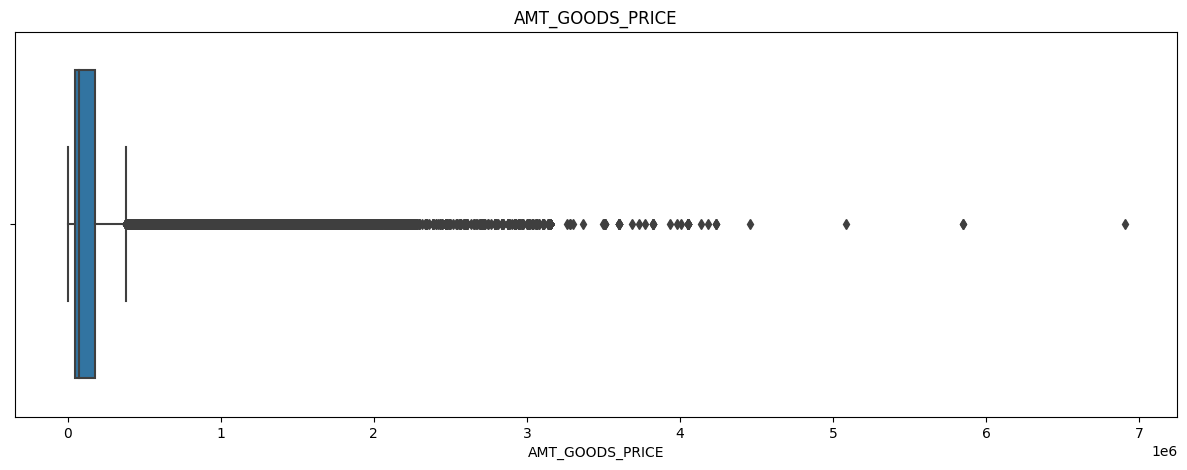

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = pre['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

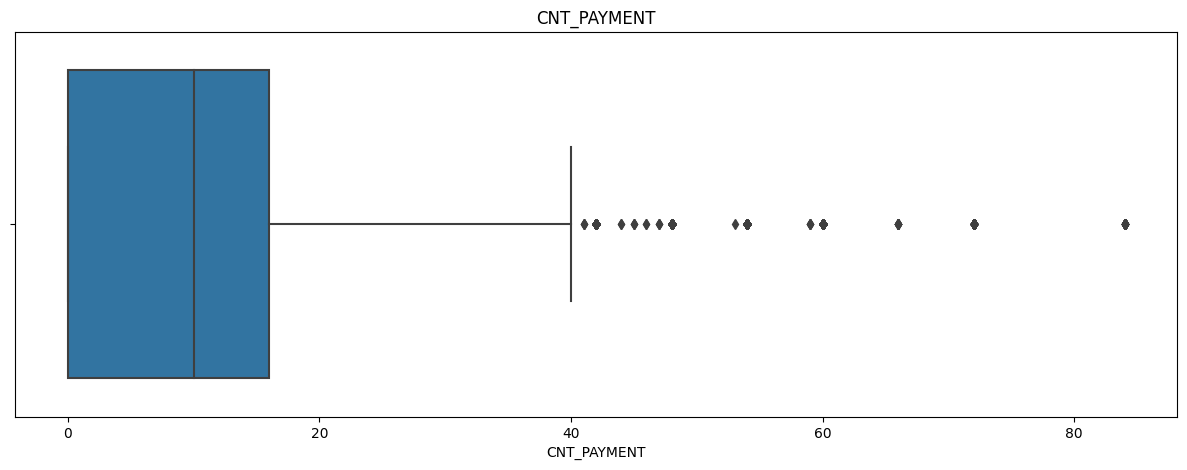

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = pre['CNT_PAYMENT'])
plt.title('CNT_PAYMENT')
plt.show()

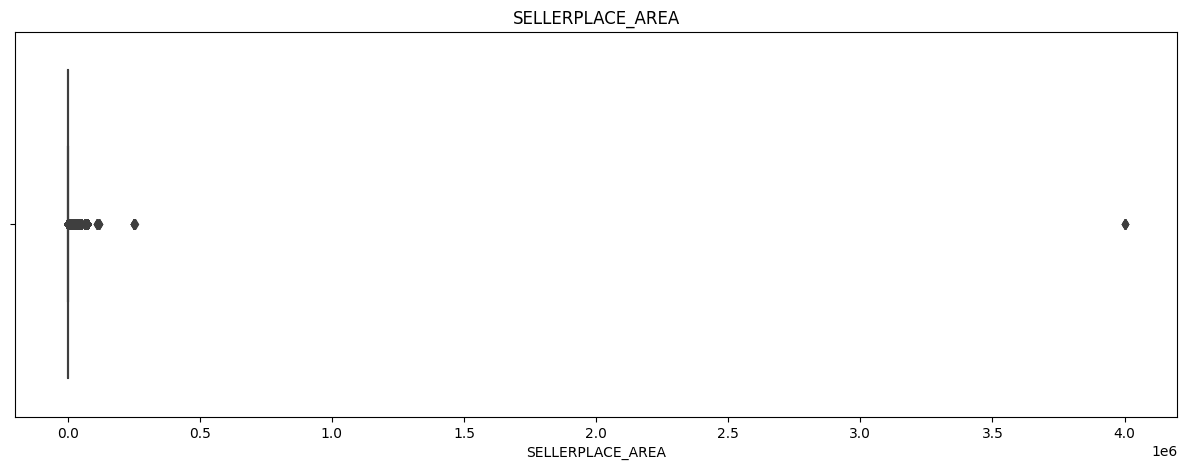

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = pre['SELLERPLACE_AREA'])
plt.title('SELLERPLACE_AREA')
plt.show()

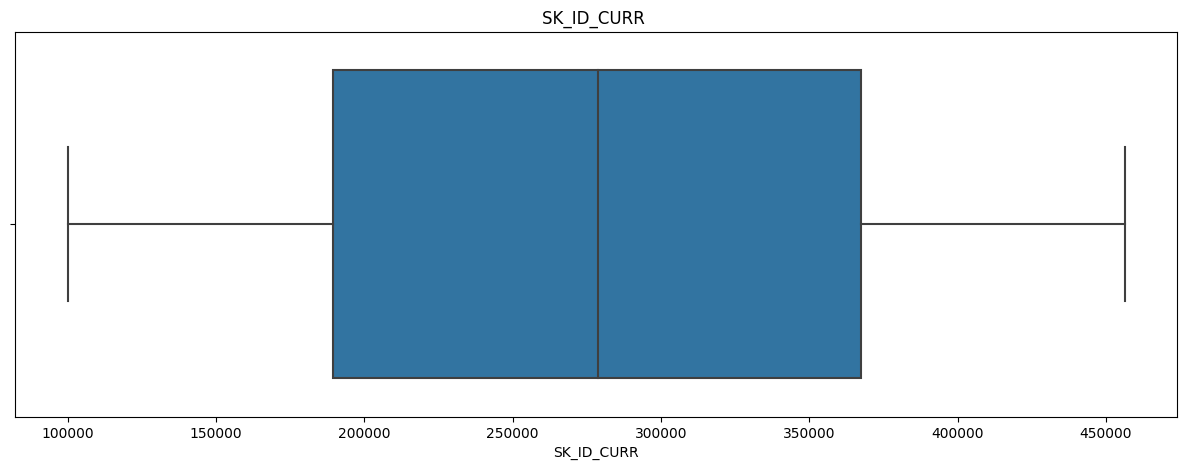

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = pre['SK_ID_CURR'])
plt.title('SK_ID_CURR ')
plt.show()

In [ ]:
if 'SK_ID_CURR' in app.columns and 'SK_ID_CURR' in pre.columns:
    combined_df = app.merge(pre, on='SK_ID_CURR', how='inner')
    print(combined_df)
else:
    print("Error: 'SK_ID_CURR' column is missing in one or both DataFrames.")


         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1413696      456255       0           Cash loans           F            N   
1413697      456255       0           Cash loans           F            N   
1413698      456255       0           Cash loans           F            N   
1413699      456255       0           Cash loans           F            N   
1413700      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0 

### Getting the different Types of contract statuses:

In [ ]:
combined_df.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

###  Analysis for few categorical columns in combined dataframe where status is approved

In [ ]:
combined_categorical_columns = ['NAME_CONTRACT_TYPE_x',
                       'FLAG_OWN_CAR',
                       'FLAG_OWN_REALTY',
                       'CODE_GENDER',
                       'NAME_EDUCATION_TYPE',
                       'AMT_CATEGORY',
                       'AGE_GROUP']

##  Analysis for few Categorical Variable of combined dataframe------approved

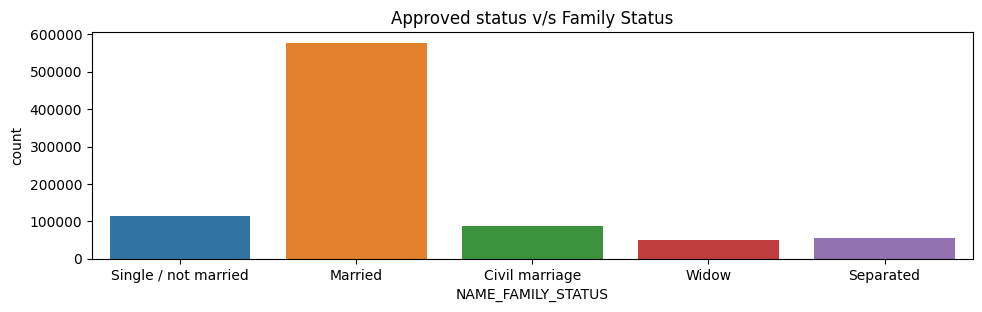

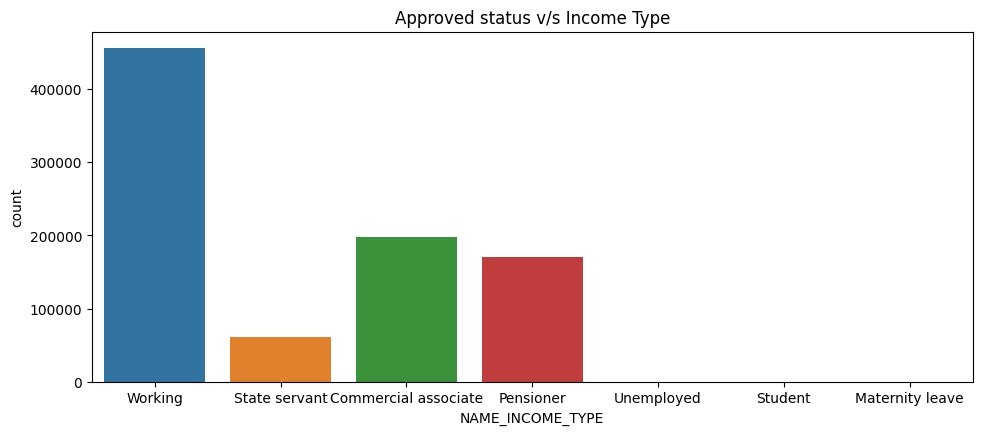

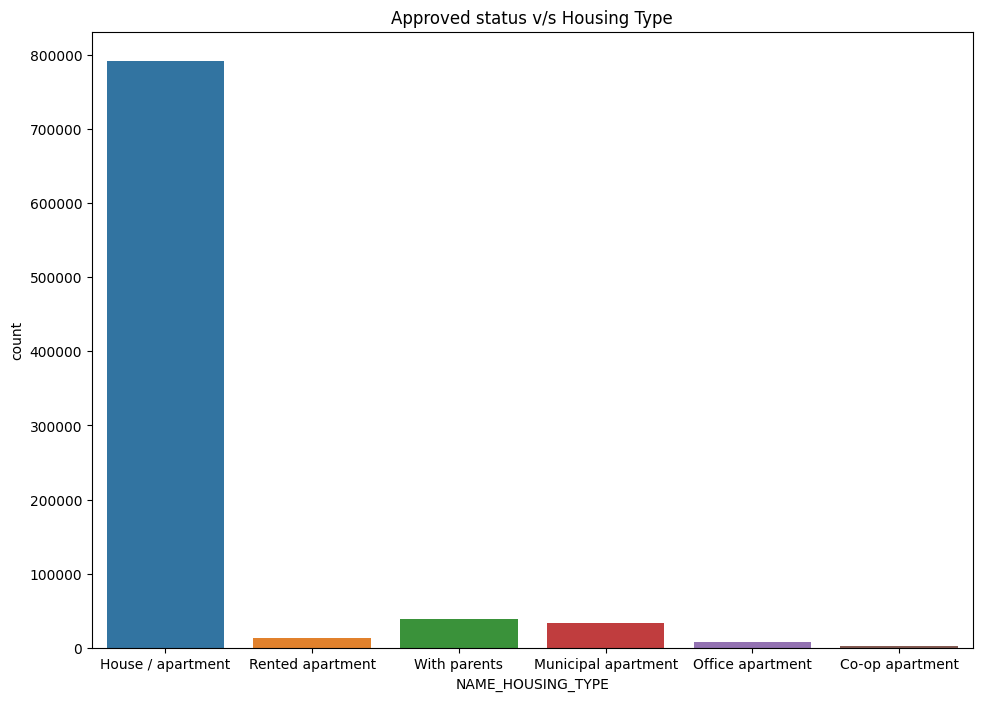

In [ ]:
# People with approved status- First Variable

# 1. Second Variable : Family Status
plt.figure(figsize=(25,10))
plt.subplot(3,2,2)
sns.countplot(x = "NAME_FAMILY_STATUS", data = combined_approved_df)
plt.title("Approved status v/s Family Status")
plt.show()

# 2. Second Variable : Income Type
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(x = "NAME_INCOME_TYPE", data = combined_approved_df)
plt.title("Approved status v/s Income Type")
plt.show()

# 3. Second Variable : Housing type
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_HOUSING_TYPE", data = combined_approved_df)
plt.title("Approved status v/s Housing Type")
plt.show()



#  analysis for Numerical Data.---------approved

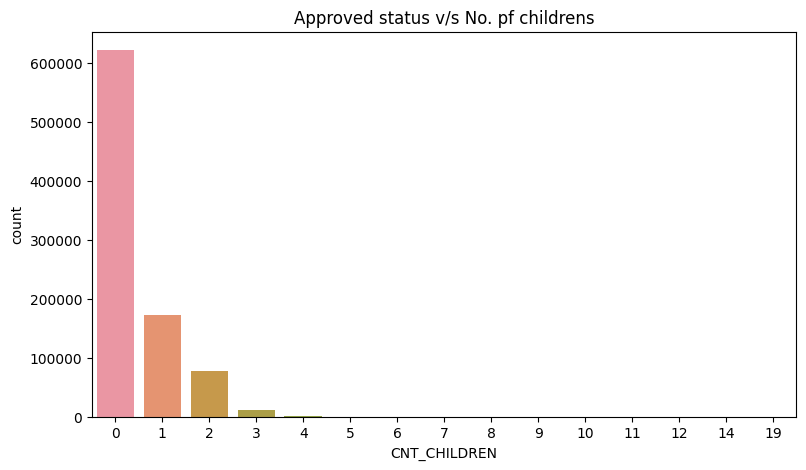

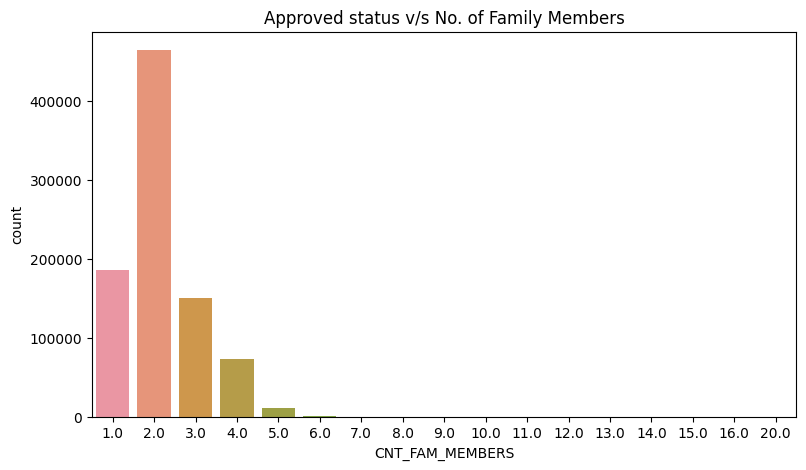

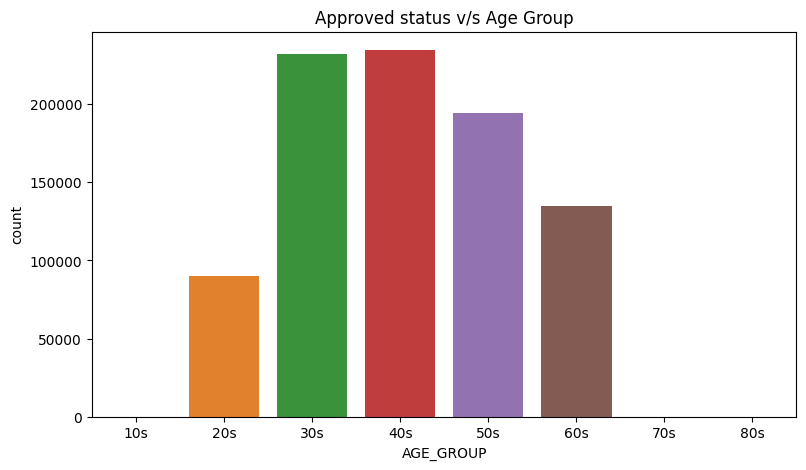

In [ ]:
# People with approved status and who are non-defaulters - First Variable

# 1. Second Variable : CNT_CHILDREN
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_CHILDREN", data = combined_approved_df)
plt.title("Approved status v/s No. pf childrens")
plt.show()

# 2. Second Variable : CNT_FAM_MEMBERS
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_FAM_MEMBERS", data = combined_approved_df)
plt.title("Approved status v/s No. of Family Members")
plt.show()

# 3. Second Variable : Age
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x="AGE_GROUP", data = combined_approved_df)
plt.title("Approved status v/s Age Group")
plt.show()


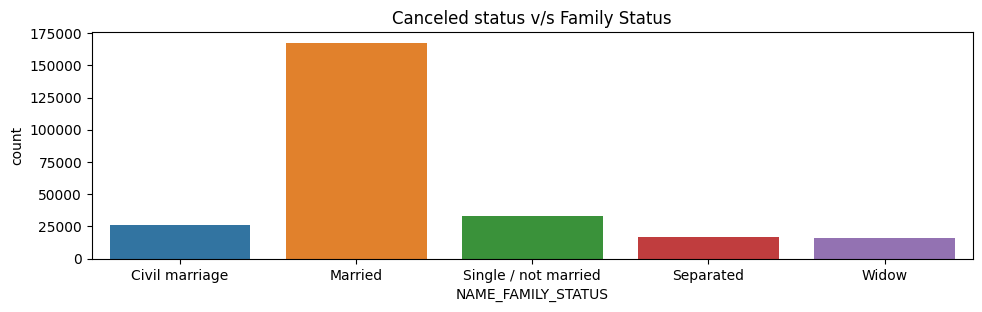

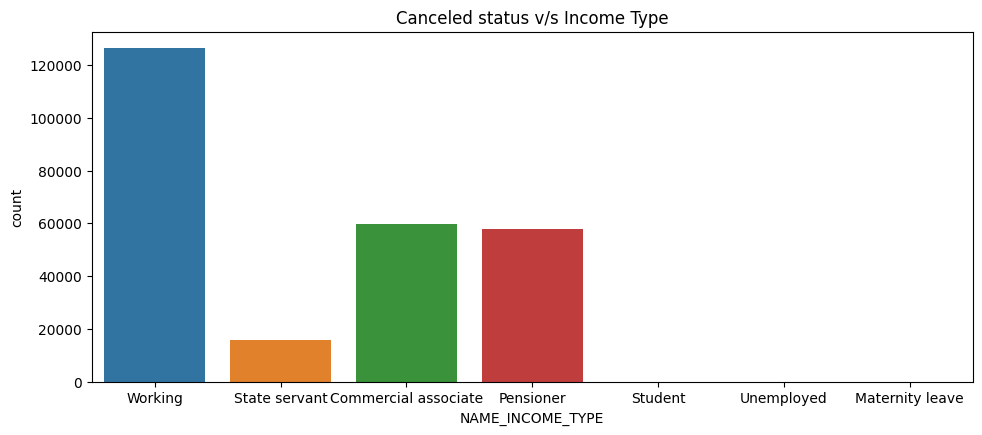

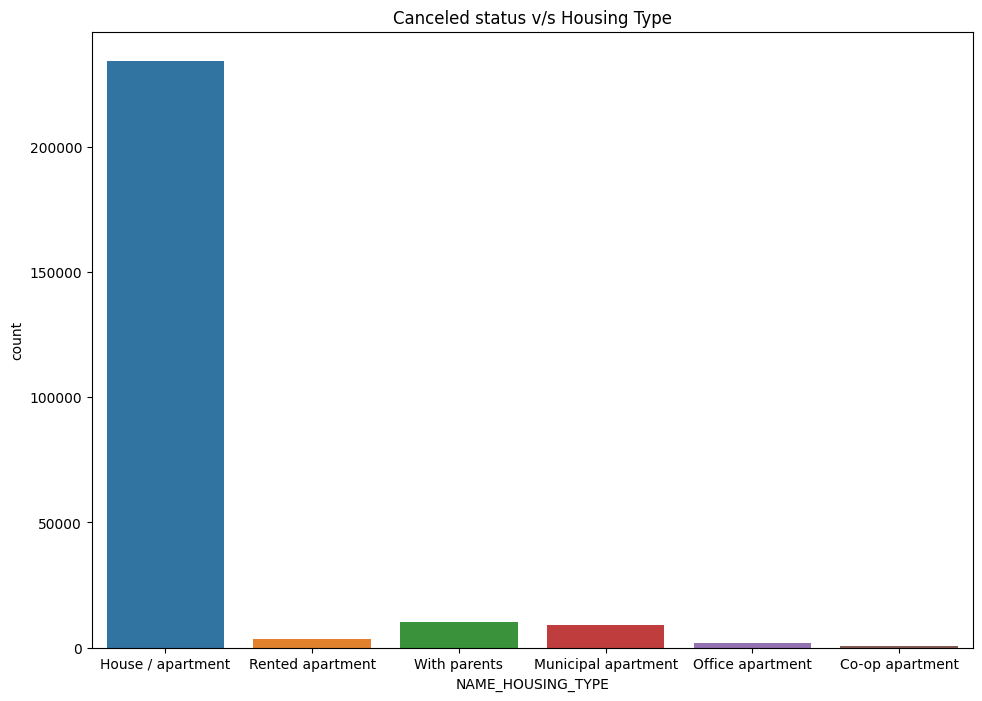

In [ ]:
# 1. Second Variable : Family Status
plt.figure(figsize=(25,10))
plt.subplot(3,2,2)
sns.countplot(x = "NAME_FAMILY_STATUS", data = combined_can_df)
plt.title("Canceled status v/s Family Status")
plt.show()

# 2. Second Variable : Income Type
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(x = "NAME_INCOME_TYPE", data = combined_can_df)
plt.title("Canceled status v/s Income Type")
plt.show()

# 3. Second Variable : Housing type
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_HOUSING_TYPE", data = combined_can_df)
plt.title("Canceled status v/s Housing Type")
plt.show()


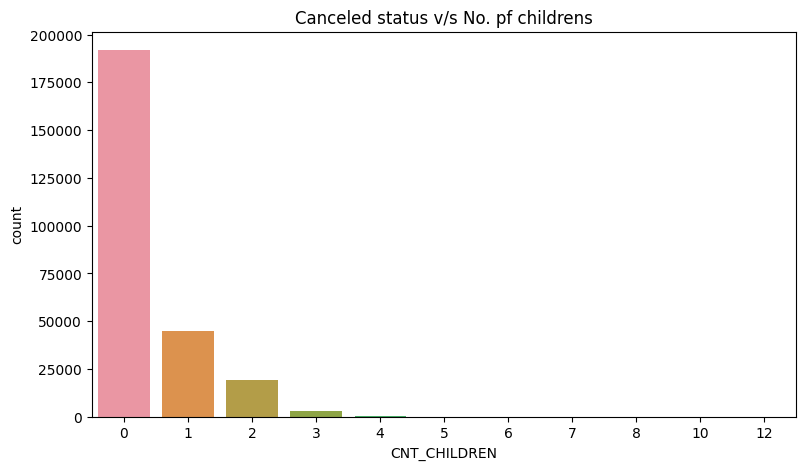

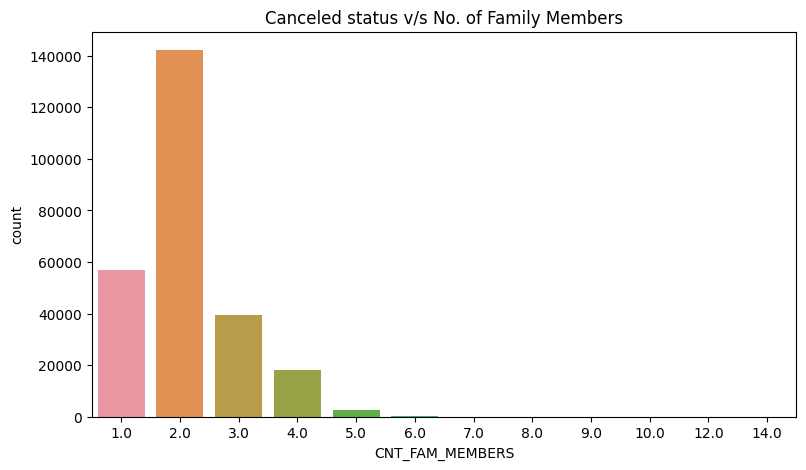

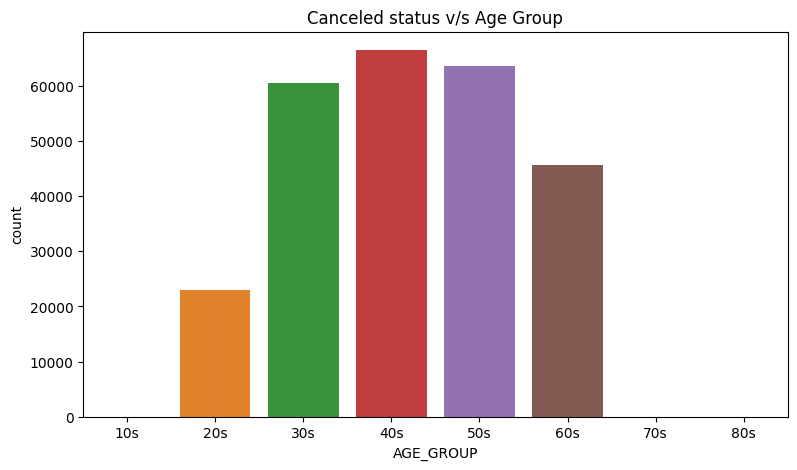

In [ ]:
# 1. Second Variable : CNT_CHILDREN
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_CHILDREN", data = combined_can_df)
plt.title("Canceled status v/s No. pf childrens")
plt.show()

# 2. Second Variable : CNT_FAM_MEMBERS
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_FAM_MEMBERS", data = combined_can_df)
plt.title("Canceled status v/s No. of Family Members")
plt.show()

# 3. Second Variable : Age
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x="AGE_GROUP", data = combined_can_df)
plt.title("Canceled status v/s Age Group")
plt.show()


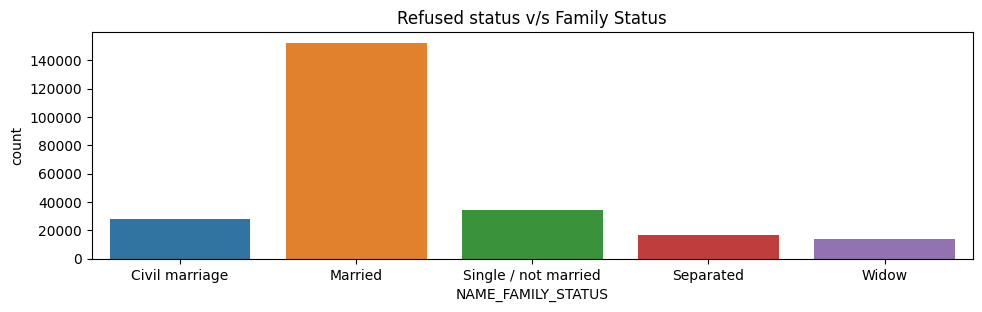

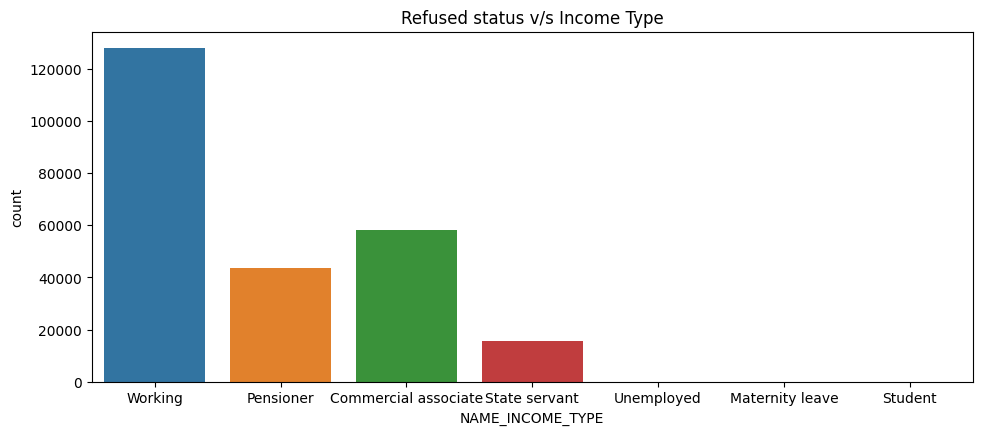

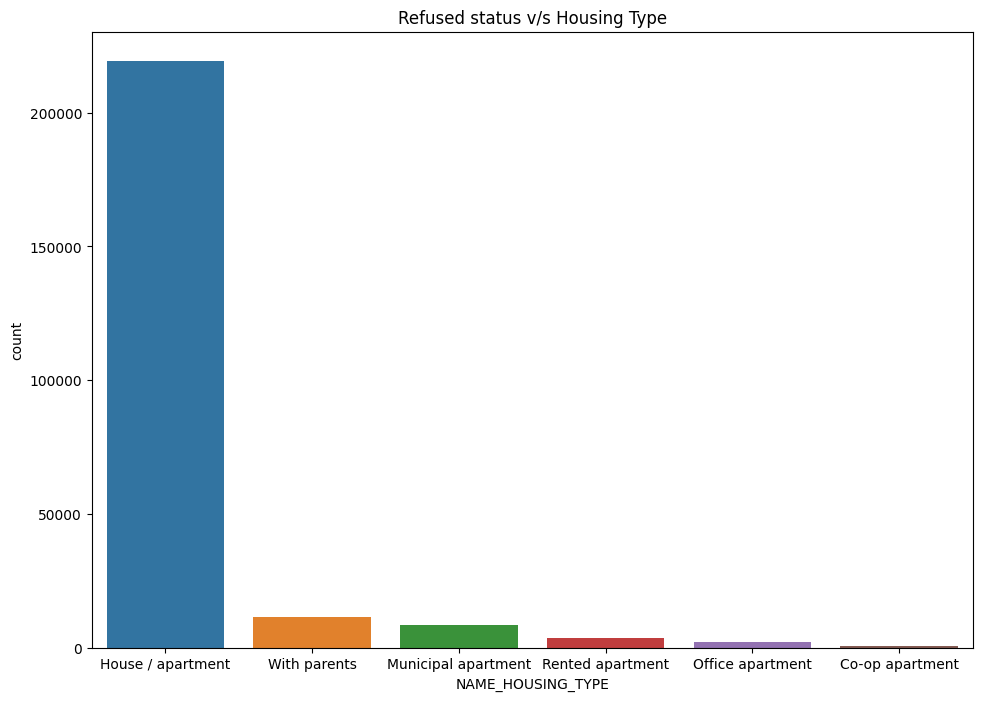

In [ ]:
 #1. Second Variable : Family Status
plt.figure(figsize=(25,10))
plt.subplot(3,2,2)
sns.countplot(x = "NAME_FAMILY_STATUS", data = combined_ref_df)
plt.title("Refused status v/s Family Status")
plt.show()

# 2. Second Variable : Income Type
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(x = "NAME_INCOME_TYPE", data = combined_ref_df)
plt.title("Refused status v/s Income Type")
plt.show()

# 3. Second Variable : Housing type
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_HOUSING_TYPE", data = combined_ref_df)
plt.title("Refused status v/s Housing Type")
plt.show()

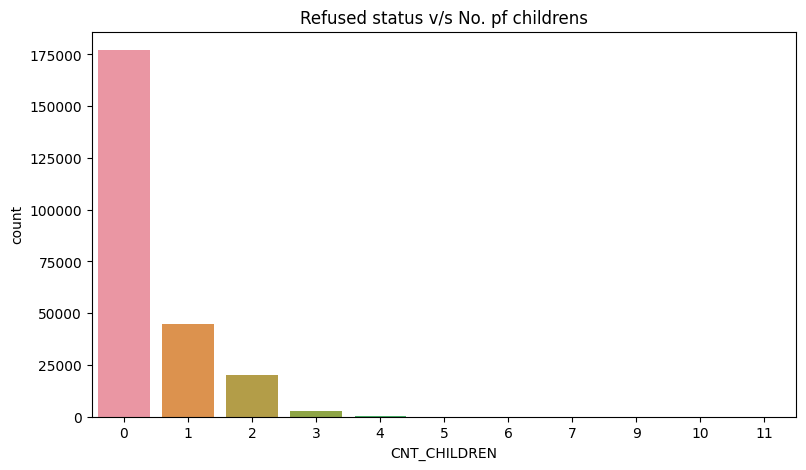

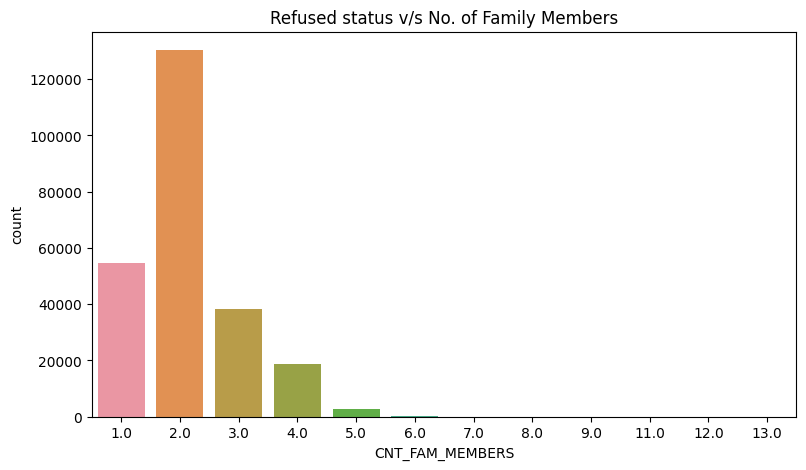

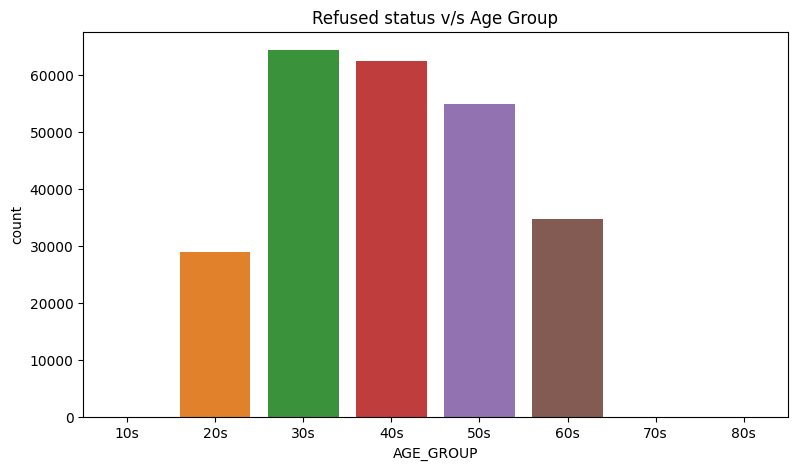

In [ ]:
# 1. Second Variable : CNT_CHILDREN
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_CHILDREN", data = combined_ref_df)
plt.title("Refused status v/s No. pf childrens")
plt.show()

# 2. Second Variable : CNT_FAM_MEMBERS
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_FAM_MEMBERS", data = combined_ref_df)
plt.title("Refused status v/s No. of Family Members")
plt.show()

# 3. Second Variable : Age
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x="AGE_GROUP", data = combined_ref_df)
plt.title("Refused status v/s Age Group")
plt.show()

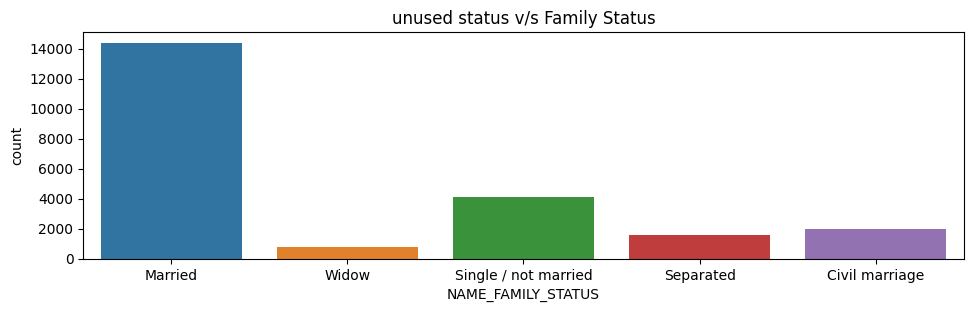

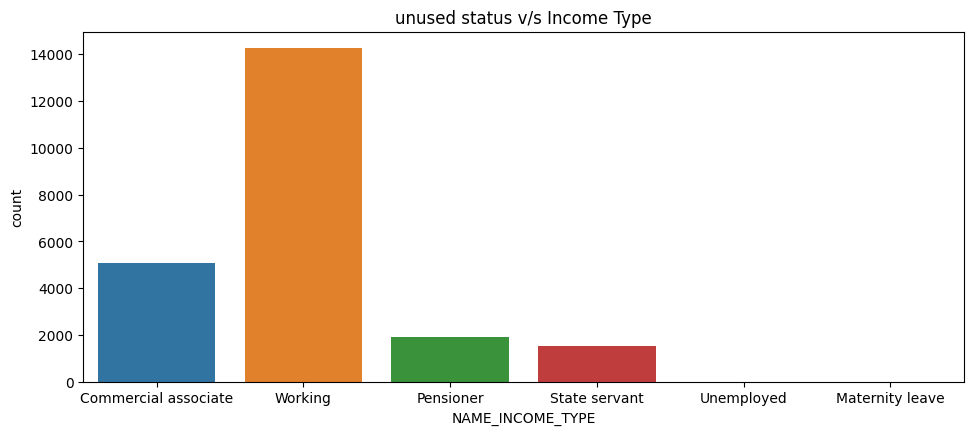

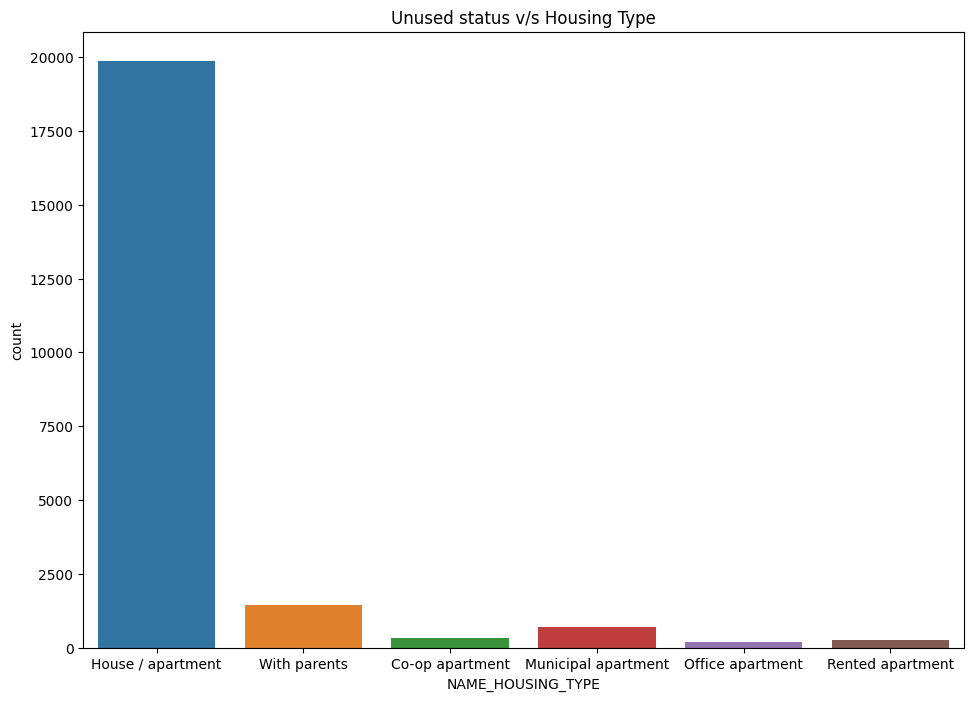

In [ ]:
# 1. Second Variable : Family Status
plt.figure(figsize=(25,10))
plt.subplot(3,2,2)
sns.countplot(x = "NAME_FAMILY_STATUS", data = combined_un_df)
plt.title("unused status v/s Family Status")
plt.show()

# 2. Second Variable : Income Type
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(x = "NAME_INCOME_TYPE", data = combined_un_df)
plt.title("unused status v/s Income Type")
plt.show()

# 3. Second Variable : Housing type
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_HOUSING_TYPE", data = combined_un_df)
plt.title("Unused status v/s Housing Type")
plt.show()

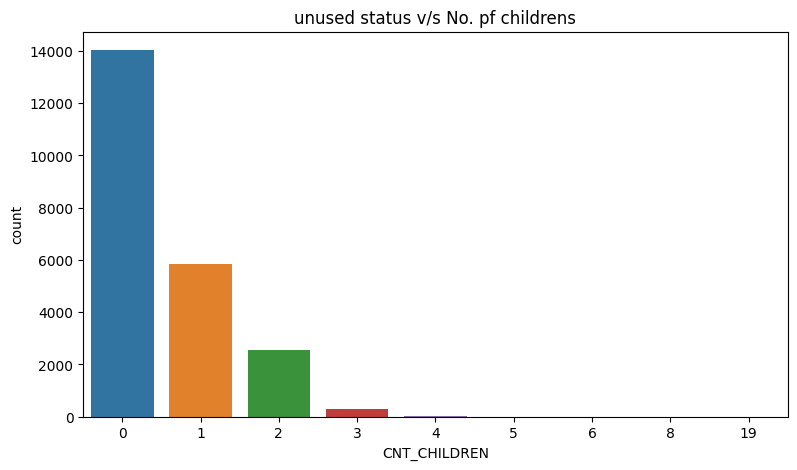

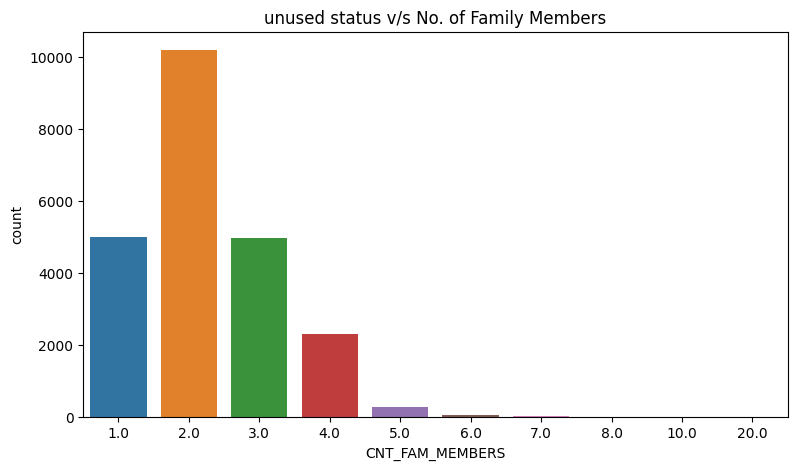

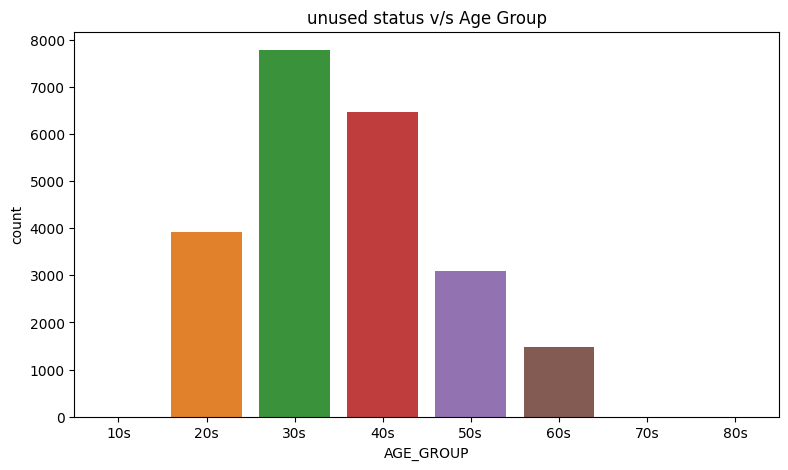

In [ ]:
# 1. Second Variable : CNT_CHILDREN
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_CHILDREN", data = combined_un_df)
plt.title("unused status v/s No. pf childrens")
plt.show()

# 2. Second Variable : CNT_FAM_MEMBERS
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_FAM_MEMBERS", data = combined_un_df)
plt.title("unused status v/s No. of Family Members")
plt.show()

# 3. Second Variable : Age
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x="AGE_GROUP", data = combined_un_df)
plt.title("unused status v/s Age Group")
plt.show()

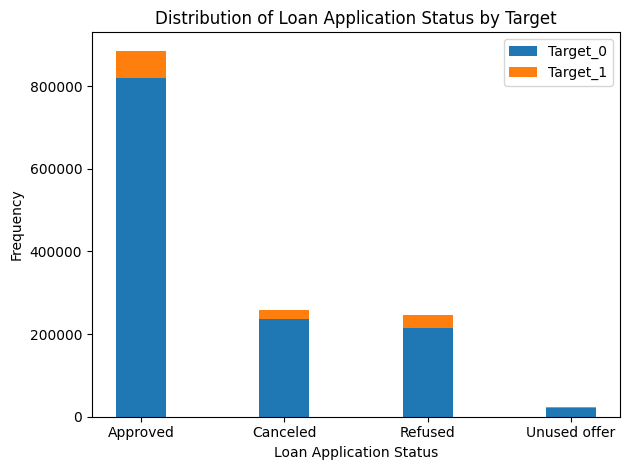

In [ ]:
status_target_counts = combined_df.groupby(['NAME_CONTRACT_STATUS', 'TARGET']).size().unstack()

# Create a stacked bar plot
labels = status_target_counts.index
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x, status_target_counts[0], width, label='Target_0')
ax.bar(x, status_target_counts[1], width, bottom=status_target_counts[0], label='Target_1')

ax.set_xlabel('Loan Application Status')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Loan Application Status by Target')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()





